<a href="https://colab.research.google.com/github/samd22/Capstone-Project--Santander-Bank/blob/main/Capstone_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Hello Google Drive!

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


In [ ]:
original_loan_data= pd.read_excel("/gdrive/MyDrive/Capstone Project/foia-7afy2010-present-asof-210630.xlsx")
original_loan_data= pd.DataFrame(original_loan_data)
original_loan_data

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported
0,20210630,7A,"CRESA PARTNERS - DENVER, INC.",7979 E TUFTS AVE PKWY STE 810,DENVER,CO,80237,"Zions Bank, A Division of",1 S Main St,SALT LAKE CITY,UT,84133,250000,125000,2009-10-01,2010,2009-10-01,SBA EXPRES,FA$TRK (Small Loan Express),5.26,84,531210.0,Offices of Real Estate Agents and Brokers,NaN,NaN,DENVER,CO,COLORADO DISTRICT OFFICE,1.0,CORPORATION,PIF,2016-10-31,NaT,0,1,35
1,20210630,7A,The Hilltop Tavern,4757 Folsom Blvd,Sacramento,CA,95819,Plumas Bank,336 W Main St,QUINCY,CA,95971,233500,210150,2009-10-01,2010,2009-10-01,PLP,Guaranty,6.00,120,722410.0,Drinking Places (Alcoholic Beverages),NaN,NaN,SACRAMENTO,CA,SACRAMENTO DISTRICT OFFICE,6.0,CORPORATION,PIF,2019-03-31,NaT,0,0,6
2,20210630,7A,River City Car Wash LLC,649 Harbor Blvd,West Sacramento,CA,95691,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,SD,57104,683900,615510,2009-10-01,2010,2009-11-01,PLP,Guaranty,5.25,210,811192.0,Car Washes,NaN,NaN,YOLO,CA,SACRAMENTO DISTRICT OFFICE,3.0,CORPORATION,CHGOFF,NaT,2015-08-24,320098,0,27
3,20210630,7A,Alphagraphics,71 Newtown Road.,Danbury,CT,6810,Union Savings Bank,226 Main St,DANBURY,CT,06810,100000,50000,2009-10-01,2010,2009-10-01,SBA EXPRES,FA$TRK (Small Loan Express),5.25,84,323110.0,Commercial Lithographic Printing,03512,"ALPHAGRAPHICS, PRINTSHOPS OF T",FAIRFIELD,CT,CONNECTICUT DISTRICT OFFICE,5.0,CORPORATION,EXEMPT,NaT,NaT,0,1,5
4,20210630,7A,ON SITE AUTOMOTIVE APPEARANCE,603 WOODBRIDGE COURT,MIDDLEBURY,IN,46540,"VelocitySBA, LLC",9385 Haven Ave.,Rancho Cucamonga,CA,91730,12500,11250,2009-10-01,2010,2009-10-01,COMM EXPRS,Community Express,7.75,120,811121.0,"Automotive Body, Paint, and Interior Repair an...",NaN,NaN,ELKHART,IN,INDIANA DISTRICT OFFICE,3.0,INDIVIDUAL,PIF,2013-02-28,NaT,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619301,20210630,7A,Sunny Day Spa LLC,2619 Housley Rd,Annapolis,MD,21401,"Wilmington Savings Fund Society, FSB",500 Delaware Ave,WILMINGTON,DE,19801,336600,302940,2021-06-30,2021,NaT,OTH 7A,Guaranty,6.00,120,812113.0,Nail Salons,NaN,NaN,ANNE ARUNDEL,MD,BALTIMORE DISTRICT OFFICE,3.0,CORPORATION,COMMIT,NaT,NaT,0,0,7
619302,20210630,7A,"CD Restaurants, LLC",113 20Th Street North,Birmingham,AL,35203,ServisFirst Bank,2500 Woodcrest Place,BIRMINGHAM,AL,35209,240000,216000,2021-06-30,2021,NaT,OTH 7A,Guaranty,4.88,120,722511.0,Full-Service Restaurants,NaN,NaN,JEFFERSON,AL,ALABAMA DISTRICT OFFICE,7.0,CORPORATION,COMMIT,NaT,NaT,0,0,20
619303,20210630,7A,La 16 LLC,455 Curtiss Rd,Barksdale Afb,LA,71110,Red River Bank,"1412 Centre Court Dr, Ste 101",ALEXANDRIA,LA,71301,125000,112500,2021-06-30,2021,NaT,OTH 7A,Guaranty,5.25,96,722515.0,Snack and Nonalcoholic Beverage Bars,S1815,Tropical Smoothie Cafe,BOSSIER,LA,LOUISIANA DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,0,35
619304,20210630,7A,iShine Pressure Washing LLC,2730 Wayside Drive,Evansville,IN,47711,Banterra Bank,3201 Banterra Dr,MARION,IL,62959,50000,45000,2021-06-30,2021,NaT,OTH 7A,Guaranty,6.50,60,561790.0,Other Services to Buildings and Dwellings,NaN,NaN,VANDERBURGH,IN,INDIANA DISTRICT OFFICE,8.0,CORPORATION,COMMIT,NaT,NaT,0,0,3


In [ ]:
original_loan_data['DeliveryMethod'].unique()

array(['SBA EXPRES', 'PLP', 'COMM EXPRS', 'PATRIOT EX', 'OTH 7A', 'CLP',
       'GO LOANS', 'EXPRES EXP', 'RLA', 'EWCP', 'DFP', 'EXIM',
       'INTER TRDE', 'SLA', 'CA', nan, 'CRL'], dtype=object)

In [ ]:
loan_data= original_loan_data.copy()

In [ ]:
loan_data

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported
0,20210630,7A,"CRESA PARTNERS - DENVER, INC.",7979 E TUFTS AVE PKWY STE 810,DENVER,CO,80237,"Zions Bank, A Division of",1 S Main St,SALT LAKE CITY,UT,84133,250000,125000,2009-10-01,2010,2009-10-01,SBA EXPRES,FA$TRK (Small Loan Express),5.26,84,531210.0,Offices of Real Estate Agents and Brokers,NaN,NaN,DENVER,CO,COLORADO DISTRICT OFFICE,1.0,CORPORATION,PIF,2016-10-31,NaT,0,1,35
1,20210630,7A,The Hilltop Tavern,4757 Folsom Blvd,Sacramento,CA,95819,Plumas Bank,336 W Main St,QUINCY,CA,95971,233500,210150,2009-10-01,2010,2009-10-01,PLP,Guaranty,6.00,120,722410.0,Drinking Places (Alcoholic Beverages),NaN,NaN,SACRAMENTO,CA,SACRAMENTO DISTRICT OFFICE,6.0,CORPORATION,PIF,2019-03-31,NaT,0,0,6
2,20210630,7A,River City Car Wash LLC,649 Harbor Blvd,West Sacramento,CA,95691,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,SD,57104,683900,615510,2009-10-01,2010,2009-11-01,PLP,Guaranty,5.25,210,811192.0,Car Washes,NaN,NaN,YOLO,CA,SACRAMENTO DISTRICT OFFICE,3.0,CORPORATION,CHGOFF,NaT,2015-08-24,320098,0,27
3,20210630,7A,Alphagraphics,71 Newtown Road.,Danbury,CT,6810,Union Savings Bank,226 Main St,DANBURY,CT,06810,100000,50000,2009-10-01,2010,2009-10-01,SBA EXPRES,FA$TRK (Small Loan Express),5.25,84,323110.0,Commercial Lithographic Printing,03512,"ALPHAGRAPHICS, PRINTSHOPS OF T",FAIRFIELD,CT,CONNECTICUT DISTRICT OFFICE,5.0,CORPORATION,EXEMPT,NaT,NaT,0,1,5
4,20210630,7A,ON SITE AUTOMOTIVE APPEARANCE,603 WOODBRIDGE COURT,MIDDLEBURY,IN,46540,"VelocitySBA, LLC",9385 Haven Ave.,Rancho Cucamonga,CA,91730,12500,11250,2009-10-01,2010,2009-10-01,COMM EXPRS,Community Express,7.75,120,811121.0,"Automotive Body, Paint, and Interior Repair an...",NaN,NaN,ELKHART,IN,INDIANA DISTRICT OFFICE,3.0,INDIVIDUAL,PIF,2013-02-28,NaT,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619301,20210630,7A,Sunny Day Spa LLC,2619 Housley Rd,Annapolis,MD,21401,"Wilmington Savings Fund Society, FSB",500 Delaware Ave,WILMINGTON,DE,19801,336600,302940,2021-06-30,2021,NaT,OTH 7A,Guaranty,6.00,120,812113.0,Nail Salons,NaN,NaN,ANNE ARUNDEL,MD,BALTIMORE DISTRICT OFFICE,3.0,CORPORATION,COMMIT,NaT,NaT,0,0,7
619302,20210630,7A,"CD Restaurants, LLC",113 20Th Street North,Birmingham,AL,35203,ServisFirst Bank,2500 Woodcrest Place,BIRMINGHAM,AL,35209,240000,216000,2021-06-30,2021,NaT,OTH 7A,Guaranty,4.88,120,722511.0,Full-Service Restaurants,NaN,NaN,JEFFERSON,AL,ALABAMA DISTRICT OFFICE,7.0,CORPORATION,COMMIT,NaT,NaT,0,0,20
619303,20210630,7A,La 16 LLC,455 Curtiss Rd,Barksdale Afb,LA,71110,Red River Bank,"1412 Centre Court Dr, Ste 101",ALEXANDRIA,LA,71301,125000,112500,2021-06-30,2021,NaT,OTH 7A,Guaranty,5.25,96,722515.0,Snack and Nonalcoholic Beverage Bars,S1815,Tropical Smoothie Cafe,BOSSIER,LA,LOUISIANA DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,0,35
619304,20210630,7A,iShine Pressure Washing LLC,2730 Wayside Drive,Evansville,IN,47711,Banterra Bank,3201 Banterra Dr,MARION,IL,62959,50000,45000,2021-06-30,2021,NaT,OTH 7A,Guaranty,6.50,60,561790.0,Other Services to Buildings and Dwellings,NaN,NaN,VANDERBURGH,IN,INDIANA DISTRICT OFFICE,8.0,CORPORATION,COMMIT,NaT,NaT,0,0,3


In [ ]:
loan_data.describe()

,AsOfDate,BorrZip,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,InitialInterestRate,TermInMonths,NaicsCode,CongressionalDistrict,GrossChargeOffAmount,RevolverStatus,JobsSupported
count,619306.0,619306.000000,6.193060e+05,6.193060e+05,619306.000000,619305.000000,619306.000000,619291.000000,619267.000000,6.193060e+05,619306.000000,619306.000000
mean,20210630.0,52371.269603,4.053418e+05,3.031843e+05,2015.401821,6.476521,125.000341,524083.049752,10.219363,4.571190e+03,0.309078,10.752518
std,0.0,30702.221081,7.104135e+05,5.505297e+05,3.225092,1.568039,79.715900,175440.416293,10.994349,5.224121e+04,0.462114,20.402834
min,20210630.0,601.000000,1.000000e+03,5.000000e+02,2010.000000,0.000000,0.000000,111110.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,20210630.0,28112.000000,4.600000e+04,2.500000e+04,2013.000000,5.500000,84.000000,424990.000000,3.000000,0.000000e+00,0.000000,2.000000
50%,20210630.0,50665.500000,1.480000e+05,9.520000e+04,2016.000000,6.000000,103.000000,541110.000000,6.000000,0.000000e+00,0.000000,5.000000
75%,20210630.0,80231.000000,4.000000e+05,3.037500e+05,2018.000000,7.250000,120.000000,624410.000000,13.000000,0.000000e+00,1.000000,12.000000
max,20210630.0,99929.000000,5.000000e+06,6.175000e+06,2021.000000,15.240000,847.000000,928120.000000,53.000000,4.706180e+06,1.000000,2150.000000


In [ ]:
loan_data['AsOfDate']= pd.to_datetime(loan_data['AsOfDate'], format='%Y%m%d', errors='coerce')
loan_data['AsOfDate']

0        2021-06-30
1        2021-06-30
2        2021-06-30
3        2021-06-30
4        2021-06-30
            ...    
619301   2021-06-30
619302   2021-06-30
619303   2021-06-30
619304   2021-06-30
619305   2021-06-30
Name: AsOfDate, Length: 619306, dtype: datetime64[ns]

In [ ]:
loan_data_facts = pd.DataFrame(loan_data.dtypes)
loan_data_facts = loan_data_facts.rename(columns={0:'Data_Type'})
loan_data_facts['Missing_Values'] = loan_data.isnull().sum()
loan_data_facts['Unique_Values'] = loan_data.nunique()
loan_data_facts['Count'] = loan_data.count()
loan_data_facts

,Data_Type,Missing_Values,Unique_Values,Count
AsOfDate,datetime64[ns],0,1,619306
Program,object,0,1,619306
BorrName,object,37,501723,619269
BorrStreet,object,0,536999,619306
BorrCity,object,0,27422,619306
BorrState,object,0,58,619306
BorrZip,int64,0,24580,619306
BankName,object,0,3255,619306
BankStreet,object,9,3468,619297
BankCity,object,9,2178,619297


In [ ]:
loan_data['RevolverStatus'] = loan_data['RevolverStatus'].astype('bool') 
cols = ['Program', 'DeliveryMethod', 'subpgmdesc', 'NaicsCode','ProjectCounty', 'ProjectState','BusinessType', 'LoanStatus', 'BankName', 'ApprovalFiscalYear']
loan_data[cols] = loan_data[cols].astype('category')


In [ ]:
loan_data.dtypes

AsOfDate                 datetime64[ns]
Program                        category
BorrName                         object
BorrStreet                       object
BorrCity                         object
BorrState                        object
BorrZip                           int64
BankName                       category
BankStreet                       object
BankCity                         object
BankState                        object
BankZip                          object
GrossApproval                     int64
SBAGuaranteedApproval             int64
ApprovalDate             datetime64[ns]
ApprovalFiscalYear             category
FirstDisbursementDate    datetime64[ns]
DeliveryMethod                 category
subpgmdesc                     category
InitialInterestRate             float64
TermInMonths                      int64
NaicsCode                      category
NaicsDescription                 object
FranchiseCode                    object
FranchiseName                    object


In [ ]:
loan_data

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported
0,2021-06-30,7A,"CRESA PARTNERS - DENVER, INC.",7979 E TUFTS AVE PKWY STE 810,DENVER,CO,80237,"Zions Bank, A Division of",1 S Main St,SALT LAKE CITY,UT,84133,250000,125000,2009-10-01,2010,2009-10-01,SBA EXPRES,FA$TRK (Small Loan Express),5.26,84,531210.0,Offices of Real Estate Agents and Brokers,NaN,NaN,DENVER,CO,COLORADO DISTRICT OFFICE,1.0,CORPORATION,PIF,2016-10-31,NaT,0,True,35
1,2021-06-30,7A,The Hilltop Tavern,4757 Folsom Blvd,Sacramento,CA,95819,Plumas Bank,336 W Main St,QUINCY,CA,95971,233500,210150,2009-10-01,2010,2009-10-01,PLP,Guaranty,6.00,120,722410.0,Drinking Places (Alcoholic Beverages),NaN,NaN,SACRAMENTO,CA,SACRAMENTO DISTRICT OFFICE,6.0,CORPORATION,PIF,2019-03-31,NaT,0,False,6
2,2021-06-30,7A,River City Car Wash LLC,649 Harbor Blvd,West Sacramento,CA,95691,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,SD,57104,683900,615510,2009-10-01,2010,2009-11-01,PLP,Guaranty,5.25,210,811192.0,Car Washes,NaN,NaN,YOLO,CA,SACRAMENTO DISTRICT OFFICE,3.0,CORPORATION,CHGOFF,NaT,2015-08-24,320098,False,27
3,2021-06-30,7A,Alphagraphics,71 Newtown Road.,Danbury,CT,6810,Union Savings Bank,226 Main St,DANBURY,CT,06810,100000,50000,2009-10-01,2010,2009-10-01,SBA EXPRES,FA$TRK (Small Loan Express),5.25,84,323110.0,Commercial Lithographic Printing,03512,"ALPHAGRAPHICS, PRINTSHOPS OF T",FAIRFIELD,CT,CONNECTICUT DISTRICT OFFICE,5.0,CORPORATION,EXEMPT,NaT,NaT,0,True,5
4,2021-06-30,7A,ON SITE AUTOMOTIVE APPEARANCE,603 WOODBRIDGE COURT,MIDDLEBURY,IN,46540,"VelocitySBA, LLC",9385 Haven Ave.,Rancho Cucamonga,CA,91730,12500,11250,2009-10-01,2010,2009-10-01,COMM EXPRS,Community Express,7.75,120,811121.0,"Automotive Body, Paint, and Interior Repair an...",NaN,NaN,ELKHART,IN,INDIANA DISTRICT OFFICE,3.0,INDIVIDUAL,PIF,2013-02-28,NaT,0,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619301,2021-06-30,7A,Sunny Day Spa LLC,2619 Housley Rd,Annapolis,MD,21401,"Wilmington Savings Fund Society, FSB",500 Delaware Ave,WILMINGTON,DE,19801,336600,302940,2021-06-30,2021,NaT,OTH 7A,Guaranty,6.00,120,812113.0,Nail Salons,NaN,NaN,ANNE ARUNDEL,MD,BALTIMORE DISTRICT OFFICE,3.0,CORPORATION,COMMIT,NaT,NaT,0,False,7
619302,2021-06-30,7A,"CD Restaurants, LLC",113 20Th Street North,Birmingham,AL,35203,ServisFirst Bank,2500 Woodcrest Place,BIRMINGHAM,AL,35209,240000,216000,2021-06-30,2021,NaT,OTH 7A,Guaranty,4.88,120,722511.0,Full-Service Restaurants,NaN,NaN,JEFFERSON,AL,ALABAMA DISTRICT OFFICE,7.0,CORPORATION,COMMIT,NaT,NaT,0,False,20
619303,2021-06-30,7A,La 16 LLC,455 Curtiss Rd,Barksdale Afb,LA,71110,Red River Bank,"1412 Centre Court Dr, Ste 101",ALEXANDRIA,LA,71301,125000,112500,2021-06-30,2021,NaT,OTH 7A,Guaranty,5.25,96,722515.0,Snack and Nonalcoholic Beverage Bars,S1815,Tropical Smoothie Cafe,BOSSIER,LA,LOUISIANA DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,False,35
619304,2021-06-30,7A,iShine Pressure Washing LLC,2730 Wayside Drive,Evansville,IN,47711,Banterra Bank,3201 Banterra Dr,MARION,IL,62959,50000,45000,2021-06-30,2021,NaT,OTH 7A,Guaranty,6.50,60,561790.0,Other Services to Buildings and Dwellings,NaN,NaN,VANDERBURGH,IN,INDIANA DISTRICT OFFICE,8.0,CORPORATION,COMMIT,NaT,NaT,0,False,3


Convert Naics Code into Supersector

In [ ]:
loan_data['NaicsCode'].isna().sum()

15

Dropping the entries having empty NaicsCode

In [ ]:
loan_data= loan_data.dropna(how='any', subset=['NaicsCode'])
loan_data

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported
0,2021-06-30,7A,"CRESA PARTNERS - DENVER, INC.",7979 E TUFTS AVE PKWY STE 810,DENVER,CO,80237,"Zions Bank, A Division of",1 S Main St,SALT LAKE CITY,UT,84133,250000,125000,2009-10-01,2010,2009-10-01,SBA EXPRES,FA$TRK (Small Loan Express),5.26,84,531210.0,Offices of Real Estate Agents and Brokers,NaN,NaN,DENVER,CO,COLORADO DISTRICT OFFICE,1.0,CORPORATION,PIF,2016-10-31,NaT,0,True,35
1,2021-06-30,7A,The Hilltop Tavern,4757 Folsom Blvd,Sacramento,CA,95819,Plumas Bank,336 W Main St,QUINCY,CA,95971,233500,210150,2009-10-01,2010,2009-10-01,PLP,Guaranty,6.00,120,722410.0,Drinking Places (Alcoholic Beverages),NaN,NaN,SACRAMENTO,CA,SACRAMENTO DISTRICT OFFICE,6.0,CORPORATION,PIF,2019-03-31,NaT,0,False,6
2,2021-06-30,7A,River City Car Wash LLC,649 Harbor Blvd,West Sacramento,CA,95691,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,SD,57104,683900,615510,2009-10-01,2010,2009-11-01,PLP,Guaranty,5.25,210,811192.0,Car Washes,NaN,NaN,YOLO,CA,SACRAMENTO DISTRICT OFFICE,3.0,CORPORATION,CHGOFF,NaT,2015-08-24,320098,False,27
3,2021-06-30,7A,Alphagraphics,71 Newtown Road.,Danbury,CT,6810,Union Savings Bank,226 Main St,DANBURY,CT,06810,100000,50000,2009-10-01,2010,2009-10-01,SBA EXPRES,FA$TRK (Small Loan Express),5.25,84,323110.0,Commercial Lithographic Printing,03512,"ALPHAGRAPHICS, PRINTSHOPS OF T",FAIRFIELD,CT,CONNECTICUT DISTRICT OFFICE,5.0,CORPORATION,EXEMPT,NaT,NaT,0,True,5
4,2021-06-30,7A,ON SITE AUTOMOTIVE APPEARANCE,603 WOODBRIDGE COURT,MIDDLEBURY,IN,46540,"VelocitySBA, LLC",9385 Haven Ave.,Rancho Cucamonga,CA,91730,12500,11250,2009-10-01,2010,2009-10-01,COMM EXPRS,Community Express,7.75,120,811121.0,"Automotive Body, Paint, and Interior Repair an...",NaN,NaN,ELKHART,IN,INDIANA DISTRICT OFFICE,3.0,INDIVIDUAL,PIF,2013-02-28,NaT,0,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619301,2021-06-30,7A,Sunny Day Spa LLC,2619 Housley Rd,Annapolis,MD,21401,"Wilmington Savings Fund Society, FSB",500 Delaware Ave,WILMINGTON,DE,19801,336600,302940,2021-06-30,2021,NaT,OTH 7A,Guaranty,6.00,120,812113.0,Nail Salons,NaN,NaN,ANNE ARUNDEL,MD,BALTIMORE DISTRICT OFFICE,3.0,CORPORATION,COMMIT,NaT,NaT,0,False,7
619302,2021-06-30,7A,"CD Restaurants, LLC",113 20Th Street North,Birmingham,AL,35203,ServisFirst Bank,2500 Woodcrest Place,BIRMINGHAM,AL,35209,240000,216000,2021-06-30,2021,NaT,OTH 7A,Guaranty,4.88,120,722511.0,Full-Service Restaurants,NaN,NaN,JEFFERSON,AL,ALABAMA DISTRICT OFFICE,7.0,CORPORATION,COMMIT,NaT,NaT,0,False,20
619303,2021-06-30,7A,La 16 LLC,455 Curtiss Rd,Barksdale Afb,LA,71110,Red River Bank,"1412 Centre Court Dr, Ste 101",ALEXANDRIA,LA,71301,125000,112500,2021-06-30,2021,NaT,OTH 7A,Guaranty,5.25,96,722515.0,Snack and Nonalcoholic Beverage Bars,S1815,Tropical Smoothie Cafe,BOSSIER,LA,LOUISIANA DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,False,35
619304,2021-06-30,7A,iShine Pressure Washing LLC,2730 Wayside Drive,Evansville,IN,47711,Banterra Bank,3201 Banterra Dr,MARION,IL,62959,50000,45000,2021-06-30,2021,NaT,OTH 7A,Guaranty,6.50,60,561790.0,Other Services to Buildings and Dwellings,NaN,NaN,VANDERBURGH,IN,INDIANA DISTRICT OFFICE,8.0,CORPORATION,COMMIT,NaT,NaT,0,False,3


In [ ]:
loan_data['Naics'] = loan_data.NaicsCode.astype(str).str[:2].astype(int)
loan_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics
0,2021-06-30,7A,"CRESA PARTNERS - DENVER, INC.",7979 E TUFTS AVE PKWY STE 810,DENVER,CO,80237,"Zions Bank, A Division of",1 S Main St,SALT LAKE CITY,UT,84133,250000,125000,2009-10-01,2010,2009-10-01,SBA EXPRES,FA$TRK (Small Loan Express),5.26,84,531210.0,Offices of Real Estate Agents and Brokers,NaN,NaN,DENVER,CO,COLORADO DISTRICT OFFICE,1.0,CORPORATION,PIF,2016-10-31,NaT,0,True,35,53
1,2021-06-30,7A,The Hilltop Tavern,4757 Folsom Blvd,Sacramento,CA,95819,Plumas Bank,336 W Main St,QUINCY,CA,95971,233500,210150,2009-10-01,2010,2009-10-01,PLP,Guaranty,6.00,120,722410.0,Drinking Places (Alcoholic Beverages),NaN,NaN,SACRAMENTO,CA,SACRAMENTO DISTRICT OFFICE,6.0,CORPORATION,PIF,2019-03-31,NaT,0,False,6,72
2,2021-06-30,7A,River City Car Wash LLC,649 Harbor Blvd,West Sacramento,CA,95691,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,SD,57104,683900,615510,2009-10-01,2010,2009-11-01,PLP,Guaranty,5.25,210,811192.0,Car Washes,NaN,NaN,YOLO,CA,SACRAMENTO DISTRICT OFFICE,3.0,CORPORATION,CHGOFF,NaT,2015-08-24,320098,False,27,81
3,2021-06-30,7A,Alphagraphics,71 Newtown Road.,Danbury,CT,6810,Union Savings Bank,226 Main St,DANBURY,CT,06810,100000,50000,2009-10-01,2010,2009-10-01,SBA EXPRES,FA$TRK (Small Loan Express),5.25,84,323110.0,Commercial Lithographic Printing,03512,"ALPHAGRAPHICS, PRINTSHOPS OF T",FAIRFIELD,CT,CONNECTICUT DISTRICT OFFICE,5.0,CORPORATION,EXEMPT,NaT,NaT,0,True,5,32
4,2021-06-30,7A,ON SITE AUTOMOTIVE APPEARANCE,603 WOODBRIDGE COURT,MIDDLEBURY,IN,46540,"VelocitySBA, LLC",9385 Haven Ave.,Rancho Cucamonga,CA,91730,12500,11250,2009-10-01,2010,2009-10-01,COMM EXPRS,Community Express,7.75,120,811121.0,"Automotive Body, Paint, and Interior Repair an...",NaN,NaN,ELKHART,IN,INDIANA DISTRICT OFFICE,3.0,INDIVIDUAL,PIF,2013-02-28,NaT,0,False,2,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619301,2021-06-30,7A,Sunny Day Spa LLC,2619 Housley Rd,Annapolis,MD,21401,"Wilmington Savings Fund Society, FSB",500 Delaware Ave,WILMINGTON,DE,19801,336600,302940,2021-06-30,2021,NaT,OTH 7A,Guaranty,6.00,120,812113.0,Nail Salons,NaN,NaN,ANNE ARUNDEL,MD,BALTIMORE DISTRICT OFFICE,3.0,CORPORATION,COMMIT,NaT,NaT,0,False,7,81
619302,2021-06-30,7A,"CD Restaurants, LLC",113 20Th Street North,Birmingham,AL,35203,ServisFirst Bank,2500 Woodcrest Place,BIRMINGHAM,AL,35209,240000,216000,2021-06-30,2021,NaT,OTH 7A,Guaranty,4.88,120,722511.0,Full-Service Restaurants,NaN,NaN,JEFFERSON,AL,ALABAMA DISTRICT OFFICE,7.0,CORPORATION,COMMIT,NaT,NaT,0,False,20,72
619303,2021-06-30,7A,La 16 LLC,455 Curtiss Rd,Barksdale Afb,LA,71110,Red River Bank,"1412 Centre Court Dr, Ste 101",ALEXANDRIA,LA,71301,125000,112500,2021-06-30,2021,NaT,OTH 7A,Guaranty,5.25,96,722515.0,Snack and Nonalcoholic Beverage Bars,S1815,Tropical Smoothie Cafe,BOSSIER,LA,LOUISIANA DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,False,35,72
619304,2021-06-30,7A,iShine Pressure Washing LLC,2730 Wayside Drive,Evansville,IN,47711,Banterra Bank,3201 Banterra Dr,MARION,IL,62959,50000,45000,2021-06-30,2021,NaT,OTH 7A,Guaranty,6.50,60,561790.0,Other Services to Buildings and Dwellings,NaN,NaN,VANDERBURGH,IN,INDIANA DISTRICT OFFICE,8.0,CORPORATION,COMMIT,NaT,NaT,0,False,3,56


In [ ]:
supersector_list= {11:'Agriculture, Forestry, Fishing & Hunting', 21:'Mining', 22:'Utilities', 23:'Construction', 31:'Manufacturing', 32:'Manufacturing', 33:'Manufacturing', 42:'WholeSale Trade', 44:'Retail Trade', 45:'Retail Trade', 48:'Transportation & Warehousing', 49:'Transportation & Warehousing', 51:'Information', 52:'Finance & Insurance', 53:'Real estate, Rental & Leasing', 54:'Professional, Scientific & Technical Services', 55:'Management of companies & Enterprises', 56:'Administrative & Waste Services', 61:'Educational Services', 62:'Health care & Social Assistance', 71:'Arts, entertainment & Recreation', 72:'Accomodation & Food Services', 81:'Other Services', 92:'Public Administration', 99:'Unclassified'}


In [ ]:
loan_data['Supersector']= loan_data['Naics'].map(supersector_list)
loan_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector
0,2021-06-30,7A,"CRESA PARTNERS - DENVER, INC.",7979 E TUFTS AVE PKWY STE 810,DENVER,CO,80237,"Zions Bank, A Division of",1 S Main St,SALT LAKE CITY,UT,84133,250000,125000,2009-10-01,2010,2009-10-01,SBA EXPRES,FA$TRK (Small Loan Express),5.26,84,531210.0,Offices of Real Estate Agents and Brokers,NaN,NaN,DENVER,CO,COLORADO DISTRICT OFFICE,1.0,CORPORATION,PIF,2016-10-31,NaT,0,True,35,53,"Real estate, Rental & Leasing"
1,2021-06-30,7A,The Hilltop Tavern,4757 Folsom Blvd,Sacramento,CA,95819,Plumas Bank,336 W Main St,QUINCY,CA,95971,233500,210150,2009-10-01,2010,2009-10-01,PLP,Guaranty,6.00,120,722410.0,Drinking Places (Alcoholic Beverages),NaN,NaN,SACRAMENTO,CA,SACRAMENTO DISTRICT OFFICE,6.0,CORPORATION,PIF,2019-03-31,NaT,0,False,6,72,Accomodation & Food Services
2,2021-06-30,7A,River City Car Wash LLC,649 Harbor Blvd,West Sacramento,CA,95691,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,SD,57104,683900,615510,2009-10-01,2010,2009-11-01,PLP,Guaranty,5.25,210,811192.0,Car Washes,NaN,NaN,YOLO,CA,SACRAMENTO DISTRICT OFFICE,3.0,CORPORATION,CHGOFF,NaT,2015-08-24,320098,False,27,81,Other Services
3,2021-06-30,7A,Alphagraphics,71 Newtown Road.,Danbury,CT,6810,Union Savings Bank,226 Main St,DANBURY,CT,06810,100000,50000,2009-10-01,2010,2009-10-01,SBA EXPRES,FA$TRK (Small Loan Express),5.25,84,323110.0,Commercial Lithographic Printing,03512,"ALPHAGRAPHICS, PRINTSHOPS OF T",FAIRFIELD,CT,CONNECTICUT DISTRICT OFFICE,5.0,CORPORATION,EXEMPT,NaT,NaT,0,True,5,32,Manufacturing
4,2021-06-30,7A,ON SITE AUTOMOTIVE APPEARANCE,603 WOODBRIDGE COURT,MIDDLEBURY,IN,46540,"VelocitySBA, LLC",9385 Haven Ave.,Rancho Cucamonga,CA,91730,12500,11250,2009-10-01,2010,2009-10-01,COMM EXPRS,Community Express,7.75,120,811121.0,"Automotive Body, Paint, and Interior Repair an...",NaN,NaN,ELKHART,IN,INDIANA DISTRICT OFFICE,3.0,INDIVIDUAL,PIF,2013-02-28,NaT,0,False,2,81,Other Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619301,2021-06-30,7A,Sunny Day Spa LLC,2619 Housley Rd,Annapolis,MD,21401,"Wilmington Savings Fund Society, FSB",500 Delaware Ave,WILMINGTON,DE,19801,336600,302940,2021-06-30,2021,NaT,OTH 7A,Guaranty,6.00,120,812113.0,Nail Salons,NaN,NaN,ANNE ARUNDEL,MD,BALTIMORE DISTRICT OFFICE,3.0,CORPORATION,COMMIT,NaT,NaT,0,False,7,81,Other Services
619302,2021-06-30,7A,"CD Restaurants, LLC",113 20Th Street North,Birmingham,AL,35203,ServisFirst Bank,2500 Woodcrest Place,BIRMINGHAM,AL,35209,240000,216000,2021-06-30,2021,NaT,OTH 7A,Guaranty,4.88,120,722511.0,Full-Service Restaurants,NaN,NaN,JEFFERSON,AL,ALABAMA DISTRICT OFFICE,7.0,CORPORATION,COMMIT,NaT,NaT,0,False,20,72,Accomodation & Food Services
619303,2021-06-30,7A,La 16 LLC,455 Curtiss Rd,Barksdale Afb,LA,71110,Red River Bank,"1412 Centre Court Dr, Ste 101",ALEXANDRIA,LA,71301,125000,112500,2021-06-30,2021,NaT,OTH 7A,Guaranty,5.25,96,722515.0,Snack and Nonalcoholic Beverage Bars,S1815,Tropical Smoothie Cafe,BOSSIER,LA,LOUISIANA DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,False,35,72,Accomodation & Food Services
619304,2021-06-30,7A,iShine Pressure Washing LLC,2730 Wayside Drive,Evansville,IN,47711,Banterra Bank,3201 Banterra Dr,MARION,IL,62959,50000,45000,2021-06-30,2021,NaT,OTH 7A,Guaranty,6.50,60,561790.0,Other Services to Buildings and Dwellings,NaN,NaN,VANDERBURGH,IN,INDIANA DISTRICT OFFICE,8.0,CORPORATION,COMMIT,NaT,NaT,0,False,3,56,Administrative & Waste Services


In [ ]:
loan_data['Supersector'].astype('category')

0           Real estate, Rental & Leasing
1            Accomodation & Food Services
2                          Other Services
3                           Manufacturing
4                          Other Services
                       ...               
619301                     Other Services
619302       Accomodation & Food Services
619303       Accomodation & Food Services
619304    Administrative & Waste Services
619305                     Other Services
Name: Supersector, Length: 619291, dtype: category
Categories (20, object): ['Accomodation & Food Services', 'Administrative & Waste Services',
                          'Agriculture, Forestry, Fishing & Hunting', 'Arts, entertainment & Recreation', ..., 'Retail Trade',
                          'Transportation & Warehousing', 'Utilities', 'WholeSale Trade']

Transforming Delivery Methods into major Categories

In [ ]:
loan_data['DeliveryMethod'].unique()

['SBA EXPRES', 'PLP', 'COMM EXPRS', 'PATRIOT EX', 'OTH 7A', ..., 'EXIM', 'INTER TRDE', 'SLA', 'CA', 'CRL']
Length: 16
Categories (16, object): ['SBA EXPRES', 'PLP', 'COMM EXPRS', 'PATRIOT EX', ..., 'INTER TRDE', 'SLA', 'CA',
                          'CRL']

In [ ]:
Delivery_list= {'SBA EXPRES':'SBA Express', 'PLP':'PLP', 'COMM EXPRS':'Others', 'PATRIOT EX':'Others', 'OTH 7A':'OTH 7A', 'CLP':'Others',
       'GO LOANS':'Others', 'EXPRES EXP':'Others', 'RLA':'Others', 'EWCP':'Others', 'DFP':'Others', 'EXIM':'Others',
       'INTER TRDE':'Others', 'SLA':'Others', 'CA':'Others', 'CRL':'Others'}

In [ ]:
loan_data['DeliveryMethod']= loan_data['DeliveryMethod'].map(Delivery_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
loan_data['DeliveryMethod'].unique()

array(['SBA Express', 'PLP', 'Others', 'OTH 7A'], dtype=object)

Getting last 5 years of data

In [ ]:
lastfive_yrs_df= loan_data[loan_data['ApprovalDate'] >='2015-12-31']
lastfiveyears_df=lastfive_yrs_df.reset_index(drop=True, inplace=True)
lastfive_yrs_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector
0,2021-06-30,7A,CWHITE ENTERPRISES INC.,377 N MONTEZUMA ST STE 110,PRESCOTT,AZ,86301,"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,OH,43240,35000,17500,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),9.55,84,621610.0,Home Health Care Services,11781,HOME CARE ASSISTANCE 1-866-4-L,YAVAPAI,AZ,ARIZONA DISTRICT OFFICE,4.0,CORPORATION,PIF,2016-12-31,NaT,0,False,2,62,Health care & Social Assistance
1,2021-06-30,7A,JumpStreet Inc,9430 E. 50th Ave.,COMMERCE CITY,CO,80022,"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,OH,43240,1056000,792000,2015-12-31,2016,2016-02-01,PLP,Guaranty,5.50,120,713990.0,All Other Amusement and Recreation Industries,NaN,NaN,ADAMS,CO,COLORADO DISTRICT OFFICE,7.0,CORPORATION,PIF,2019-06-30,NaT,0,False,45,71,"Arts, entertainment & Recreation"
2,2021-06-30,7A,Maintenance Metrology LLC,2427 W BERKLEY LN,HAYDEN,ID,83835,Glacier Bank,202 Main St,KALISPELL,MT,59901,90000,76500,2015-12-31,2016,2016-01-01,PLP,Guaranty,7.00,120,519190.0,All Other Information Services,NaN,NaN,KOOTENAI,ID,SPOKANE BRANCH OFFICE,1.0,CORPORATION,PIF,2018-06-30,NaT,0,False,0,51,Information
3,2021-06-30,7A,AMBE SHREE LLC,10900 NEW HAVEN RD,HARRISON,OH,45030,"U.S. Bank, National Association",425 Walnut St,CINCINNATI,OH,45202,2000600,1500450,2015-12-31,2016,NaT,PLP,Guaranty,5.65,300,721110.0,Hotels (except Casino Hotels) and Motels,13699,SUPER 8,HAMILTON,OH,COLUMBUS DISTRICT OFFICE,1.0,CORPORATION,CANCLD,NaT,NaT,0,False,9,72,Accomodation & Food Services
4,2021-06-30,7A,William A Vazquez,2229 & 2233 Washington Ave,SAN LEANDRO,CA,94577,"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,OH,43240,529200,396900,2015-12-31,2016,2016-01-01,PLP,Guaranty,5.00,240,811111.0,General Automotive Repair,NaN,NaN,ALAMEDA,CA,SAN FRANCISCO DISTRICT OFFICE,13.0,INDIVIDUAL,PIF,2019-10-31,NaT,0,False,1,81,Other Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297675,2021-06-30,7A,Sunny Day Spa LLC,2619 Housley Rd,Annapolis,MD,21401,"Wilmington Savings Fund Society, FSB",500 Delaware Ave,WILMINGTON,DE,19801,336600,302940,2021-06-30,2021,NaT,OTH 7A,Guaranty,6.00,120,812113.0,Nail Salons,NaN,NaN,ANNE ARUNDEL,MD,BALTIMORE DISTRICT OFFICE,3.0,CORPORATION,COMMIT,NaT,NaT,0,False,7,81,Other Services
297676,2021-06-30,7A,"CD Restaurants, LLC",113 20Th Street North,Birmingham,AL,35203,ServisFirst Bank,2500 Woodcrest Place,BIRMINGHAM,AL,35209,240000,216000,2021-06-30,2021,NaT,OTH 7A,Guaranty,4.88,120,722511.0,Full-Service Restaurants,NaN,NaN,JEFFERSON,AL,ALABAMA DISTRICT OFFICE,7.0,CORPORATION,COMMIT,NaT,NaT,0,False,20,72,Accomodation & Food Services
297677,2021-06-30,7A,La 16 LLC,455 Curtiss Rd,Barksdale Afb,LA,71110,Red River Bank,"1412 Centre Court Dr, Ste 101",ALEXANDRIA,LA,71301,125000,112500,2021-06-30,2021,NaT,OTH 7A,Guaranty,5.25,96,722515.0,Snack and Nonalcoholic Beverage Bars,S1815,Tropical Smoothie Cafe,BOSSIER,LA,LOUISIANA DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,False,35,72,Accomodation & Food Services
297678,2021-06-30,7A,iShine Pressure Washing LLC,2730 Wayside Drive,Evansville,IN,47711,Banterra Bank,3201 Banterra Dr,MARION,IL,62959,50000,45000,2021-06-30,2021,NaT,OTH 7A,Guaranty,6.50,60,561790.0,Other Services to Buildings and Dwellings,NaN,NaN,VANDERBURGH,IN,INDIANA DISTRICT OFFICE,8.0,CORPORATION,COMMIT,NaT,NaT,0,False,3,56,Administrative & Waste Services


In [ ]:
lastfive_yrs_df.describe()

,BorrZip,GrossApproval,SBAGuaranteedApproval,InitialInterestRate,TermInMonths,CongressionalDistrict,GrossChargeOffAmount,JobsSupported,Naics
count,297680.000000,2.976800e+05,2.976800e+05,297679.000000,297680.000000,297678.000000,2.976800e+05,297680.000000,297680.000000
mean,51867.876982,4.581697e+05,3.429220e+05,6.785189,132.189418,10.352112,1.848386e+03,10.114922,52.358264
std,30721.636381,7.892646e+05,6.092981e+05,1.708250,78.366860,10.983008,2.862572e+04,18.352535,17.798640
min,601.000000,1.000000e+03,5.000000e+02,0.000000,0.000000,0.000000,0.000000e+00,0.000000,11.000000
25%,27704.000000,5.000000e+04,2.500000e+04,5.740000,84.000000,3.000000,0.000000e+00,1.000000,44.000000
50%,49321.000000,1.500000e+05,1.142500e+05,6.500000,120.000000,7.000000,0.000000e+00,4.000000,54.000000
75%,80206.000000,4.590000e+05,3.457500e+05,7.750000,120.000000,13.000000,0.000000e+00,11.000000,71.000000
max,99929.000000,5.000000e+06,6.175000e+06,15.240000,847.000000,53.000000,4.706180e+06,450.000000,92.000000


Considering the regional footprint

In [ ]:
regions= ['CT', 'MA', 'ME', 'NH', 'RI', 'VT', 'PA', 'NY', 'NJ', 'DE']

In [ ]:
regional_loan_data = lastfive_yrs_df[lastfive_yrs_df['BankState'].isin(regions)]
regional_loan_data.reset_index(drop=True, inplace=True)
regional_loan_data

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector
0,2021-06-30,7A,Amrani & Associates,8A Home Avenue,NATICK,MA,1760,"Leader Bank, National Association",180 Massachusetts Ave,ARLINGTON,MA,02474,30000,15000,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),3.99,48,532120.0,"Truck, Utility Trailer, and RV (Recreational V...",NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,5.0,INDIVIDUAL,PIF,2018-03-31,NaT,0,False,2,53,"Real estate, Rental & Leasing"
1,2021-06-30,7A,"Radar Solutions International,",51 RIVERVIEW AVENUE,WALTHAM,MA,2453,"Leader Bank, National Association",180 Massachusetts Ave,ARLINGTON,MA,02474,65000,32500,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),3.99,48,541360.0,Geophysical Surveying and Mapping Services,NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,5.0,CORPORATION,PIF,2020-01-31,NaT,0,False,4,54,"Professional, Scientific & Technical Services"
2,2021-06-30,7A,"Giovanni's Pizza & Roast Beef,",1427 TREMONT STREET,ROXBURY CROSSING,MA,2120,"Leader Bank, National Association",180 Massachusetts Ave,ARLINGTON,MA,02474,50000,25000,2015-12-31,2016,2016-02-01,SBA Express,FA$TRK (Small Loan Express),5.50,84,722511.0,Full-Service Restaurants,NaN,NaN,SUFFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,7.0,CORPORATION,EXEMPT,NaT,NaT,0,True,2,72,Accomodation & Food Services
3,2021-06-30,7A,Baljinder Kaur,14 Main Street,Johnson City,NY,13790,"NBT Bank, National Association",52 S Broad St,NORWICH,NY,13815,165000,123750,2015-12-31,2016,2016-02-01,Others,Lender Advantage Initiative,5.00,240,445120.0,Convenience Stores,NaN,NaN,BROOME,NY,SYRACUSE DISTRICT OFFICE,22.0,INDIVIDUAL,EXEMPT,NaT,NaT,0,False,5,44,Retail Trade
4,2021-06-30,7A,Roman Building Products Inc,1648 Winchester Road,Bensalem,PA,19020,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,250000,187500,2015-12-31,2016,2016-02-01,PLP,Guaranty,4.30,10,238990.0,All Other Specialty Trade Contractors,NaN,NaN,BUCKS,PA,PHILADELPHIA DISTRICT OFFICE,1.0,CORPORATION,PIF,2016-12-31,NaT,0,False,11,23,Construction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65896,2021-06-30,7A,Falletta Masonry LLC,1455 SAINT GEORGE AVE,ROSELLE,NJ,7203,"Wilmington Savings Fund Society, FSB",500 Delaware Ave,WILMINGTON,DE,19801,564500,508050,2021-06-30,2021,NaT,PLP,Guaranty,6.00,300,238140.0,Masonry Contractors,NaN,NaN,UNION,NJ,NEW JERSEY DISTRICT OFFICE,10.0,CORPORATION,COMMIT,NaT,NaT,0,False,10,23,Construction
65897,2021-06-30,7A,PROGRESSIVE REAL ESTATE HOLDIN,95 GRANT ST,SALISBURY,PA,15558,"PNC Bank, National Association",222 Delaware Ave,WILMINGTON,DE,19801,243000,121500,2021-06-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),4.23,300,621210.0,Offices of Dentists,NaN,NaN,SOMERSET,PA,PITTSBURGH DISTRICT OFFICE,13.0,CORPORATION,COMMIT,NaT,NaT,0,False,54,62,Health care & Social Assistance
65898,2021-06-30,7A,"Malacream, Inc.",360 E South Street,Wilkes Barre,PA,18702,"Community Bank, National Association",45-49 Court St,CANTON,NY,13617,522000,469800,2021-06-30,2021,NaT,OTH 7A,Guaranty,3.75,240,722515.0,Snack and Nonalcoholic Beverage Bars,NaN,NaN,LUZERNE,PA,PHILADELPHIA DISTRICT OFFICE,8.0,CORPORATION,COMMIT,NaT,NaT,0,False,70,72,Accomodation & Food Services
65899,2021-06-30,7A,DSA Finishing Inc.,221 MAIN STREET,DANBURY,CT,6810,"Webster Bank, National Association",137 Bank St,WATERBURY,CT,06702,250000,187500,2021-06-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),4.25,120

In [ ]:
regional_loan_data['BankState'].unique()

array(['MA', 'NY', 'DE', 'RI', 'NJ', 'ME', 'PA', 'VT', 'CT', 'NH'],
      dtype=object)

In [ ]:
regional_loan_data['BankName'].unique()

['Leader Bank, National Association', 'NBT Bank, National Association', 'Manufacturers and Traders Trust Company', 'PNC Bank, National Association', 'Salem Five Cents Savings Bank', ..., 'Boeing Helicopters CU d/b/a BHCU', 'The Savings Bank', 'Traditions Bank', 'The Pittsfield Co-Operative Bank', 'Carver Federal Savings Bank']
Length: 387
Categories (387, object): ['Leader Bank, National Association', 'NBT Bank, National Association',
                           'Manufacturers and Traders Trust Company', 'PNC Bank, National Association', ...,
                           'The Savings Bank', 'Traditions Bank', 'The Pittsfield Co-Operative Bank',
                           'Carver Federal Savings Bank']

In [ ]:
regional_loan_data['BusinessType'].unique()

['INDIVIDUAL', 'CORPORATION', 'PARTNERSHIP', NaN]
Categories (3, object): ['INDIVIDUAL', 'CORPORATION', 'PARTNERSHIP']

Eliminating the nan row 

In [ ]:
regional_loan_data = regional_loan_data[regional_loan_data['BusinessType'].notna()]

In [ ]:
regional_loan_data['BusinessType'].value_counts()

CORPORATION    59725
INDIVIDUAL      5098
PARTNERSHIP     1077
Name: BusinessType, dtype: int64

In [ ]:
regional_loan_data['Guranteed%'] = regional_loan_data['SBAGuaranteedApproval']/regional_loan_data['GrossApproval']
regional_loan_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-06-30,7A,Amrani & Associates,8A Home Avenue,NATICK,MA,1760,"Leader Bank, National Association",180 Massachusetts Ave,ARLINGTON,MA,02474,30000,15000,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),3.99,48,532120.0,"Truck, Utility Trailer, and RV (Recreational V...",NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,5.0,INDIVIDUAL,PIF,2018-03-31,NaT,0,False,2,53,"Real estate, Rental & Leasing",0.50
1,2021-06-30,7A,"Radar Solutions International,",51 RIVERVIEW AVENUE,WALTHAM,MA,2453,"Leader Bank, National Association",180 Massachusetts Ave,ARLINGTON,MA,02474,65000,32500,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),3.99,48,541360.0,Geophysical Surveying and Mapping Services,NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,5.0,CORPORATION,PIF,2020-01-31,NaT,0,False,4,54,"Professional, Scientific & Technical Services",0.50
2,2021-06-30,7A,"Giovanni's Pizza & Roast Beef,",1427 TREMONT STREET,ROXBURY CROSSING,MA,2120,"Leader Bank, National Association",180 Massachusetts Ave,ARLINGTON,MA,02474,50000,25000,2015-12-31,2016,2016-02-01,SBA Express,FA$TRK (Small Loan Express),5.50,84,722511.0,Full-Service Restaurants,NaN,NaN,SUFFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,7.0,CORPORATION,EXEMPT,NaT,NaT,0,True,2,72,Accomodation & Food Services,0.50
3,2021-06-30,7A,Baljinder Kaur,14 Main Street,Johnson City,NY,13790,"NBT Bank, National Association",52 S Broad St,NORWICH,NY,13815,165000,123750,2015-12-31,2016,2016-02-01,Others,Lender Advantage Initiative,5.00,240,445120.0,Convenience Stores,NaN,NaN,BROOME,NY,SYRACUSE DISTRICT OFFICE,22.0,INDIVIDUAL,EXEMPT,NaT,NaT,0,False,5,44,Retail Trade,0.75
4,2021-06-30,7A,Roman Building Products Inc,1648 Winchester Road,Bensalem,PA,19020,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,250000,187500,2015-12-31,2016,2016-02-01,PLP,Guaranty,4.30,10,238990.0,All Other Specialty Trade Contractors,NaN,NaN,BUCKS,PA,PHILADELPHIA DISTRICT OFFICE,1.0,CORPORATION,PIF,2016-12-31,NaT,0,False,11,23,Construction,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65896,2021-06-30,7A,Falletta Masonry LLC,1455 SAINT GEORGE AVE,ROSELLE,NJ,7203,"Wilmington Savings Fund Society, FSB",500 Delaware Ave,WILMINGTON,DE,19801,564500,508050,2021-06-30,2021,NaT,PLP,Guaranty,6.00,300,238140.0,Masonry Contractors,NaN,NaN,UNION,NJ,NEW JERSEY DISTRICT OFFICE,10.0,CORPORATION,COMMIT,NaT,NaT,0,False,10,23,Construction,0.90
65897,2021-06-30,7A,PROGRESSIVE REAL ESTATE HOLDIN,95 GRANT ST,SALISBURY,PA,15558,"PNC Bank, National Association",222 Delaware Ave,WILMINGTON,DE,19801,243000,121500,2021-06-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),4.23,300,621210.0,Offices of Dentists,NaN,NaN,SOMERSET,PA,PITTSBURGH DISTRICT OFFICE,13.0,CORPORATION,COMMIT,NaT,NaT,0,False,54,62,Health care & Social Assistance,0.50
65898,2021-06-30,7A,"Malacream, Inc.",360 E South Street,Wilkes Barre,PA,18702,"Community Bank, National Association",45-49 Court St,CANTON,NY,13617,522000,469800,2021-06-30,2021,NaT,OTH 7A,Guaranty,3.75,240,722515.0,Snack and Nonalcoholic Beverage Bars,NaN,NaN,LUZERNE,PA,PHILADELPHIA DISTRICT OFFICE,8.0,CORPORATION,COMMIT,NaT,NaT,0,False,70,72,Accomodation & Food Services,0.90
65899,2021-06-30,7A,DSA Finishing Inc.,221 MAIN STREET,DANBURY,CT,6810,"Webster Bank, National Association",137 Bank St,WATERBURY,CT,06702,250000,187500,2021-06-30,20

In [ ]:
Bankname_list= ["TD Bank, National Association", "Manufacturers and Traders Trust Company", "Independence Bank", "Newtek Small Business Finance, Inc.", "Eastern Bank"]
comparitive_data= regional_loan_data.loc[regional_loan_data['BankName'].isin(Bankname_list)]
comparitive_data

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
4,2021-06-30,7A,Roman Building Products Inc,1648 Winchester Road,Bensalem,PA,19020,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,250000,187500,2015-12-31,2016,2016-02-01,PLP,Guaranty,4.30,10,238990.0,All Other Specialty Trade Contractors,NaN,NaN,BUCKS,PA,PHILADELPHIA DISTRICT OFFICE,1.0,CORPORATION,PIF,2016-12-31,NaT,0,False,11,23,Construction,0.75
13,2021-06-30,7A,BROAD SOUND CONSTRUCTION LLC,278 Poland Range Road,POWNAL,ME,4069,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,30300,15150,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),4.50,84,238350.0,Finish Carpentry Contractors,NaN,NaN,CUMBERLAND,ME,MAINE DISTRICT OFFICE,1.0,CORPORATION,PIF,2018-10-31,NaT,0,False,2,23,Construction,0.50
14,2021-06-30,7A,MichaelSegal,155R Sutherland Road,Brighton,MA,2135,Eastern Bank,265 Franklin St,BOSTON,MA,02110,25000,12500,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),10.00,60,442110.0,Furniture Stores,NaN,NaN,SUFFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,7.0,INDIVIDUAL,PIF,2019-01-31,NaT,0,False,0,44,Retail Trade,0.50
16,2021-06-30,7A,DESH ENTERPRISE INC,505 Washington Street,Dorchester,MA,2124,Eastern Bank,265 Franklin St,BOSTON,MA,02110,50000,25000,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),10.00,84,445120.0,Convenience Stores,NaN,NaN,SUFFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,8.0,CORPORATION,EXEMPT,NaT,NaT,0,True,0,44,Retail Trade,0.50
21,2021-06-30,7A,JMM TECHNOLOGIES LLC,800 4th Street SW Apt N615,WASHINGTON,DC,20024,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,30000,15000,2016-01-04,2016,2016-01-08,SBA Express,FA$TRK (Small Loan Express),8.00,84,541512.0,Computer Systems Design Services,NaN,NaN,DISTRICT OF COLUMBIA,DC,WASHINGTON DISTRICT OFFICE,0.0,CORPORATION,PIF,2018-07-31,NaT,0,True,2,54,"Professional, Scientific & Technical Services",0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65882,2021-06-30,7A,"Market Street Express, LLC",8128 MARKET ST,WILMINGTON,NC,28411,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,1750000,1575000,2021-06-30,2021,NaT,PLP,Guaranty,3.79,300,811198.0,All Other Automotive Repair and Maintenance,S0592,Express Oil Change/Tire Engine,NEW HANOVER,NC,NORTH CAROLINA DISTRICT OFFICE,7.0,CORPORATION,COMMIT,NaT,NaT,0,False,14,81,Other Services,0.90
65886,2021-06-30,7A,"The Farrells, Inc.",76 Viaduct Road,STAMFORD,CT,6902,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,500000,250000,2021-06-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),4.25,120,561730.0,Landscaping Services,S0989,Lawn Doctor,FAIRFIELD,CT,CONNECTICUT DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,True,41,56,Administrative & Waste Services,0.50
65888,2021-06-30,7A,"The Farrells, Inc.",76 Viaduct Road,STAMFORD,CT,6902,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,2020000,1818000,2021-06-30,2021,NaT,PLP,Guaranty,4.75,120,561730.0,Landscaping Services,S0989,Lawn Doctor,FAIRFIELD,CT,CONNECTICUT DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,False,41,56,Administrative & Waste Services,0.90
65890,2021-06-30,7A,JERAGARDENS WEDDING RENTALS LL,5842 S 1150 W,OGDEN,UT,84405,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,25000,18750,2021-06-30,2021,NaT,SBA Express,F

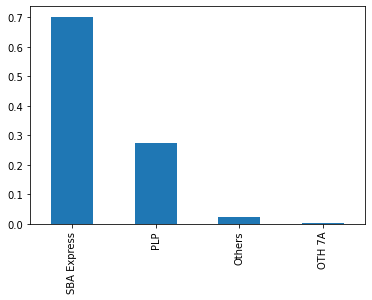

In [ ]:
comparitive_data['DeliveryMethod'].value_counts(normalize=True).plot.bar()

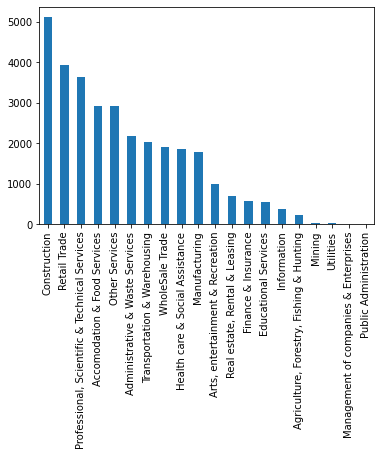

In [ ]:
comparitive_data['Supersector'].value_counts().plot.bar()

In [ ]:
Nonsantander_data= regional_loan_data.loc[regional_loan_data['BankName']!= 'Santander Bank, National Association']
Nonsantander_data.reset_index(drop=True, inplace=True)
Nonsantander_data

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-06-30,7A,Amrani & Associates,8A Home Avenue,NATICK,MA,1760,"Leader Bank, National Association",180 Massachusetts Ave,ARLINGTON,MA,02474,30000,15000,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),3.99,48,532120.0,"Truck, Utility Trailer, and RV (Recreational V...",NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,5.0,INDIVIDUAL,PIF,2018-03-31,NaT,0,False,2,53,"Real estate, Rental & Leasing",0.50
1,2021-06-30,7A,"Radar Solutions International,",51 RIVERVIEW AVENUE,WALTHAM,MA,2453,"Leader Bank, National Association",180 Massachusetts Ave,ARLINGTON,MA,02474,65000,32500,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),3.99,48,541360.0,Geophysical Surveying and Mapping Services,NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,5.0,CORPORATION,PIF,2020-01-31,NaT,0,False,4,54,"Professional, Scientific & Technical Services",0.50
2,2021-06-30,7A,"Giovanni's Pizza & Roast Beef,",1427 TREMONT STREET,ROXBURY CROSSING,MA,2120,"Leader Bank, National Association",180 Massachusetts Ave,ARLINGTON,MA,02474,50000,25000,2015-12-31,2016,2016-02-01,SBA Express,FA$TRK (Small Loan Express),5.50,84,722511.0,Full-Service Restaurants,NaN,NaN,SUFFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,7.0,CORPORATION,EXEMPT,NaT,NaT,0,True,2,72,Accomodation & Food Services,0.50
3,2021-06-30,7A,Baljinder Kaur,14 Main Street,Johnson City,NY,13790,"NBT Bank, National Association",52 S Broad St,NORWICH,NY,13815,165000,123750,2015-12-31,2016,2016-02-01,Others,Lender Advantage Initiative,5.00,240,445120.0,Convenience Stores,NaN,NaN,BROOME,NY,SYRACUSE DISTRICT OFFICE,22.0,INDIVIDUAL,EXEMPT,NaT,NaT,0,False,5,44,Retail Trade,0.75
4,2021-06-30,7A,Roman Building Products Inc,1648 Winchester Road,Bensalem,PA,19020,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,250000,187500,2015-12-31,2016,2016-02-01,PLP,Guaranty,4.30,10,238990.0,All Other Specialty Trade Contractors,NaN,NaN,BUCKS,PA,PHILADELPHIA DISTRICT OFFICE,1.0,CORPORATION,PIF,2016-12-31,NaT,0,False,11,23,Construction,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64744,2021-06-30,7A,Falletta Masonry LLC,1455 SAINT GEORGE AVE,ROSELLE,NJ,7203,"Wilmington Savings Fund Society, FSB",500 Delaware Ave,WILMINGTON,DE,19801,564500,508050,2021-06-30,2021,NaT,PLP,Guaranty,6.00,300,238140.0,Masonry Contractors,NaN,NaN,UNION,NJ,NEW JERSEY DISTRICT OFFICE,10.0,CORPORATION,COMMIT,NaT,NaT,0,False,10,23,Construction,0.90
64745,2021-06-30,7A,PROGRESSIVE REAL ESTATE HOLDIN,95 GRANT ST,SALISBURY,PA,15558,"PNC Bank, National Association",222 Delaware Ave,WILMINGTON,DE,19801,243000,121500,2021-06-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),4.23,300,621210.0,Offices of Dentists,NaN,NaN,SOMERSET,PA,PITTSBURGH DISTRICT OFFICE,13.0,CORPORATION,COMMIT,NaT,NaT,0,False,54,62,Health care & Social Assistance,0.50
64746,2021-06-30,7A,"Malacream, Inc.",360 E South Street,Wilkes Barre,PA,18702,"Community Bank, National Association",45-49 Court St,CANTON,NY,13617,522000,469800,2021-06-30,2021,NaT,OTH 7A,Guaranty,3.75,240,722515.0,Snack and Nonalcoholic Beverage Bars,NaN,NaN,LUZERNE,PA,PHILADELPHIA DISTRICT OFFICE,8.0,CORPORATION,COMMIT,NaT,NaT,0,False,70,72,Accomodation & Food Services,0.90
64747,2021-06-30,7A,DSA Finishing Inc.,221 MAIN STREET,DANBURY,CT,6810,"Webster Bank, National Association",137 Bank St,WATERBURY,CT,06702,250000,187500,2021-06-30,20

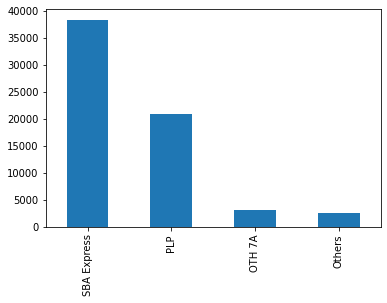

In [ ]:
Nonsantander_data['DeliveryMethod'].value_counts().plot.bar()

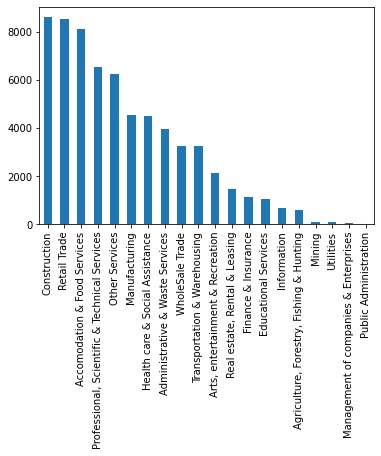

In [ ]:
Nonsantander_data['Supersector'].value_counts().plot.bar()

Top 5 lenders

In [ ]:
regional_loan_data.BankName.value_counts().head(5)

TD Bank, National Association              13343
Manufacturers and Traders Trust Company     7449
Independence Bank                           4060
Newtek Small Business Finance, Inc.         3603
Eastern Bank                                3271
Name: BankName, dtype: int64

In [ ]:
tdbank_df= regional_loan_data.loc[regional_loan_data['BankName']=='TD Bank, National Association']
tdbank_df.reset_index(drop=True, inplace=True)
tdbank_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-06-30,7A,BROAD SOUND CONSTRUCTION LLC,278 Poland Range Road,POWNAL,ME,4069,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,30300,15150,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),4.50,84,238350.0,Finish Carpentry Contractors,NaN,NaN,CUMBERLAND,ME,MAINE DISTRICT OFFICE,1.0,CORPORATION,PIF,2018-10-31,NaT,0,False,2,23,Construction,0.50
1,2021-06-30,7A,JMM TECHNOLOGIES LLC,800 4th Street SW Apt N615,WASHINGTON,DC,20024,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,30000,15000,2016-01-04,2016,2016-01-08,SBA Express,FA$TRK (Small Loan Express),8.00,84,541512.0,Computer Systems Design Services,NaN,NaN,DISTRICT OF COLUMBIA,DC,WASHINGTON DISTRICT OFFICE,0.0,CORPORATION,PIF,2018-07-31,NaT,0,True,2,54,"Professional, Scientific & Technical Services",0.50
2,2021-06-30,7A,DYNAPRO DIRECT LLC,118 DUDA LANE,MATAWAN,NJ,7747,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,250000,125000,2016-01-04,2016,2016-10-01,SBA Express,FA$TRK (Small Loan Express),5.00,84,454111.0,Electronic Shopping,NaN,NaN,MONMOUTH,NJ,NEW JERSEY DISTRICT OFFICE,6.0,CORPORATION,EXEMPT,NaT,NaT,0,True,0,45,Retail Trade,0.50
3,2021-06-30,7A,S&R Engineers PC.,5 Commerce Way Suite 208,TRENTON,NJ,8691,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,1485000,1113750,2016-01-04,2016,NaT,PLP,Guaranty,5.75,120,541330.0,Engineering Services,NaN,NaN,MERCER,NJ,NEW JERSEY DISTRICT OFFICE,4.0,CORPORATION,CANCLD,NaT,NaT,0,False,30,54,"Professional, Scientific & Technical Services",0.75
4,2021-06-30,7A,GG MART INC.,1545 INDIAN NECK LANE,PECONIC,NY,11958,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,30000,15000,2016-01-05,2016,2016-01-05,SBA Express,FA$TRK (Small Loan Express),7.50,60,541410.0,Interior Design Services,NaN,NaN,SUFFOLK,NY,MELVILLE BRANCH OFFICE,1.0,CORPORATION,PIF,2021-03-31,NaT,0,False,0,54,"Professional, Scientific & Technical Services",0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13338,2021-06-30,7A,NORTH BROWARD CHIROPRACTIC &am,4615 NW 121ST Ave,Pompano Beach,FL,33076,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,100000,50000,2021-06-29,2021,NaT,SBA Express,FA$TRK (Small Loan Express),3.29,60,621310.0,Offices of Chiropractors,NaN,NaN,BROWARD,FL,SOUTH FLORIDA DISTRICT OFFICE,22.0,CORPORATION,COMMIT,NaT,NaT,0,False,12,62,Health care & Social Assistance,0.50
13339,2021-06-30,7A,"Seri, LLC",1803 Augusta St,Greenville,SC,29605,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,25000,12500,2021-06-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),4.00,120,448130.0,Children's and Infants' Clothing Stores,NaN,NaN,GREENVILLE,SC,SOUTH CAROLINA DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,True,2,44,Retail Trade,0.50
13340,2021-06-30,7A,"Seri, LLC",1803 Augusta St,Greenville,SC,29605,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,150000,75000,2021-06-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),4.30,120,448130.0,Children's and Infants' Clothing Stores,NaN,NaN,GREENVILLE,SC,SOUTH CAROLINA DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,False,2,44,Retail Trade,0.50
13341,2021-06-30,7A,JENN MORIN CONSULTING LLC,890 Hammond Street,Bangor,ME,4401,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,10000,5000,2021-06-30,2021,NaT,S

In [ ]:
tdbank_df['DeliveryMethod'].unique()

array(['SBA Express', 'PLP', 'OTH 7A', 'Others'], dtype=object)

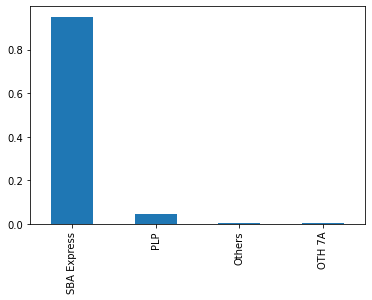

In [ ]:
tdbank_df['DeliveryMethod'].value_counts(normalize=True).plot.bar()

In [ ]:
trader_trust_df= regional_loan_data.loc[regional_loan_data['BankName']=='Manufacturers and Traders Trust Company']
trader_trust_df.reset_index(drop=True, inplace=True)
trader_trust_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-06-30,7A,Roman Building Products Inc,1648 Winchester Road,Bensalem,PA,19020,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,250000,187500,2015-12-31,2016,2016-02-01,PLP,Guaranty,4.30,10,238990.0,All Other Specialty Trade Contractors,NaN,NaN,BUCKS,PA,PHILADELPHIA DISTRICT OFFICE,1.0,CORPORATION,PIF,2016-12-31,NaT,0,False,11,23,Construction,0.75
1,2021-06-30,7A,Human Element LLC,1625 Wyatts Ridge,CROWNSVILLE,MD,21032,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,100000,50000,2016-01-04,2016,2016-08-01,SBA Express,FA$TRK (Small Loan Express),5.50,107,511210.0,Software Publishers,NaN,NaN,ANNE ARUNDEL,MD,BALTIMORE DISTRICT OFFICE,4.0,CORPORATION,PIF,2018-12-31,NaT,0,False,4,51,Information,0.50
2,2021-06-30,7A,Human Element LLC,1625 Wyatts Ridge,CROWNSVILLE,MD,21032,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,300000,225000,2016-01-04,2016,2016-01-04,Others,Lender Advantage Initiative,5.10,60,511210.0,Software Publishers,NaN,NaN,ANNE ARUNDEL,MD,BALTIMORE DISTRICT OFFICE,4.0,CORPORATION,PIF,2018-12-31,NaT,0,False,4,51,Information,0.75
3,2021-06-30,7A,Entmatrix Inc.,8585 BALTIMORE NATIONAL PIKE S,Ellicott City,MD,21043,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,250000,125000,2016-01-04,2016,2016-03-01,SBA Express,FA$TRK (Small Loan Express),9.75,84,541511.0,Custom Computer Programming Services,NaN,NaN,HOWARD,MD,BALTIMORE DISTRICT OFFICE,7.0,CORPORATION,PIF,2019-10-31,NaT,0,True,10,54,"Professional, Scientific & Technical Services",0.50
4,2021-06-30,7A,Bicallis LLC,714 South Wolfe Street #38178,Baltimore,MD,21224,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,100000,50000,2016-01-04,2016,2016-01-04,SBA Express,FA$TRK (Small Loan Express),7.00,84,541990.0,"All Other Professional, Scientific, and Techni...",NaN,NaN,BALTIMORE CITY,MD,BALTIMORE DISTRICT OFFICE,3.0,CORPORATION,EXEMPT,NaT,NaT,0,False,50,54,"Professional, Scientific & Technical Services",0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7444,2021-06-30,7A,GREECEBALL INC,715 MILITARY RD,BUFFALO,NY,14216,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,250000,187500,2021-06-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),5.25,120,722511.0,Full-Service Restaurants,NaN,NaN,ERIE,NY,BUFFALO DISTRICT OFFICE,26.0,CORPORATION,COMMIT,NaT,NaT,0,False,4,72,Accomodation & Food Services,0.75
7445,2021-06-30,7A,Bhumi INC,6901 SECURITY BLVD SPC 761,WINDSOR MILL,MD,21244,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,75000,56250,2021-06-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),4.50,120,448210.0,Shoe Stores,NaN,NaN,BALTIMORE,MD,BALTIMORE DISTRICT OFFICE,7.0,CORPORATION,COMMIT,NaT,NaT,0,True,0,44,Retail Trade,0.75
7446,2021-06-30,7A,VAPING CONNECTION LAKEWOOD LLC,20 DANIELLE CT,Jackson,NJ,8527,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,100000,50000,2021-06-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),7.75,120,453991.0,Tobacco Stores,NaN,NaN,OCEAN,NJ,NEW JERSEY DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,True,0,45,Retail Trade,0.50
7447,2021-06-30,7A,"The Farrells, Inc.",76 Viaduct Road,STAMFORD,CT,6902,Manufacturers and Traders Trust Company,"On

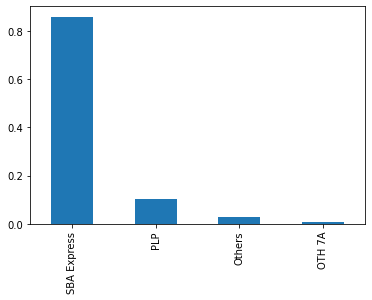

In [ ]:

trader_trust_df['DeliveryMethod'].value_counts(normalize=True).plot.bar()

In [ ]:
independence_bank_df= regional_loan_data.loc[regional_loan_data['BankName']=='Independence Bank']
independence_bank_df.reset_index(drop=True, inplace=True)
independence_bank_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-06-30,7A,"Against The Grain, Inc.",679 Yonkers Avenue,YONKERS,NY,10704,Independence Bank,1370 S County Trl,EAST GREENWICH,RI,02818,150000,127500,2016-01-04,2016,2016-01-04,Others,Lender Advantage Initiative,6.25,103,812990.0,All Other Personal Services,NaN,NaN,WESTCHESTER,NY,NEW YORK DISTRICT OFFICE,16.0,CORPORATION,CHGOFF,NaT,2018-01-31,140724,False,6,81,Other Services,0.85
1,2021-06-30,7A,Scents of Style Inc.,3801 Victory Blvd Unit F-6,STATEN ISLAND,NY,10314,Independence Bank,1370 S County Trl,EAST GREENWICH,RI,02818,150000,127500,2016-01-08,2016,2016-01-08,Others,Lender Advantage Initiative,6.25,103,424210.0,Drugs and Druggists' Sundries Merchant Wholesa...,NaN,NaN,RICHMOND,NY,NEW YORK DISTRICT OFFICE,11.0,CORPORATION,CHGOFF,NaT,2018-01-05,136874,False,1,42,WholeSale Trade,0.85
2,2021-06-30,7A,"FALLON MOVING & STORAGE, INC.","800 Marshall Phelps, RD",WINDSOR,CT,6095,Independence Bank,1370 S County Trl,EAST GREENWICH,RI,02818,150000,127500,2016-01-08,2016,2016-01-08,Others,Lender Advantage Initiative,6.25,120,493110.0,General Warehousing and Storage,NaN,NaN,HARTFORD,CT,CONNECTICUT DISTRICT OFFICE,1.0,CORPORATION,EXEMPT,NaT,NaT,0,False,12,49,Transportation & Warehousing,0.85
3,2021-06-30,7A,"DPW Automotive, Inc.",181 Kennedy Ave,CAMPBELL,CA,95008,Independence Bank,1370 S County Trl,EAST GREENWICH,RI,02818,150000,127500,2016-01-08,2016,2016-01-08,PLP,Guaranty,6.25,120,811111.0,General Automotive Repair,NaN,NaN,SANTA CLARA,CA,SAN FRANCISCO DISTRICT OFFICE,18.0,CORPORATION,EXEMPT,NaT,NaT,0,False,0,81,Other Services,0.85
4,2021-06-30,7A,Six Lounge LLC,2100 Frederick Douglass Blvd,NEW YORK,NY,10026,Independence Bank,1370 S County Trl,EAST GREENWICH,RI,02818,150000,127500,2016-01-12,2016,2016-01-12,Others,Lender Advantage Initiative,6.25,89,722511.0,Full-Service Restaurants,NaN,NaN,NEW YORK,NY,NEW YORK DISTRICT OFFICE,13.0,CORPORATION,CHGOFF,NaT,2019-02-07,128608,False,16,72,Accomodation & Food Services,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4055,2021-06-30,7A,"Durant Trucking & Repairs, LLC",321 E Forest Oaks Dr,Sanford,NC,27330,Independence Bank,1370 S County Trl,EAST GREENWICH,RI,02818,125000,106250,2019-10-22,2020,NaT,OTH 7A,Guaranty,7.75,120,238990.0,All Other Specialty Trade Contractors,NaN,NaN,CHATHAM,NC,NORTH CAROLINA DISTRICT OFFICE,2.0,CORPORATION,CANCLD,NaT,NaT,0,False,4,23,Construction,0.85
4056,2021-06-30,7A,Premiere Renovations and Const,42745 Redgate Farm Ln,Leonardtown,MD,20650,Independence Bank,1370 S County Trl,EAST GREENWICH,RI,02818,150000,127500,2019-10-23,2020,2019-10-31,OTH 7A,Guaranty,7.75,120,236115.0,New Single-Family Housing Construction (except...,NaN,NaN,SAINT MARYS,MD,BALTIMORE DISTRICT OFFICE,5.0,CORPORATION,EXEMPT,NaT,NaT,0,False,5,23,Construction,0.85
4057,2021-06-30,7A,American Elite Painters Corp,79 Burlington Rd,Bedford,MA,1730,Independence Bank,1370 S County Trl,EAST GREENWICH,RI,02818,150000,127500,2019-10-23,2020,2019-10-31,OTH 7A,Guaranty,7.75,120,238990.0,All Other Specialty Trade Contractors,NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,6.0,CORPORATION,EXEMPT,NaT,NaT,0,False,5,23,Construction,0.85
4058,2021-06-30,7A,Apod Group LLC,21803 Three Notch Road,Lexington Park,MD,20653,Independence Bank,1370 S County Trl,EAST GREENWICH,RI,02818,150000,127500,2019-10-24,2020,2019-10-31,OTH 7A,Guaranty,7.75,120,561612.0,Security Guards and Patrol Services,NaN,N

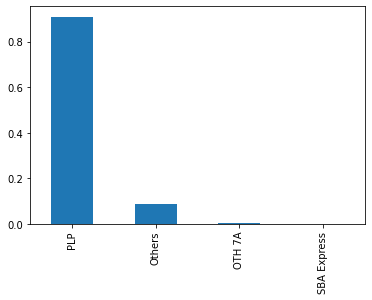

In [ ]:
independence_bank_df['DeliveryMethod'].value_counts(normalize=True).plot.bar()

In [ ]:
newtek_df= regional_loan_data.loc[regional_loan_data['BankName']=='Newtek Small Business Finance, Inc.']
newtek_df.reset_index(drop=True, inplace=True)
newtek_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-06-30,7A,Jemcon,10718 258th Avenue East,BUCKLEY,WA,98321,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,80000,68000,2016-01-04,2016,NaT,PLP,Guaranty,6.25,120,484220.0,Specialized Freight (except Used Goods) Trucki...,NaN,NaN,PIERCE,WA,SEATTLE DISTRICT OFFICE,8.0,INDIVIDUAL,CANCLD,NaT,NaT,0,False,1,48,Transportation & Warehousing,0.85000
1,2021-06-30,7A,Tammy Lavertue Financial Manag,24 Wakefield Street,ROCHESTER,NH,3867,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,75000,63750,2016-01-05,2016,2016-01-05,PLP,Guaranty,6.25,120,523930.0,Investment Advice,NaN,NaN,STRAFFORD,NH,NEW HAMPSHIRE DISTRICT OFFICE,1.0,INDIVIDUAL,PIF,2021-05-31,NaT,0,False,1,52,Finance & Insurance,0.85000
2,2021-06-30,7A,"WILDFLOUR BAKERY & CAFE, LLC",5137 Clareton,AGOURA HILLS,CA,91301,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,250000,187500,2016-01-05,2016,2016-01-05,PLP,Guaranty,6.25,120,722310.0,Food Service Contractors,NaN,NaN,LOS ANGELES,CA,LOS ANGELES DISTRICT OFFICE,33.0,CORPORATION,EXEMPT,NaT,NaT,0,False,43,72,Accomodation & Food Services,0.75000
3,2021-06-30,7A,GPA MECHANICAL PIPING OF NEW Y,60 Ralph Ave,COPIAGUE,NY,11726,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,775000,581250,2016-01-05,2016,NaT,PLP,Guaranty,6.25,300,238220.0,"Plumbing, Heating, and Air-Conditioning Contra...",NaN,NaN,SUFFOLK,NY,MELVILLE BRANCH OFFICE,2.0,CORPORATION,CANCLD,NaT,NaT,0,False,12,23,Construction,0.75000
4,2021-06-30,7A,Oak Tree Storage LLC,1002 Quentin Road Suite 3005,BROOKLYN,NY,11223,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,315000,236250,2016-01-15,2016,2016-01-15,PLP,Guaranty,6.25,120,519190.0,All Other Information Services,NaN,NaN,KINGS,NY,NEW YORK DISTRICT OFFICE,9.0,CORPORATION,PIF,2017-12-31,NaT,0,False,4,51,Information,0.75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598,2021-06-30,7A,Preston Jones,62361 MARY MILLER AVE,HOMER,AK,99603,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,55000,49500,2021-06-28,2021,NaT,PLP,Guaranty,6.00,120,238350.0,Finish Carpentry Contractors,NaN,NaN,KENAI PENINSULA,AK,ALASKA DISTRICT OFFICE,0.0,CORPORATION,COMMIT,NaT,NaT,0,False,4,23,Construction,0.90000
3599,2021-06-30,7A,New York Equestrian Center LTD,633 EAGLE AVE,WEST HEMPSTEAD,NY,11552,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,3100000,620000,2021-06-29,2021,NaT,PLP,Guaranty,6.00,300,713990.0,All Other Amusement and Recreation Industries,NaN,NaN,NASSAU,NY,MELVILLE BRANCH OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,False,20,71,"Arts, entertainment & Recreation",0.20000
3600,2021-06-30,7A,"Superior Coach Interiors, Inc.",211 BABB DR,LEBANON,TN,37087,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,5000000,4325550,2021-06-29,2021,NaT,PLP,Guaranty,6.00,120,336214.0,Travel Trailer and Camper Manufacturing,NaN,NaN,WILSON,TN,TENNESSEE DISTRICT OFFICE,6.0,CORPORATION,COMMIT,NaT,NaT,0,False,64,33,Manufacturing,0.86511
3601,2021-06-30,7A,Basha Home Improvement LLC,41 VAN HOUTEN AVE,JERSEY CITY,NJ,7305,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,10200,7650,2021-06-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),9.75,120,236118.0,Residential Remodelers,N

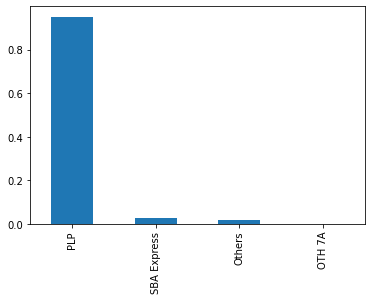

In [ ]:
newtek_df['DeliveryMethod'].value_counts(normalize=True).plot.bar()

In [ ]:
eastern_df= regional_loan_data.loc[regional_loan_data['BankName']=='Eastern Bank']
eastern_df.reset_index(drop=True, inplace=True)
eastern_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-06-30,7A,MichaelSegal,155R Sutherland Road,Brighton,MA,2135,Eastern Bank,265 Franklin St,BOSTON,MA,02110,25000,12500,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),10.00,60,442110.0,Furniture Stores,NaN,NaN,SUFFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,7.0,INDIVIDUAL,PIF,2019-01-31,NaT,0,False,0,44,Retail Trade,0.50
1,2021-06-30,7A,DESH ENTERPRISE INC,505 Washington Street,Dorchester,MA,2124,Eastern Bank,265 Franklin St,BOSTON,MA,02110,50000,25000,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),10.00,84,445120.0,Convenience Stores,NaN,NaN,SUFFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,8.0,CORPORATION,EXEMPT,NaT,NaT,0,True,0,44,Retail Trade,0.50
2,2021-06-30,7A,Color Craft Corporation,92 Washington St,Peabody,MA,1960,Eastern Bank,265 Franklin St,BOSTON,MA,02110,50000,25000,2016-01-05,2016,2016-01-05,SBA Express,FA$TRK (Small Loan Express),8.00,60,238990.0,All Other Specialty Trade Contractors,NaN,NaN,ESSEX,MA,MASSACHUSETTS DISTRICT OFFICE,6.0,CORPORATION,PIF,2018-04-30,NaT,0,False,3,23,Construction,0.50
3,2021-06-30,7A,Color Craft Corporation,92 Washington St,Peabody,MA,1960,Eastern Bank,265 Franklin St,BOSTON,MA,02110,50000,25000,2016-01-05,2016,2016-01-05,SBA Express,FA$TRK (Small Loan Express),8.00,84,238990.0,All Other Specialty Trade Contractors,NaN,NaN,ESSEX,MA,MASSACHUSETTS DISTRICT OFFICE,6.0,CORPORATION,PIF,2018-04-30,NaT,0,True,3,23,Construction,0.50
4,2021-06-30,7A,16 Forsythe Ave LLC,16 Forsythe Avenue,South Yarmouth,MA,2664,Eastern Bank,265 Franklin St,BOSTON,MA,02110,128000,108800,2016-01-06,2016,2016-03-01,Others,Lender Advantage Initiative,5.25,84,523930.0,Investment Advice,NaN,NaN,BARNSTABLE,MA,MASSACHUSETTS DISTRICT OFFICE,9.0,CORPORATION,EXEMPT,NaT,NaT,0,False,3,52,Finance & Insurance,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,2021-06-30,7A,797 Main Street Realty LLC,797 Main Street,FALMOUTH,MA,2540,Eastern Bank,265 Franklin St,BOSTON,MA,02110,710000,639000,2021-06-23,2021,NaT,PLP,Guaranty,3.75,300,722511.0,Full-Service Restaurants,NaN,NaN,BARNSTABLE,MA,MASSACHUSETTS DISTRICT OFFICE,9.0,CORPORATION,COMMIT,NaT,NaT,0,False,2,72,Accomodation & Food Services,0.90
3267,2021-06-30,7A,Kailakesh Corporation,45 Storey Avenue,NEWBURYPORT,MA,1950,Eastern Bank,265 Franklin St,BOSTON,MA,02110,180000,135000,2021-06-23,2021,NaT,SBA Express,FA$TRK (Small Loan Express),6.25,120,445310.0,"Beer, Wine, and Liquor Stores",NaN,NaN,ESSEX,MA,MASSACHUSETTS DISTRICT OFFICE,6.0,CORPORATION,COMMIT,NaT,NaT,0,False,2,44,Retail Trade,0.75
3268,2021-06-30,7A,IN NEED SOLUTIONS LLC,117 MARIVISTA AVE,WALTHAM,MA,2451,Eastern Bank,265 Franklin St,BOSTON,MA,02110,50000,37500,2021-06-29,2021,NaT,SBA Express,FA$TRK (Small Loan Express),6.74,60,541219.0,Other Accounting Services,NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,5.0,CORPORATION,COMMIT,NaT,NaT,0,False,2,54,"Professional, Scientific & Technical Services",0.75
3269,2021-06-30,7A,Advanced Pump Company Inc,50 R High St,Woburn,MA,1801,Eastern Bank,265 Franklin St,BOSTON,MA,02110,100000,75000,2021-06-29,2021,NaT,SBA Express,FA$TRK (Small Loan Express),4.25,120,333996.0,Fluid Power Pump and Motor Manufacturing,NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,5.0,CORPORATION,CANCLD,NaT,NaT,0,True,2,33,Manufacturing,0.75


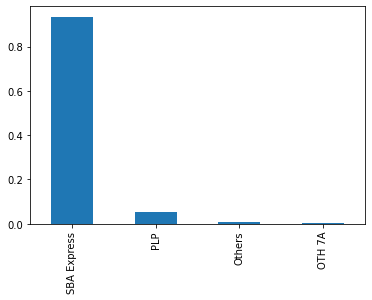

In [ ]:
eastern_df['DeliveryMethod'].value_counts(normalize=True).plot.bar()

Santander Approvals

In [ ]:
santander_data= regional_loan_data.loc[regional_loan_data['BankName']== 'Santander Bank, National Association']
santander_data.reset_index(drop=True, inplace=True)
santander_data

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-06-30,7A,"WATER STREET DELI, LLC",82 Water Street,BOSTON,MA,2109,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,110000,55000,2016-01-06,2016,2016-01-06,SBA Express,FA$TRK (Small Loan Express),7.50,107,722513.0,Limited-Service Restaurants,NaN,NaN,SUFFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,8.0,CORPORATION,EXEMPT,NaT,NaT,0,False,0,72,Accomodation & Food Services,0.50
1,2021-06-30,7A,"Carpet Impressions, Inc.",53 Ray Dwier Drive,Hamilton,NJ,8690,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,50000,25000,2016-01-06,2016,2016-01-06,SBA Express,FA$TRK (Small Loan Express),9.50,82,238330.0,Flooring Contractors,NaN,NaN,MERCER,NJ,NEW JERSEY DISTRICT OFFICE,4.0,CORPORATION,PIF,2017-12-31,NaT,0,False,0,23,Construction,0.50
2,2021-06-30,7A,"Andover Motor Cars, LLC DBA Ba",23 Main Street,BUZZARDS BAY,MA,2532,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,80000,40000,2016-01-08,2016,2016-01-08,SBA Express,FA$TRK (Small Loan Express),7.50,60,447110.0,Gasoline Stations with Convenience Stores,NaN,NaN,BARNSTABLE,MA,MASSACHUSETTS DISTRICT OFFICE,9.0,CORPORATION,PIF,2019-02-28,NaT,0,True,2,44,Retail Trade,0.50
3,2021-06-30,7A,Floors Just For You Inc,5471 Route 40,BLACKWOOD,NJ,8012,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,50000,25000,2016-01-11,2016,2016-02-01,SBA Express,FA$TRK (Small Loan Express),9.50,60,238330.0,Flooring Contractors,NaN,NaN,CAMDEN,NJ,NEW JERSEY DISTRICT OFFICE,1.0,CORPORATION,PIF,2017-04-30,NaT,0,True,2,23,Construction,0.50
4,2021-06-30,7A,VETERANS GROUP LLC,30830 HEIPLE RD,ESTACADA,OR,97023,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,550000,412500,2016-01-12,2016,2016-02-01,OTH 7A,Contract Guaranty,4.00,30,336612.0,Boat Building,NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,4.0,CORPORATION,PIF,2018-08-31,NaT,0,True,28,33,Manufacturing,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,2021-06-30,7A,PARADOR ROJO RESTAURANT LLC,344 MORRIS AVE,ELIZABETH,NJ,7208,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,150000,75000,2020-06-05,2020,NaT,SBA Express,FA$TRK (Small Loan Express),6.75,120,722511.0,Full-Service Restaurants,NaN,NaN,UNION,NJ,NEW JERSEY DISTRICT OFFICE,10.0,CORPORATION,CANCLD,NaT,NaT,0,True,0,72,Accomodation & Food Services,0.50
1147,2021-06-30,7A,Affordable Home Care LLC,926 RACE STREET SUITE 2A,PHILADELPHIA,PA,19107,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,1000000,500000,2020-07-22,2020,2020-09-30,SBA Express,FA$TRK (Small Loan Express),4.25,120,621610.0,Home Health Care Services,NaN,NaN,PHILADELPHIA,PA,PHILADELPHIA DISTRICT OFFICE,3.0,CORPORATION,EXEMPT,NaT,NaT,0,True,100,62,Health care & Social Assistance,0.50
1148,2021-06-30,7A,Nugent Plastering Inc.,498 WATERTOWN ST,NEWTON,MA,2460,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,100000,50000,2020-09-16,2020,NaT,SBA Express,FA$TRK (Small Loan Express),7.25,120,238310.0,Drywall and Insulation Contractors,NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,4.0,CORPORATION,CANCLD,NaT,NaT,0,True,1,23,Construction,0.50
1149,2021-06-30,7A,Lifepsy Freehold Property LLC,4255 US Highway 9N Building,FREEHOLD,NJ,7728,"Santa

Santander Bank approvals

In [ ]:
santander_data['DeliveryMethod'].value_counts()

SBA Express    1056
PLP              90
OTH 7A            3
Others            2
Name: DeliveryMethod, dtype: int64

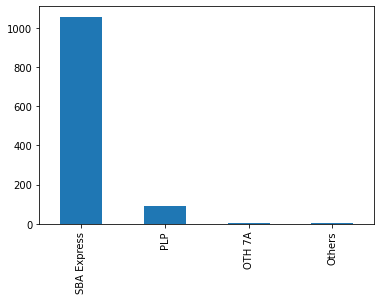

In [ ]:
santander_data['DeliveryMethod'].value_counts().plot.bar()

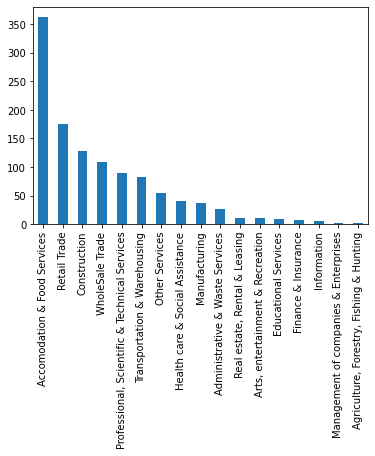

In [ ]:
santander_data['Supersector'].value_counts().plot.bar()

Customer Profiling

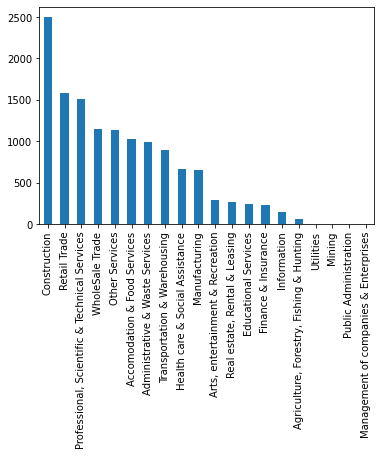

In [ ]:
tdbank_df['Supersector'].value_counts().plot.bar()

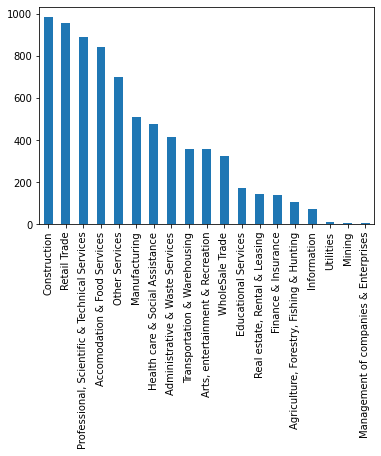

In [ ]:
trader_trust_df['Supersector'].value_counts().plot.bar()

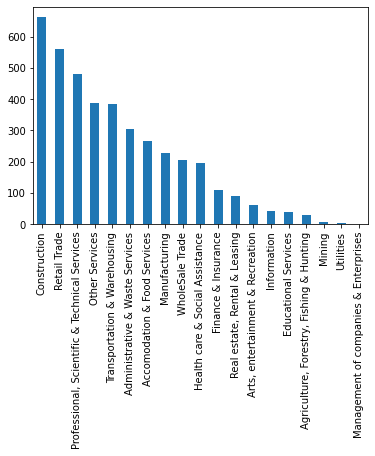

In [ ]:
independence_bank_df['Supersector'].value_counts().plot.bar()

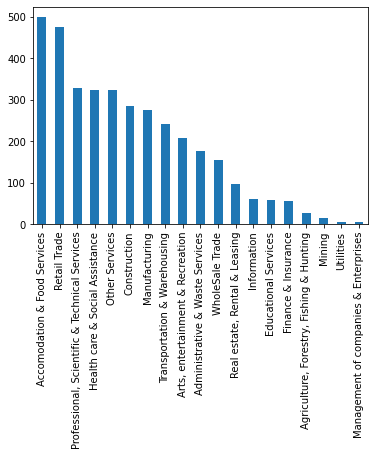

In [ ]:
newtek_df['Supersector'].value_counts().plot.bar()

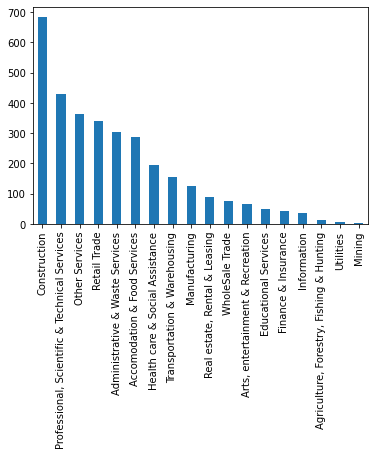

In [ ]:
eastern_df['Supersector'].value_counts().plot.bar()

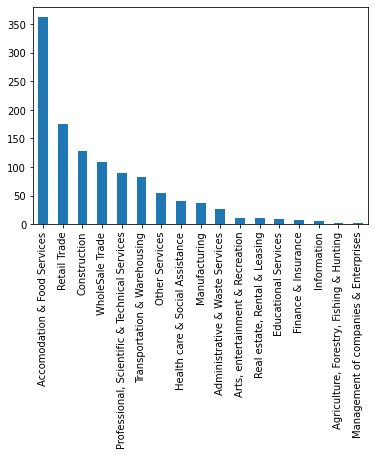

In [ ]:
santander_data['Supersector'].value_counts().plot.bar()

Descriptive Statistics

In [ ]:
santander_data

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-06-30,7A,"WATER STREET DELI, LLC",82 Water Street,BOSTON,MA,2109,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,110000,55000,2016-01-06,2016,2016-01-06,SBA Express,FA$TRK (Small Loan Express),7.50,107,722513.0,Limited-Service Restaurants,NaN,NaN,SUFFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,8.0,CORPORATION,EXEMPT,NaT,NaT,0,False,0,72,Accomodation & Food Services,0.50
1,2021-06-30,7A,"Carpet Impressions, Inc.",53 Ray Dwier Drive,Hamilton,NJ,8690,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,50000,25000,2016-01-06,2016,2016-01-06,SBA Express,FA$TRK (Small Loan Express),9.50,82,238330.0,Flooring Contractors,NaN,NaN,MERCER,NJ,NEW JERSEY DISTRICT OFFICE,4.0,CORPORATION,PIF,2017-12-31,NaT,0,False,0,23,Construction,0.50
2,2021-06-30,7A,"Andover Motor Cars, LLC DBA Ba",23 Main Street,BUZZARDS BAY,MA,2532,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,80000,40000,2016-01-08,2016,2016-01-08,SBA Express,FA$TRK (Small Loan Express),7.50,60,447110.0,Gasoline Stations with Convenience Stores,NaN,NaN,BARNSTABLE,MA,MASSACHUSETTS DISTRICT OFFICE,9.0,CORPORATION,PIF,2019-02-28,NaT,0,True,2,44,Retail Trade,0.50
3,2021-06-30,7A,Floors Just For You Inc,5471 Route 40,BLACKWOOD,NJ,8012,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,50000,25000,2016-01-11,2016,2016-02-01,SBA Express,FA$TRK (Small Loan Express),9.50,60,238330.0,Flooring Contractors,NaN,NaN,CAMDEN,NJ,NEW JERSEY DISTRICT OFFICE,1.0,CORPORATION,PIF,2017-04-30,NaT,0,True,2,23,Construction,0.50
4,2021-06-30,7A,VETERANS GROUP LLC,30830 HEIPLE RD,ESTACADA,OR,97023,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,550000,412500,2016-01-12,2016,2016-02-01,OTH 7A,Contract Guaranty,4.00,30,336612.0,Boat Building,NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,4.0,CORPORATION,PIF,2018-08-31,NaT,0,True,28,33,Manufacturing,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,2021-06-30,7A,PARADOR ROJO RESTAURANT LLC,344 MORRIS AVE,ELIZABETH,NJ,7208,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,150000,75000,2020-06-05,2020,NaT,SBA Express,FA$TRK (Small Loan Express),6.75,120,722511.0,Full-Service Restaurants,NaN,NaN,UNION,NJ,NEW JERSEY DISTRICT OFFICE,10.0,CORPORATION,CANCLD,NaT,NaT,0,True,0,72,Accomodation & Food Services,0.50
1147,2021-06-30,7A,Affordable Home Care LLC,926 RACE STREET SUITE 2A,PHILADELPHIA,PA,19107,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,1000000,500000,2020-07-22,2020,2020-09-30,SBA Express,FA$TRK (Small Loan Express),4.25,120,621610.0,Home Health Care Services,NaN,NaN,PHILADELPHIA,PA,PHILADELPHIA DISTRICT OFFICE,3.0,CORPORATION,EXEMPT,NaT,NaT,0,True,100,62,Health care & Social Assistance,0.50
1148,2021-06-30,7A,Nugent Plastering Inc.,498 WATERTOWN ST,NEWTON,MA,2460,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,100000,50000,2020-09-16,2020,NaT,SBA Express,FA$TRK (Small Loan Express),7.25,120,238310.0,Drywall and Insulation Contractors,NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,4.0,CORPORATION,CANCLD,NaT,NaT,0,True,1,23,Construction,0.50
1149,2021-06-30,7A,Lifepsy Freehold Property LLC,4255 US Highway 9N Building,FREEHOLD,NJ,7728,"Santa

In [ ]:
range= santander_data['GrossApproval'].max()-santander_data['GrossApproval'].min()
category = range/5
category

740280.0

Year Over Year Santander Approval Count for Various Loans

In [ ]:
years= santander_data['ApprovalFiscalYear'].unique()
unique_delivery_method= santander_data['DeliveryMethod'].unique()
cumulative_approvals_by_year = []
for unq_del in unique_delivery_method:
  temp= santander_data[santander_data['DeliveryMethod'] == unq_del]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear'] == year]['DeliveryMethod'].count())
  cumulative_approvals_by_year.append(temp_list)
cumulative_approvals_by_year

[[186, 231, 273, 263, 103, 0],
 [1, 0, 1, 1, 0, 0],
 [17, 9, 18, 34, 11, 1],
 [1, 0, 0, 0, 1, 0]]

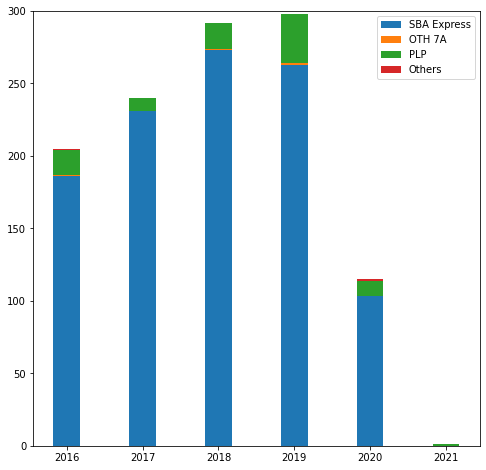

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,unq_del in enumerate(unique_delivery_method):
  # print(index, years, sup_secs_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, cumulative_approvals_by_year[index], width, bottom=temp_bottom_value, label = unq_del)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(cumulative_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(cumulative_approvals_by_year[index])

fig.set_size_inches(8, 8)
ax.set_ylim([0,3*1e2])
ax.legend()
plt.show()

In [ ]:
years = santander_data['ApprovalFiscalYear'].unique()
unique_sup_secs = santander_data['Supersector'].unique()
sup_secs_gross_approvals_by_year = []
for sup_sec in unique_sup_secs:
  temp = santander_data[santander_data['Supersector'] == sup_sec]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  sup_secs_gross_approvals_by_year.append(temp_list)
sup_secs_gross_approvals_by_year

[[5136300, 6271800, 13549800, 8529600, 5183300, 0],
 [2879000, 3139700, 2649500, 5483800, 2244100, 0],
 [3405900, 4933400, 8615100, 7712400, 1935500, 380000],
 [2685000, 2153000, 947400, 3300000, 462900, 0],
 [664000, 1184800, 2166900, 1859700, 1185200, 0],
 [1654300, 681600, 699500, 4476900, 2032000, 0],
 [1124300, 415100, 175000, 0, 0, 0],
 [7191000, 4623500, 7181200, 9208100, 667000, 0],
 [97000, 0, 275000, 248500, 0, 0],
 [1956000, 1977000, 1194000, 4331800, 2453800, 0],
 [35000, 678000, 3116000, 1226500, 528000, 0],
 [427000, 190000, 155000, 167700, 100000, 0],
 [1380000, 1519000, 1223300, 2188800, 366000, 0],
 [1150000, 0, 0, 0, 0, 0],
 [100000, 170000, 1042000, 15500, 0, 0],
 [0, 810000, 1848700, 856000, 150000, 0],
 [0, 11900, 75000, 0, 0, 0]]

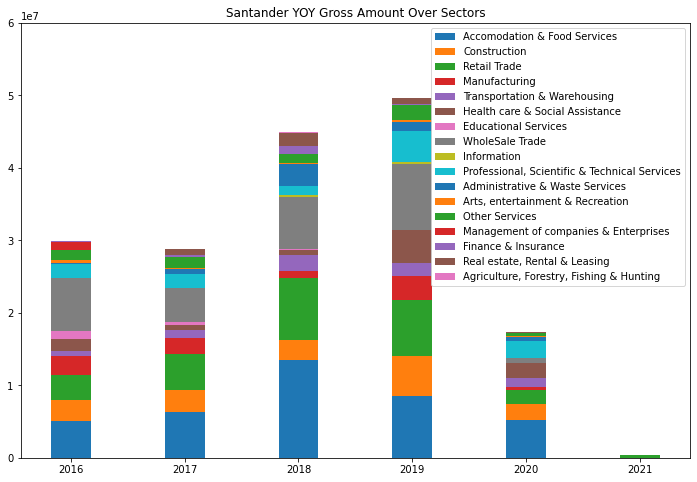

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,sup_sec in enumerate(unique_sup_secs):
  # print(index, years, sup_secs_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, sup_secs_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = sup_sec)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(sup_secs_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(sup_secs_gross_approvals_by_year[index])

# ax.bar(years, sup_secs_gross_approvals_by_year[0], width, label=unique_sup_secs[0])
# ax.bar(years, sup_secs_gross_approvals_by_year[1], width, label=unique_sup_secs[1],bottom=sup_secs_gross_approvals_by_year[0])
fig.set_size_inches(12, 8)
ax.set_ylim([0,6*1e7])
ax.legend()
plt.title('Santander YOY Gross Amount Over Sectors')
plt.show()

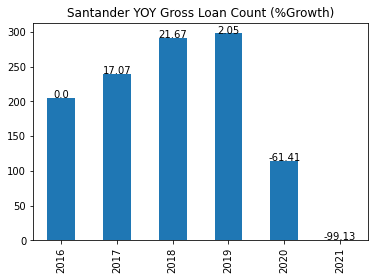

In [ ]:
data_by_year=santander_data['ApprovalFiscalYear'].value_counts()
data_by_year_clean=data_by_year.sort_index().loc[2016:2021]
pct_growth=data_by_year_clean.pct_change()
data_by_year_clean.plot(kind='bar')
labels=pct_growth.values
labels[0]=0
plt.text(0,data_by_year_clean[0],round(labels[0]*100,2),ha='center',fontsize=10)
plt.text(1,data_by_year_clean[1],round(labels[1]*100,2),ha='center',fontsize=10)
plt.text(2,data_by_year_clean[2],round(labels[2]*100,2),ha='center',fontsize=10)
plt.text(3,data_by_year_clean[3],round(labels[3]*100,2),ha='center',fontsize=10)
plt.text(4,data_by_year_clean[4],round(labels[4]*100,2),ha='center',fontsize=10)
plt.text(5,data_by_year_clean[5],round(labels[5]*100,2),ha='center',fontsize=10)
#  plt.text(i, data_by_year_clean2[i], labels[i],ha='center',fontsize=10)
plt.title('Santander YOY Gross Loan Count (%Growth)')
plt.show()

In [ ]:
Bankname_list= ["TD Bank, National Association", "Manufacturers and Traders Trust Company", "Independence Bank", "Newtek Small Business Finance, Inc.", "Eastern Bank"]
comparitive_data= regional_loan_data.loc[regional_loan_data['BankName'].isin(Bankname_list)]
comparitive_data.reset_index(drop=True, inplace=True)
comparitive_data

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-06-30,7A,Roman Building Products Inc,1648 Winchester Road,Bensalem,PA,19020,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,250000,187500,2015-12-31,2016,2016-02-01,PLP,Guaranty,4.30,10,238990.0,All Other Specialty Trade Contractors,NaN,NaN,BUCKS,PA,PHILADELPHIA DISTRICT OFFICE,1.0,CORPORATION,PIF,2016-12-31,NaT,0,False,11,23,Construction,0.75
1,2021-06-30,7A,BROAD SOUND CONSTRUCTION LLC,278 Poland Range Road,POWNAL,ME,4069,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,30300,15150,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),4.50,84,238350.0,Finish Carpentry Contractors,NaN,NaN,CUMBERLAND,ME,MAINE DISTRICT OFFICE,1.0,CORPORATION,PIF,2018-10-31,NaT,0,False,2,23,Construction,0.50
2,2021-06-30,7A,MichaelSegal,155R Sutherland Road,Brighton,MA,2135,Eastern Bank,265 Franklin St,BOSTON,MA,02110,25000,12500,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),10.00,60,442110.0,Furniture Stores,NaN,NaN,SUFFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,7.0,INDIVIDUAL,PIF,2019-01-31,NaT,0,False,0,44,Retail Trade,0.50
3,2021-06-30,7A,DESH ENTERPRISE INC,505 Washington Street,Dorchester,MA,2124,Eastern Bank,265 Franklin St,BOSTON,MA,02110,50000,25000,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),10.00,84,445120.0,Convenience Stores,NaN,NaN,SUFFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,8.0,CORPORATION,EXEMPT,NaT,NaT,0,True,0,44,Retail Trade,0.50
4,2021-06-30,7A,JMM TECHNOLOGIES LLC,800 4th Street SW Apt N615,WASHINGTON,DC,20024,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,30000,15000,2016-01-04,2016,2016-01-08,SBA Express,FA$TRK (Small Loan Express),8.00,84,541512.0,Computer Systems Design Services,NaN,NaN,DISTRICT OF COLUMBIA,DC,WASHINGTON DISTRICT OFFICE,0.0,CORPORATION,PIF,2018-07-31,NaT,0,True,2,54,"Professional, Scientific & Technical Services",0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31721,2021-06-30,7A,"Market Street Express, LLC",8128 MARKET ST,WILMINGTON,NC,28411,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,1750000,1575000,2021-06-30,2021,NaT,PLP,Guaranty,3.79,300,811198.0,All Other Automotive Repair and Maintenance,S0592,Express Oil Change/Tire Engine,NEW HANOVER,NC,NORTH CAROLINA DISTRICT OFFICE,7.0,CORPORATION,COMMIT,NaT,NaT,0,False,14,81,Other Services,0.90
31722,2021-06-30,7A,"The Farrells, Inc.",76 Viaduct Road,STAMFORD,CT,6902,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,500000,250000,2021-06-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),4.25,120,561730.0,Landscaping Services,S0989,Lawn Doctor,FAIRFIELD,CT,CONNECTICUT DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,True,41,56,Administrative & Waste Services,0.50
31723,2021-06-30,7A,"The Farrells, Inc.",76 Viaduct Road,STAMFORD,CT,6902,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,2020000,1818000,2021-06-30,2021,NaT,PLP,Guaranty,4.75,120,561730.0,Landscaping Services,S0989,Lawn Doctor,FAIRFIELD,CT,CONNECTICUT DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,False,41,56,Administrative & Waste Services,0.90
31724,2021-06-30,7A,JERAGARDENS WEDDING RENTALS LL,5842 S 1150 W,OGDEN,UT,84405,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,25000,18750,2021-06-30,2021,NaT,SBA Express,FA$TR

In [ ]:
comparitive_data['BankName'].unique()

['Manufacturers and Traders Trust Company', 'TD Bank, National Association', 'Eastern Bank', 'Newtek Small Business Finance, Inc.', 'Independence Bank']
Categories (5, object): ['Manufacturers and Traders Trust Company', 'TD Bank, National Association', 'Eastern Bank',
                         'Newtek Small Business Finance, Inc.', 'Independence Bank']

In [ ]:
years= comparitive_data['ApprovalFiscalYear'].unique()
unique_delivery_method= comparitive_data['DeliveryMethod'].unique()
cumulative_approvals_by_year = []
for unq_del in unique_delivery_method:
  temp= comparitive_data[comparitive_data['DeliveryMethod'] == unq_del]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear'] == year]['DeliveryMethod'].count())
  cumulative_approvals_by_year.append(temp_list)
cumulative_approvals_by_year

[[546, 1912, 2708, 2086, 657, 729],
 [2532, 5022, 5953, 4570, 2829, 1350],
 [473, 159, 31, 21, 11, 7],
 [18, 18, 24, 26, 31, 13]]

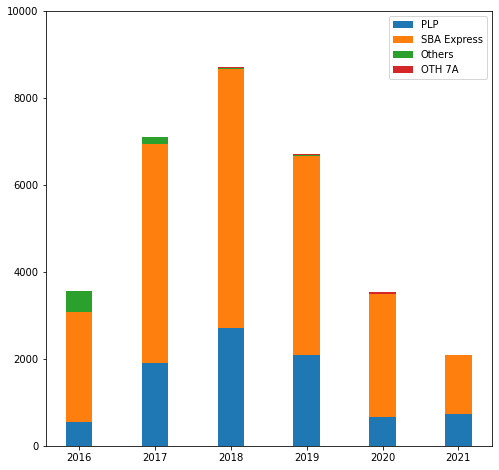

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,unq_del in enumerate(unique_delivery_method):
  # print(index, years, sup_secs_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, cumulative_approvals_by_year[index], width, bottom=temp_bottom_value, label = unq_del)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(cumulative_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(cumulative_approvals_by_year[index])

fig.set_size_inches(8, 8)
ax.set_ylim([0,1*1e4])
ax.legend()
plt.show()

In [ ]:
years = comparitive_data['ApprovalFiscalYear'].unique()
unique_sup_secs = comparitive_data['Supersector'].unique()
sup_secs_gross_approvals_by_year = []
for sup_sec in unique_sup_secs:
  temp = comparitive_data[comparitive_data['Supersector'] == sup_sec]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  sup_secs_gross_approvals_by_year.append(temp_list)
sup_secs_gross_approvals_by_year

[[73665920, 111674850, 158709418, 136978200, 68973400, 85867200],
 [84278300, 137974700, 143276800, 158462900, 91559300, 81193419],
 [68883800, 107829700, 120597100, 99844600, 65334900, 76346347],
 [9612500, 15314500, 17393400, 15041400, 5733300, 15257300],
 [41770700, 74834900, 123808500, 107431700, 43997300, 29589000],
 [48140400, 78512200, 90511500, 93040800, 48288400, 49631300],
 [8920800, 12656600, 14573600, 11907800, 5634200, 15214000],
 [83009600, 110918200, 138179400, 119439500, 80866938, 74876100],
 [81987235, 150288900, 133852800, 141447340, 95365500, 43037450],
 [32020000, 51735292, 60426600, 68669500, 23647300, 20095600],
 [62975000, 77310001, 98351050, 113446400, 87551700, 91312900],
 [37935000, 68907700, 94049650, 89867500, 82993500, 63290200],
 [4609100, 9920500, 4931100, 12165300, 2584700, 5310600],
 [37580000, 43707300, 57876600, 60650900, 44280966, 36664450],
 [7317200, 19211458, 14859100, 14574900, 8655500, 8019300],
 [23287600, 27036690, 38804900, 30194900, 21713700

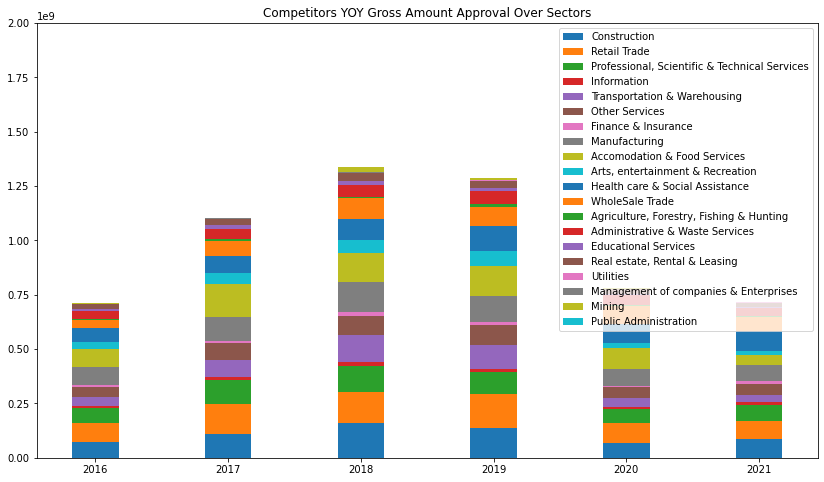

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,sup_sec in enumerate(unique_sup_secs):
  # print(index, years, sup_secs_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, sup_secs_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = sup_sec)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(sup_secs_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(sup_secs_gross_approvals_by_year[index])

fig.set_size_inches(14, 8)
ax.set_ylim([0,200*1e7])
ax.legend()
plt.title('Competitors YOY Gross Amount Approval Over Sectors')
plt.show()

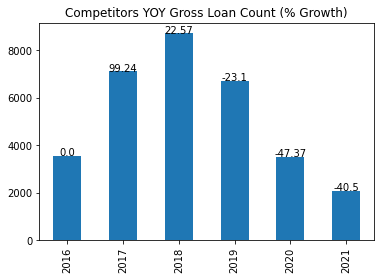

In [ ]:
data_by_year2=comparitive_data['ApprovalFiscalYear'].value_counts()
data_by_year_clean2=data_by_year2.sort_index().loc[2016:2021]
pct_growth2=data_by_year_clean2.pct_change()
data_by_year_clean2.plot(kind='bar')
labels2=pct_growth2.values
labels2[0]=0
plt.text(0,data_by_year_clean2[0],round(labels2[0]*100,2),ha='center',fontsize=10)
plt.text(1,data_by_year_clean2[1],round(labels2[1]*100,2),ha='center',fontsize=10)
plt.text(2,data_by_year_clean2[2],round(labels2[2]*100,2),ha='center',fontsize=10)
plt.text(3,data_by_year_clean2[3],round(labels2[3]*100,2),ha='center',fontsize=10)
plt.text(4,data_by_year_clean2[4],round(labels2[4]*100,2),ha='center',fontsize=10)
plt.text(5,data_by_year_clean2[5],round(labels2[5]*100,2),ha='center',fontsize=10)
plt.title('Competitors YOY Gross Loan Count (% Growth)')
#  plt.text(i, data_by_year_clean2[i], labels[i],ha='center',fontsize=10)
plt.show()

In [ ]:
regional_loan_data

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-06-30,7A,Amrani & Associates,8A Home Avenue,NATICK,MA,1760,"Leader Bank, National Association",180 Massachusetts Ave,ARLINGTON,MA,02474,30000,15000,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),3.99,48,532120.0,"Truck, Utility Trailer, and RV (Recreational V...",NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,5.0,INDIVIDUAL,PIF,2018-03-31,NaT,0,False,2,53,"Real estate, Rental & Leasing",0.50
1,2021-06-30,7A,"Radar Solutions International,",51 RIVERVIEW AVENUE,WALTHAM,MA,2453,"Leader Bank, National Association",180 Massachusetts Ave,ARLINGTON,MA,02474,65000,32500,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),3.99,48,541360.0,Geophysical Surveying and Mapping Services,NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,5.0,CORPORATION,PIF,2020-01-31,NaT,0,False,4,54,"Professional, Scientific & Technical Services",0.50
2,2021-06-30,7A,"Giovanni's Pizza & Roast Beef,",1427 TREMONT STREET,ROXBURY CROSSING,MA,2120,"Leader Bank, National Association",180 Massachusetts Ave,ARLINGTON,MA,02474,50000,25000,2015-12-31,2016,2016-02-01,SBA Express,FA$TRK (Small Loan Express),5.50,84,722511.0,Full-Service Restaurants,NaN,NaN,SUFFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,7.0,CORPORATION,EXEMPT,NaT,NaT,0,True,2,72,Accomodation & Food Services,0.50
3,2021-06-30,7A,Baljinder Kaur,14 Main Street,Johnson City,NY,13790,"NBT Bank, National Association",52 S Broad St,NORWICH,NY,13815,165000,123750,2015-12-31,2016,2016-02-01,Others,Lender Advantage Initiative,5.00,240,445120.0,Convenience Stores,NaN,NaN,BROOME,NY,SYRACUSE DISTRICT OFFICE,22.0,INDIVIDUAL,EXEMPT,NaT,NaT,0,False,5,44,Retail Trade,0.75
4,2021-06-30,7A,Roman Building Products Inc,1648 Winchester Road,Bensalem,PA,19020,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,250000,187500,2015-12-31,2016,2016-02-01,PLP,Guaranty,4.30,10,238990.0,All Other Specialty Trade Contractors,NaN,NaN,BUCKS,PA,PHILADELPHIA DISTRICT OFFICE,1.0,CORPORATION,PIF,2016-12-31,NaT,0,False,11,23,Construction,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65896,2021-06-30,7A,Falletta Masonry LLC,1455 SAINT GEORGE AVE,ROSELLE,NJ,7203,"Wilmington Savings Fund Society, FSB",500 Delaware Ave,WILMINGTON,DE,19801,564500,508050,2021-06-30,2021,NaT,PLP,Guaranty,6.00,300,238140.0,Masonry Contractors,NaN,NaN,UNION,NJ,NEW JERSEY DISTRICT OFFICE,10.0,CORPORATION,COMMIT,NaT,NaT,0,False,10,23,Construction,0.90
65897,2021-06-30,7A,PROGRESSIVE REAL ESTATE HOLDIN,95 GRANT ST,SALISBURY,PA,15558,"PNC Bank, National Association",222 Delaware Ave,WILMINGTON,DE,19801,243000,121500,2021-06-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),4.23,300,621210.0,Offices of Dentists,NaN,NaN,SOMERSET,PA,PITTSBURGH DISTRICT OFFICE,13.0,CORPORATION,COMMIT,NaT,NaT,0,False,54,62,Health care & Social Assistance,0.50
65898,2021-06-30,7A,"Malacream, Inc.",360 E South Street,Wilkes Barre,PA,18702,"Community Bank, National Association",45-49 Court St,CANTON,NY,13617,522000,469800,2021-06-30,2021,NaT,OTH 7A,Guaranty,3.75,240,722515.0,Snack and Nonalcoholic Beverage Bars,NaN,NaN,LUZERNE,PA,PHILADELPHIA DISTRICT OFFICE,8.0,CORPORATION,COMMIT,NaT,NaT,0,False,70,72,Accomodation & Food Services,0.90
65899,2021-06-30,7A,DSA Finishing Inc.,221 MAIN STREET,DANBURY,CT,6810,"Webster Bank, National Association",137 Bank St,WATERBURY,CT,06702,250000,187500,2021-06-30,20

In [ ]:
regional_loan_data['LoanStatus'].value_counts()

EXEMPT    43495
PIF       10031
CANCLD     7116
COMMIT     3916
CHGOFF     1342
Name: LoanStatus, dtype: int64

In [ ]:
regional_loan_data['Supersector'].unique()

array(['Real estate, Rental & Leasing',
       'Professional, Scientific & Technical Services',
       'Accomodation & Food Services', 'Retail Trade', 'Construction',
       'Finance & Insurance', 'Manufacturing', 'Other Services',
       'WholeSale Trade', 'Health care & Social Assistance',
       'Transportation & Warehousing', 'Information',
       'Administrative & Waste Services',
       'Arts, entertainment & Recreation', 'Educational Services',
       'Agriculture, Forestry, Fishing & Hunting',
       'Public Administration', 'Utilities',
       'Management of companies & Enterprises', 'Mining'], dtype=object)

In [ ]:
Bankname_list= ["TD Bank, National Association", "Manufacturers and Traders Trust Company", "Independence Bank", "Newtek Small Business Finance, Inc.", "Eastern Bank", "Santander Bank, National Association"]
required_data= regional_loan_data.loc[regional_loan_data['BankName'].isin(Bankname_list)]
required_data.reset_index(drop=True, inplace=True)
required_data

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-06-30,7A,Roman Building Products Inc,1648 Winchester Road,Bensalem,PA,19020,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,250000,187500,2015-12-31,2016,2016-02-01,PLP,Guaranty,4.30,10,238990.0,All Other Specialty Trade Contractors,NaN,NaN,BUCKS,PA,PHILADELPHIA DISTRICT OFFICE,1.0,CORPORATION,PIF,2016-12-31,NaT,0,False,11,23,Construction,0.75
1,2021-06-30,7A,BROAD SOUND CONSTRUCTION LLC,278 Poland Range Road,POWNAL,ME,4069,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,30300,15150,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),4.50,84,238350.0,Finish Carpentry Contractors,NaN,NaN,CUMBERLAND,ME,MAINE DISTRICT OFFICE,1.0,CORPORATION,PIF,2018-10-31,NaT,0,False,2,23,Construction,0.50
2,2021-06-30,7A,MichaelSegal,155R Sutherland Road,Brighton,MA,2135,Eastern Bank,265 Franklin St,BOSTON,MA,02110,25000,12500,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),10.00,60,442110.0,Furniture Stores,NaN,NaN,SUFFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,7.0,INDIVIDUAL,PIF,2019-01-31,NaT,0,False,0,44,Retail Trade,0.50
3,2021-06-30,7A,DESH ENTERPRISE INC,505 Washington Street,Dorchester,MA,2124,Eastern Bank,265 Franklin St,BOSTON,MA,02110,50000,25000,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),10.00,84,445120.0,Convenience Stores,NaN,NaN,SUFFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,8.0,CORPORATION,EXEMPT,NaT,NaT,0,True,0,44,Retail Trade,0.50
4,2021-06-30,7A,JMM TECHNOLOGIES LLC,800 4th Street SW Apt N615,WASHINGTON,DC,20024,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,30000,15000,2016-01-04,2016,2016-01-08,SBA Express,FA$TRK (Small Loan Express),8.00,84,541512.0,Computer Systems Design Services,NaN,NaN,DISTRICT OF COLUMBIA,DC,WASHINGTON DISTRICT OFFICE,0.0,CORPORATION,PIF,2018-07-31,NaT,0,True,2,54,"Professional, Scientific & Technical Services",0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32872,2021-06-30,7A,"Market Street Express, LLC",8128 MARKET ST,WILMINGTON,NC,28411,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,1750000,1575000,2021-06-30,2021,NaT,PLP,Guaranty,3.79,300,811198.0,All Other Automotive Repair and Maintenance,S0592,Express Oil Change/Tire Engine,NEW HANOVER,NC,NORTH CAROLINA DISTRICT OFFICE,7.0,CORPORATION,COMMIT,NaT,NaT,0,False,14,81,Other Services,0.90
32873,2021-06-30,7A,"The Farrells, Inc.",76 Viaduct Road,STAMFORD,CT,6902,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,500000,250000,2021-06-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),4.25,120,561730.0,Landscaping Services,S0989,Lawn Doctor,FAIRFIELD,CT,CONNECTICUT DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,True,41,56,Administrative & Waste Services,0.50
32874,2021-06-30,7A,"The Farrells, Inc.",76 Viaduct Road,STAMFORD,CT,6902,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,2020000,1818000,2021-06-30,2021,NaT,PLP,Guaranty,4.75,120,561730.0,Landscaping Services,S0989,Lawn Doctor,FAIRFIELD,CT,CONNECTICUT DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,False,41,56,Administrative & Waste Services,0.90
32875,2021-06-30,7A,JERAGARDENS WEDDING RENTALS LL,5842 S 1150 W,OGDEN,UT,84405,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,25000,18750,2021-06-30,2021,NaT,SBA Express,FA$TR

PPP Loans

In [ ]:
loan_kind= ['OTH 7A']
ppp_data= required_data.loc[required_data['DeliveryMethod'].isin(loan_kind)]
ppp_data.reset_index(drop=True, inplace=True)
ppp_data

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-06-30,7A,VETERANS GROUP LLC,30830 HEIPLE RD,ESTACADA,OR,97023,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,550000,412500,2016-01-12,2016,2016-02-01,OTH 7A,Contract Guaranty,4.00,30,336612.0,Boat Building,NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,4.0,CORPORATION,PIF,2018-08-31,NaT,0,True,28,33,Manufacturing,0.75
1,2021-06-30,7A,International Designs Corporat,3500 W. Hallandale Beach Blvd.,Pembroke Pines,FL,33023,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,3000000,2250000,2016-01-19,2016,2016-01-19,OTH 7A,Standard Asset Based,3.50,12,424310.0,"Piece Goods, Notions, and Other Dry Goods Merc...",NaN,NaN,BROWARD,FL,SOUTH FLORIDA DISTRICT OFFICE,24.0,CORPORATION,PIF,2017-02-28,NaT,0,True,40,42,WholeSale Trade,0.75
2,2021-06-30,7A,"ATI, Inc.",9200 Rumsey Road Ste 205,Columbia,MD,21045,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,490000,367500,2016-02-09,2016,2016-08-01,OTH 7A,Guaranty,4.95,120,541310.0,Architectural Services,NaN,NaN,HOWARD,MD,BALTIMORE DISTRICT OFFICE,3.0,CORPORATION,EXEMPT,NaT,NaT,0,False,39,54,"Professional, Scientific & Technical Services",0.75
3,2021-06-30,7A,"ATI, Inc.",9200 Rumsey Road Ste 205,COLUMBIA,MD,21045,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,300000,225000,2016-02-10,2016,2016-09-01,OTH 7A,Standard Asset Based,4.95,84,541310.0,Architectural Services,NaN,NaN,HOWARD,MD,BALTIMORE DISTRICT OFFICE,3.0,CORPORATION,PIF,2018-11-30,NaT,0,True,5,54,"Professional, Scientific & Technical Services",0.75
4,2021-06-30,7A,ERB Properties Holdings LLC,10139 Bacon Dr,BELTSVILLE,MD,20705,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,750000,562500,2016-02-25,2016,2016-05-01,OTH 7A,Guaranty,6.00,240,722513.0,Limited-Service Restaurants,NaN,NaN,PRINCE GEORGES,MD,WASHINGTON DISTRICT OFFICE,5.0,CORPORATION,PIF,2017-04-30,NaT,0,False,5,72,Accomodation & Food Services,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2021-06-30,7A,410 Center Street Limited Liab,70 Spring Valley Road,Paramus,NJ,7652,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,1713000,1541700,2021-04-06,2021,2021-04-19,OTH 7A,Guaranty,4.25,300,624410.0,Child Day Care Services,NaN,NaN,BERGEN,NJ,NEW JERSEY DISTRICT OFFICE,5.0,CORPORATION,EXEMPT,NaT,NaT,0,False,13,62,Health care & Social Assistance,0.90
129,2021-06-30,7A,"Everwell Parts, Inc.",10914 NW 33rd St. Suite 100,DORAL,FL,33172,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,1000000,900000,2021-04-26,2021,2021-04-29,OTH 7A,Standard Asset Based,2.75,24,423730.0,Warm Air Heating and Air-Conditioning Equipmen...,NaN,NaN,MIAMI-DADE,FL,SOUTH FLORIDA DISTRICT OFFICE,25.0,CORPORATION,EXEMPT,NaT,NaT,0,False,1,42,WholeSale Trade,0.90
130,2021-06-30,7A,"Upstate Supermarket, Inc.",23 Fennec Lane,East Amherst,NY,14051,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,990000,891000,2021-05-17,2021,NaT,OTH 7A,Guaranty,4.00,120,445110.0,Supermarkets and Other Grocery (except Conveni...,S1462,SAVE-A-LOT FOOD STORES,ERIE,NY,BUFFALO DISTRICT OFFICE,26.0,CORPORATION,COMMIT,NaT,NaT,0,False,67,44,Retail Trade,0.90
131,2021-06-30,7A,"T.F. Retay, LLC",29000 INFORMATION LN STE 502,EASTON,MD,21601,Manufacturers and Traders Trust Com

In [ ]:
years = ppp_data['ApprovalFiscalYear'].unique()
unique_bank_names = ppp_data['BankName'].unique()
bank_name_ppp_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = ppp_data[ppp_data['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['DeliveryMethod'].count())
  bank_name_ppp_approvals_by_year.append(temp_list)
bank_name_ppp_approvals_by_year

[[1, 0, 1, 1, 0, 0],
 [2, 4, 11, 7, 6, 6],
 [13, 9, 10, 7, 12, 6],
 [2, 1, 2, 3, 3, 1],
 [1, 2, 1, 0, 0, 0],
 [0, 2, 0, 9, 10, 0]]

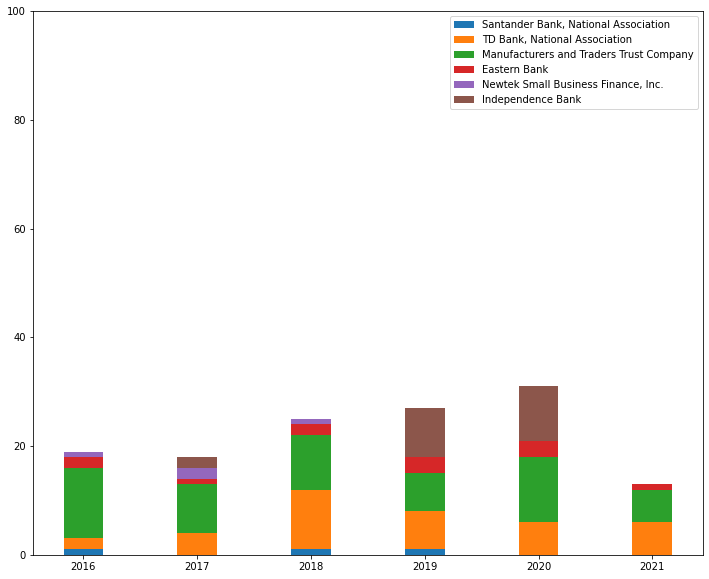

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_ppp_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_ppp_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_ppp_approvals_by_year[index])

fig.set_size_inches(12, 10)
ax.set_ylim([0,1*1e2])
ax.legend()
plt.show()

In [ ]:
years = ppp_data['ApprovalFiscalYear'].unique()
unique_bank_names = ppp_data['BankName'].unique()
bank_name_ppp_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = ppp_data[ppp_data['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_ppp_approvals_by_year.append(temp_list)
bank_name_ppp_approvals_by_year

[[550000, 0, 950000, 450000, 0, 0],
 [4400000, 3518000, 21139000, 9056000, 12361000, 14394800],
 [7990800, 5263700, 10053800, 3740500, 10677700, 8722500],
 [1250000, 1000000, 1350000, 1450000, 800000, 540000],
 [1530000, 6684100, 1124800, 0, 0, 0],
 [0, 170000, 0, 1250000, 1375000, 0]]

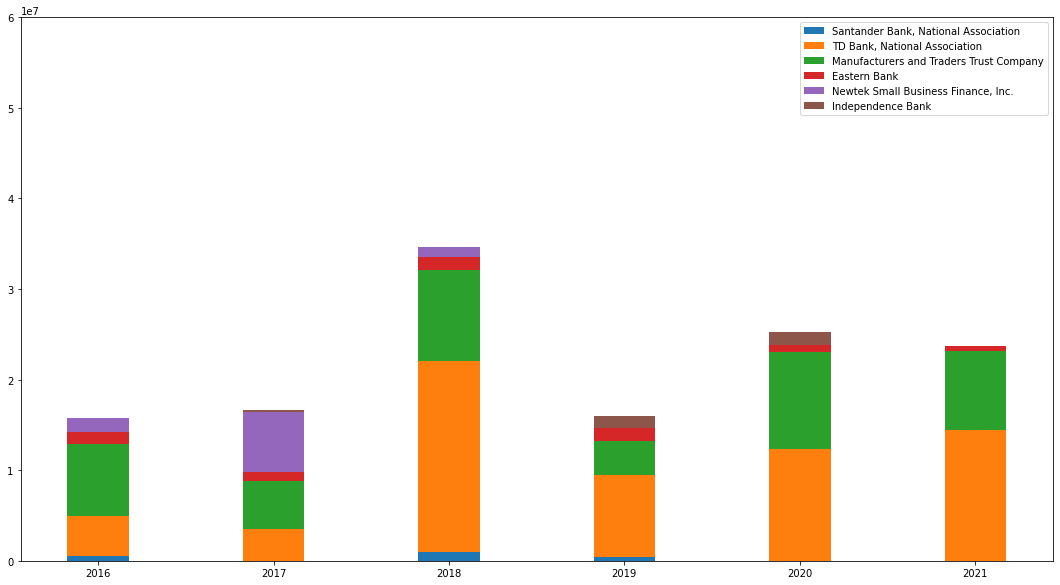

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_ppp_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_ppp_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_ppp_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,6*1e7])
ax.legend()
plt.show()

Trend Visualization over industry  for Top 10

In [ ]:
industry1_df= required_data[required_data['Supersector'] == 'Accomodation & Food Services']
industry1_df.reset_index(drop=True, inplace=True)
industry1_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-09-30,7A,"WILDFLOUR BAKERY & CAFE, LLC",5137 Clareton,AGOURA HILLS,CA,91301,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,250000,187500,2016-01-05,2016,2016-01-05,PLP,Guaranty,6.25,120,722310.0,Food Service Contractors,NaN,NaN,LOS ANGELES,CA,LOS ANGELES DISTRICT OFFICE,26.0,CORPORATION,EXEMPT,NaT,NaT,0,False,43,72,Accomodation & Food Services,0.75
1,2021-09-30,7A,S & C Property LLC,12 So Main Street Units 1A and,PENNINGTON,NJ,8534,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,750000,562500,2016-01-06,2016,2016-01-06,PLP,Guaranty,5.75,300,722511.0,Full-Service Restaurants,NaN,NaN,MERCER,NJ,NEW JERSEY DISTRICT OFFICE,12.0,CORPORATION,EXEMPT,NaT,NaT,0,False,15,72,Accomodation & Food Services,0.75
2,2021-09-30,7A,"WATER STREET DELI, LLC",82 Water Street,BOSTON,MA,2109,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,110000,55000,2016-01-06,2016,2016-01-06,SBA Express,FA$TRK (Small Loan Express),7.50,107,722513.0,Limited-Service Restaurants,NaN,NaN,SUFFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,8.0,CORPORATION,EXEMPT,NaT,NaT,0,False,0,72,Accomodation & Food Services,0.50
3,2021-09-30,7A,Six Lounge LLC,2100 Frederick Douglass Blvd,NEW YORK,NY,10026,Independence Bank,1370 S County Trl,EAST GREENWICH,RI,2818,150000,127500,2016-01-12,2016,2016-01-12,Others,Lender Advantage Initiative,6.25,89,722511.0,Full-Service Restaurants,NaN,NaN,NEW YORK,NY,NEW YORK DISTRICT OFFICE,13.0,CORPORATION,CHGOFF,NaT,2019-02-07,128608,False,16,72,Accomodation & Food Services,0.85
4,2021-09-30,7A,"SPARTAN PIZZA & RESTAURANT, IN",990 Chase Parkway,WATERBURY,CT,6708,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,50000,25000,2016-01-15,2016,2016-01-15,SBA Express,FA$TRK (Small Loan Express),7.00,60,722511.0,Full-Service Restaurants,NaN,NaN,NEW HAVEN,CT,CONNECTICUT DISTRICT OFFICE,3.0,CORPORATION,PIF,2021-03-31,NaT,0,False,30,72,Accomodation & Food Services,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3455,2021-09-30,7A,"Harvest Enterprise, Inc.",38 Eastdale Ave,POUGHKEEPSIE,NY,12603,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,1170000,1053000,2021-09-29,2021,NaT,PLP,Guaranty,5.00,126,722511.0,Full-Service Restaurants,NaN,NaN,DUTCHESS,NY,NEW YORK DISTRICT OFFICE,18.0,CORPORATION,COMMIT,NaT,NaT,0,False,20,72,Accomodation & Food Services,0.90
3456,2021-09-30,7A,Harlem The Row Corp.,2374 Adam Clayton Powell Jr,NEW YORK,NY,10030,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,50000,37500,2021-09-29,2021,NaT,SBA Express,FA$TRK (Small Loan Express),9.75,120,722511.0,Full-Service Restaurants,NaN,NaN,NEW YORK,NY,NEW YORK DISTRICT OFFICE,13.0,CORPORATION,COMMIT,NaT,NaT,0,True,0,72,Accomodation & Food Services,0.75
3457,2021-09-30,7A,La Mixtequita Poblana,2852 N Hancock St,PHILADELPHIA,PA,19133,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,4500,3375,2021-09-29,2021,NaT,SBA Express,FA$TRK (Small Loan Express),9.75,120,722330.0,Mobile Food Services,NaN,NaN,PHILADELPHIA,PA,PHILADELPHIA DISTRICT OFFICE,2.0,INDIVIDUAL,COMMIT,NaT,NaT,0,True,1,72,Accomodation & Food Services,0.75
3458,2021-09-30,7A,La Mixtequita Poblana,2852 N Hancock St,PHILADELPHIA,PA,19133,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,4500,3375,2021-09-29,2021,Na

In [ ]:
years = industry1_df['ApprovalFiscalYear'].unique()
unique_bank_names = industry1_df['BankName'].unique()
bank_name_gross_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = industry1_df[industry1_df['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_gross_approvals_by_year.append(temp_list)
bank_name_gross_approvals_by_year


[[35518900, 55321100, 58338100, 87006640, 57248100, 84697910],
 [16436935, 45096700, 30555100, 19343800, 13479000, 14867900],
 [5136300, 6271800, 13549800, 8529600, 5183300, 0],
 [3245000, 9670000, 11605000, 7950000, 0, 0],
 [23580100, 33658800, 26227700, 19489300, 17609400, 15278100],
 [3206300, 6692300, 7948900, 7657600, 7029000, 2282000]]

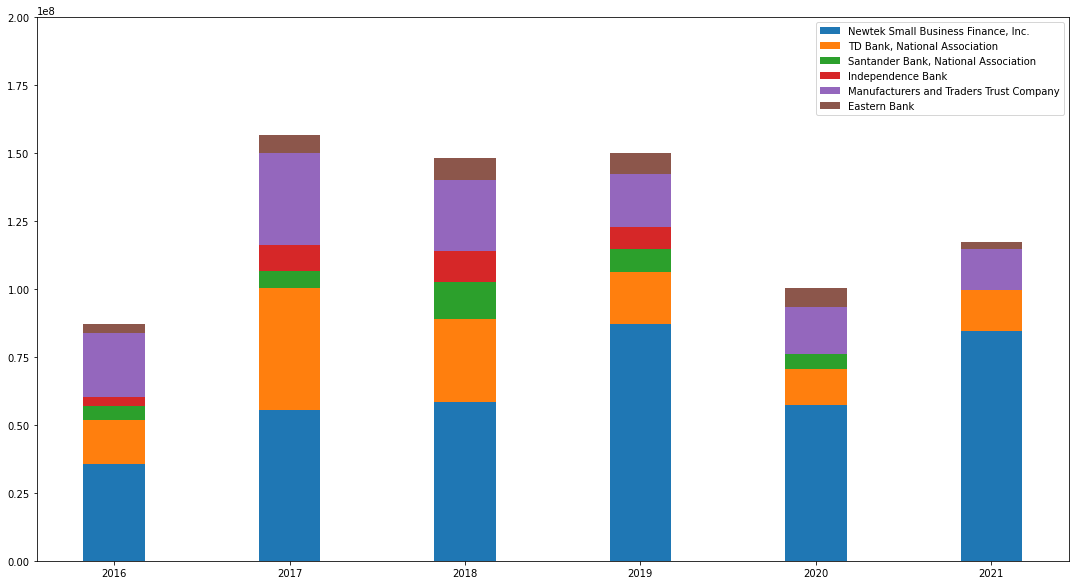

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_gross_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,2*1e8])
ax.legend()
plt.show()

In [ ]:
industry2_df= required_data[required_data['Supersector'] == 'Professional, Scientific & Technical Services']
industry2_df.reset_index(drop=True, inplace=True)
industry2_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-09-30,7A,JMM TECHNOLOGIES LLC,800 4th Street SW Apt N615,WASHINGTON,DC,20024,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,30000,15000,2016-01-04,2016,2016-01-08,SBA Express,FA$TRK (Small Loan Express),8.00,84,541512.0,Computer Systems Design Services,NaN,NaN,DISTRICT OF COLUMBIA,DC,WASHINGTON DISTRICT OFFICE,0.0,CORPORATION,PIF,2018-07-31,NaT,0,True,2,54,"Professional, Scientific & Technical Services",0.50
1,2021-09-30,7A,Entmatrix Inc.,8585 BALTIMORE NATIONAL PIKE S,Ellicott City,MD,21043,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,250000,125000,2016-01-04,2016,2016-03-01,SBA Express,FA$TRK (Small Loan Express),9.75,84,541511.0,Custom Computer Programming Services,NaN,NaN,HOWARD,MD,BALTIMORE DISTRICT OFFICE,2.0,CORPORATION,PIF,2019-10-31,NaT,0,True,10,54,"Professional, Scientific & Technical Services",0.50
2,2021-09-30,7A,S&R Engineers PC.,5 Commerce Way Suite 208,TRENTON,NJ,8691,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,1485000,1113750,2016-01-04,2016,NaT,PLP,Guaranty,5.75,120,541330.0,Engineering Services,NaN,NaN,MERCER,NJ,NEW JERSEY DISTRICT OFFICE,4.0,CORPORATION,CANCLD,NaT,NaT,0,False,30,54,"Professional, Scientific & Technical Services",0.75
3,2021-09-30,7A,Bicallis LLC,714 South Wolfe Street #38178,Baltimore,MD,21224,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,100000,50000,2016-01-04,2016,2016-01-04,SBA Express,FA$TRK (Small Loan Express),7.00,84,541990.0,"All Other Professional, Scientific, and Techni...",NaN,NaN,BALTIMORE CITY,MD,BALTIMORE DISTRICT OFFICE,2.0,CORPORATION,EXEMPT,NaT,NaT,0,False,50,54,"Professional, Scientific & Technical Services",0.50
4,2021-09-30,7A,MICHAEL SMITH BUSINESS DEVELOP,1818 Library Street,RESTON,VA,20190,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,25000,12500,2016-01-05,2016,NaT,SBA Express,FA$TRK (Small Loan Express),6.00,84,541820.0,Public Relations Agencies,NaN,NaN,FAIRFAX,VA,WASHINGTON DISTRICT OFFICE,10.0,CORPORATION,EXEMPT,NaT,NaT,0,True,5,54,"Professional, Scientific & Technical Services",0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3959,2021-09-30,7A,LIBERTY SQUARE GROUP INC,4 LIBERTY SQUARE 5TH FL,BOSTON,MA,2109,Eastern Bank,265 Franklin St,BOSTON,MA,2110,50000,37500,2021-09-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),6.74,60,541990.0,"All Other Professional, Scientific, and Techni...",NaN,NaN,SUFFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,8.0,CORPORATION,COMMIT,NaT,NaT,0,False,0,54,"Professional, Scientific & Technical Services",0.75
3960,2021-09-30,7A,"Craimark Studios, Inc",6950 Philips Hwy,JACKSONVILLE,FL,32216,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,61300,30650,2021-09-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),3.65,60,541613.0,Marketing Consulting Services,NaN,NaN,DUVAL,FL,NORTH FLORIDA DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,False,0,54,"Professional, Scientific & Technical Services",0.50
3961,2021-09-30,7A,"Mattiacci Law, LLC",816 Loveland Rd,MOORESTOWN,NJ,8057,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,35000,26250,2021-09-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),9.05,120,541110.0,Offices of Lawyers,NaN,NaN,BURLINGTON,NJ,NEW JERSEY DISTRICT OFFICE,1.0,CORPORATION,COMMIT,NaT,NaT,0,True,3,54,"Profession

In [ ]:
years = industry2_df['ApprovalFiscalYear'].unique()
unique_bank_names = industry2_df['BankName'].unique()
bank_name_gross_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = industry2_df[industry2_df['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_gross_approvals_by_year.append(temp_list)
bank_name_gross_approvals_by_year

[[26891800, 24795600, 35942600, 26065200, 20092700, 26622500],
 [22323500, 24626700, 20223300, 18270900, 20104100, 19532900],
 [4736500, 8091400, 6461700, 8406400, 5361600, 7726600],
 [3925000, 17328200, 19290000, 14880000, 150000, 0],
 [11027000, 33287800, 38764500, 32512100, 19826500, 88355047],
 [1956000, 1977000, 1194000, 4331800, 2453800, 0]]

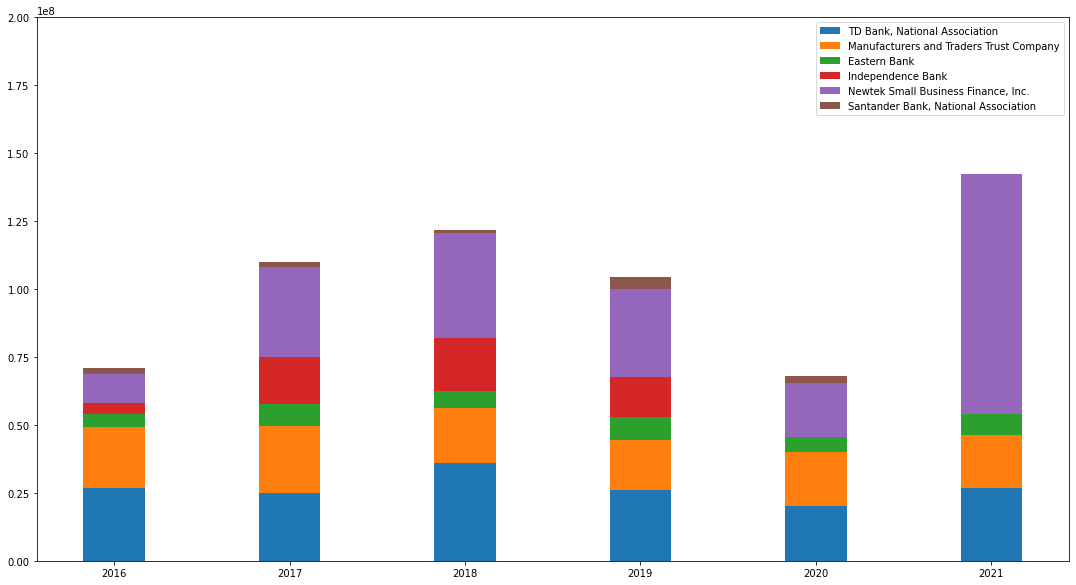

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_gross_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,20*1e7])
ax.legend()
plt.show()

In [ ]:
industry3_df= required_data[required_data['Supersector'] == 'Administrative & Waste Services']
industry3_df.reset_index(drop=True, inplace=True)
industry3_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-09-30,7A,DENOG PROTECTIVE SECURITY SERV,2303 Hughes Avenue Apt 3,BRONX,NY,10458,Independence Bank,1370 S County Trl,EAST GREENWICH,RI,2818,150000,127500,2016-01-12,2016,2016-01-12,Others,Lender Advantage Initiative,6.25,120,561612.0,Security Guards and Patrol Services,NaN,NaN,BRONX,NY,NEW YORK DISTRICT OFFICE,13.0,CORPORATION,EXEMPT,NaT,NaT,0,False,30,56,Administrative & Waste Services,0.85
1,2021-09-30,7A,PREMIER WINDOW CLEANING LLC,356 GEORGIA COURT,SEWELL,NJ,8080,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,100000,50000,2016-01-13,2016,2016-09-01,SBA Express,FA$TRK (Small Loan Express),7.00,84,561720.0,Janitorial Services,NaN,NaN,GLOUCESTER,NJ,NEW JERSEY DISTRICT OFFICE,1.0,CORPORATION,EXEMPT,NaT,NaT,0,True,0,56,Administrative & Waste Services,0.50
2,2021-09-30,7A,Plant Designs Inc.,739 Linden Ave,Rochester,NY,14625,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,250000,225000,2016-01-15,2016,NaT,Others,FA$TRK (Small Loan Express),4.55,84,561730.0,Landscaping Services,NaN,NaN,MONROE,NY,ROCHESTER BRANCH OFFICE,25.0,CORPORATION,EXEMPT,NaT,NaT,0,True,0,56,Administrative & Waste Services,0.90
3,2021-09-30,7A,NESS LLC,6755 Applemint Lane,Alexandria,VA,22310,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,25000,12500,2016-01-15,2016,2017-06-30,SBA Express,FA$TRK (Small Loan Express),5.75,84,561740.0,Carpet and Upholstery Cleaning Services,10094,ADVANTACLEAN,FAIRFAX,VA,WASHINGTON DISTRICT OFFICE,8.0,CORPORATION,EXEMPT,NaT,NaT,0,True,2,56,Administrative & Waste Services,0.50
4,2021-09-30,7A,NESS LLC,6755 Applemint Lane,Alexandria,VA,22310,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,150000,75000,2016-01-15,2016,2016-02-01,SBA Express,FA$TRK (Small Loan Express),5.90,120,561740.0,Carpet and Upholstery Cleaning Services,10094,ADVANTACLEAN,FAIRFAX,VA,WASHINGTON DISTRICT OFFICE,8.0,CORPORATION,PIF,2021-05-31,NaT,0,False,2,56,Administrative & Waste Services,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,2021-09-30,7A,JAANK RESTORATIONS LIMITED LIA,29 mekeel drive,SUCCASUNNA,NJ,7876,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,355000,177500,2021-09-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),4.50,120,562910.0,Remediation Services,S1555,Servpro,MORRIS,NJ,NEW JERSEY DISTRICT OFFICE,7.0,CORPORATION,COMMIT,NaT,NaT,0,False,3,56,Administrative & Waste Services,0.50
2308,2021-09-30,7A,YF Productions,2 King Ter,SPRING VALLEY,NY,10977,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,100000,75000,2021-09-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),7.75,120,561920.0,Convention and Trade Show Organizers,NaN,NaN,ROCKLAND,NY,NEW YORK DISTRICT OFFICE,17.0,CORPORATION,COMMIT,NaT,NaT,0,True,0,56,Administrative & Waste Services,0.75
2309,2021-09-30,7A,"Starlight Security Consulting,",7401 Vandenberg Ct,LANHAM,MD,20706,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,2250000,1687500,2021-09-30,2021,NaT,PLP,Guaranty,6.00,300,561612.0,Security Guards and Patrol Services,NaN,NaN,PRINCE GEORGES,MD,WASHINGTON DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,False,26,56,Administrative & Waste Services,0.75
2310,2021-09-30,7A,LANDMARK BIRD CONTROL,100 Enterprise Drive,ROCKAWAY,NJ,7866,"TD Bank, National Ass

In [ ]:
years = industry3_df['ApprovalFiscalYear'].unique()
unique_bank_names = industry3_df['BankName'].unique()
bank_name_gross_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = industry3_df[industry3_df['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_gross_approvals_by_year.append(temp_list)
bank_name_gross_approvals_by_year

[[1500000, 8500000, 14160000, 9875000, 150000, 0],
 [11433200, 15580200, 14318600, 15189300, 12306966, 13791750],
 [9298100, 8694700, 7260700, 7050600, 5565800, 12563100],
 [2482700, 5938200, 3113800, 3423700, 2226200, 2083700],
 [12876000, 4994200, 19051500, 25012300, 24032000, 42891000],
 [35000, 678000, 3116000, 1226500, 528000, 0]]

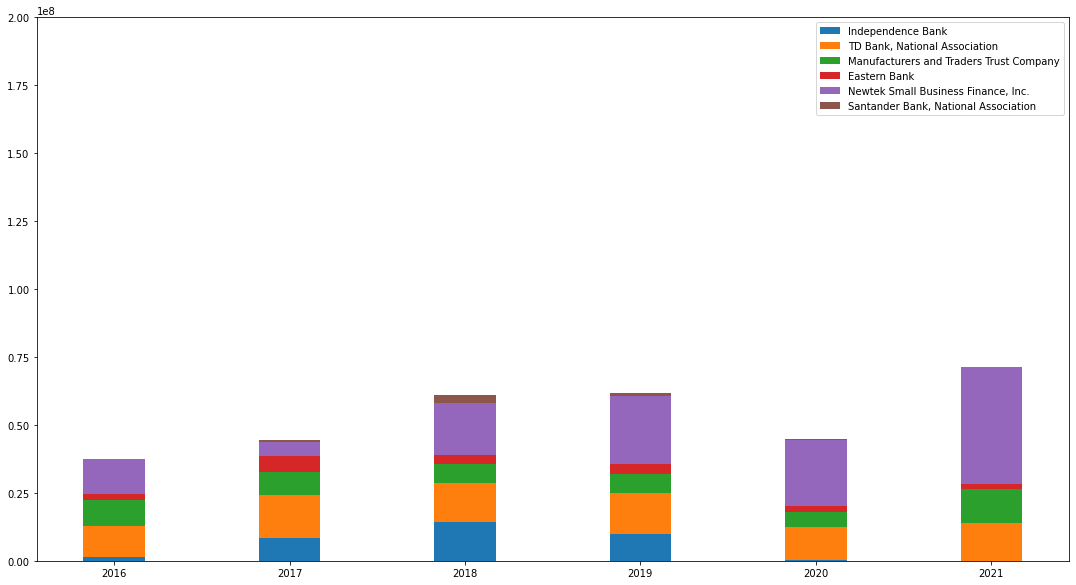

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_gross_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,20*1e7])
ax.legend()
plt.show()

In [ ]:
industry4_df= required_data[required_data['Supersector'] == 'Retail Trade']
industry4_df.reset_index(drop=True, inplace=True)
industry4_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-09-30,7A,MichaelSegal,155R Sutherland Road,Brighton,MA,2135,Eastern Bank,265 Franklin St,BOSTON,MA,2110,25000,12500,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),10.00,60,442110.0,Furniture Stores,NaN,NaN,SUFFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,7.0,INDIVIDUAL,PIF,2019-01-31,NaT,0,False,0,44,Retail Trade,0.50
1,2021-09-30,7A,DESH ENTERPRISE INC,505 Washington Street,Dorchester,MA,2124,Eastern Bank,265 Franklin St,BOSTON,MA,2110,50000,25000,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),10.00,84,445120.0,Convenience Stores,NaN,NaN,SUFFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,7.0,CORPORATION,EXEMPT,NaT,NaT,0,True,0,44,Retail Trade,0.50
2,2021-09-30,7A,DYNAPRO DIRECT LLC,118 DUDA LANE,MATAWAN,NJ,7747,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,250000,125000,2016-01-04,2016,2016-10-01,SBA Express,FA$TRK (Small Loan Express),5.00,84,454111.0,Electronic Shopping,NaN,NaN,MONMOUTH,NJ,NEW JERSEY DISTRICT OFFICE,4.0,CORPORATION,EXEMPT,NaT,NaT,0,True,0,45,Retail Trade,0.50
3,2021-09-30,7A,Nautical Winegirls LLC,2400 Boston Street Suite 112,BALTIMORE,MD,21224,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,340000,255000,2016-01-05,2016,2016-01-05,Others,Lender Advantage Initiative,5.50,84,445310.0,"Beer, Wine, and Liquor Stores",NaN,NaN,BALTIMORE CITY,MD,BALTIMORE DISTRICT OFFICE,2.0,CORPORATION,EXEMPT,NaT,NaT,0,False,3,44,Retail Trade,0.75
4,2021-09-30,7A,4ORTY BRIDGE LLC,4403 MAIN STREET,WAITSFIELD,VT,5673,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,25000,12500,2016-01-05,2016,2016-01-05,SBA Express,FA$TRK (Small Loan Express),7.00,84,448120.0,Women's Clothing Stores,NaN,NaN,WASHINGTON,VT,VERMONT DISTRICT OFFICE,0.0,CORPORATION,PIF,2020-07-31,NaT,0,True,0,44,Retail Trade,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4385,2021-09-30,7A,Bully Pigs LLC,233 Church St,PHILADELPHIA,PA,19106,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,357000,321300,2021-09-29,2021,NaT,PLP,Guaranty,4.25,300,453991.0,Tobacco Stores,NaN,NaN,PHILADELPHIA,PA,PHILADELPHIA DISTRICT OFFICE,2.0,CORPORATION,COMMIT,NaT,NaT,0,False,4,45,Retail Trade,0.90
4386,2021-09-30,7A,Musicnaire,14855 Memorial Dr,HOUSTON,TX,77079,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,52500,39375,2021-09-30,2021,NaT,PLP,Guaranty,6.00,119,454110.0,Electronic Shopping and Mail-Order Houses,NaN,NaN,HARRIS,TX,HOUSTON DISTRICT OFFICE,2.0,CORPORATION,COMMIT,NaT,NaT,0,False,5,45,Retail Trade,0.75
4387,2021-09-30,7A,Shri Gurukrupa LLC,231 Stadium St,SMYRNA,DE,19977,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,10000,5000,2021-09-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),5.50,120,453998.0,All Other Miscellaneous Store Retailers (excep...,S1788,The UPS Store,KENT,DE,DELAWARE DISTRICT OFFICE,0.0,CORPORATION,COMMIT,NaT,NaT,0,False,2,45,Retail Trade,0.50
4388,2021-09-30,7A,Shirt World,718 Boardwalk,OCEAN CITY,NJ,8226,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,25000,18750,2021-09-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),9.75,120,448140.0,Family Clothing Stores,NaN,NaN,CAPE MAY,NJ,NEW JERSEY DISTRICT OFFICE,2.0,CORPORATION,COMMIT,NaT,NaT,0,True,2,44,Retail Trade,0.75


In [ ]:
years = industry4_df['ApprovalFiscalYear'].unique()
unique_bank_names = industry4_df['BankName'].unique()
bank_name_gross_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = industry4_df[industry4_df['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_gross_approvals_by_year.append(temp_list)
bank_name_gross_approvals_by_year

[[3476800, 5519800, 6642000, 4352600, 7433900, 2049900],
 [15250500, 35047900, 37798100, 43425600, 24734700, 57132119],
 [17252000, 18269000, 17242400, 22272000, 23029600, 29419900],
 [3405900, 4933400, 8615100, 7712400, 1935500, 380000],
 [4850000, 20740500, 23900000, 17275000, 0, 0],
 [43449000, 58247500, 57234300, 71217700, 36411100, 107558400]]

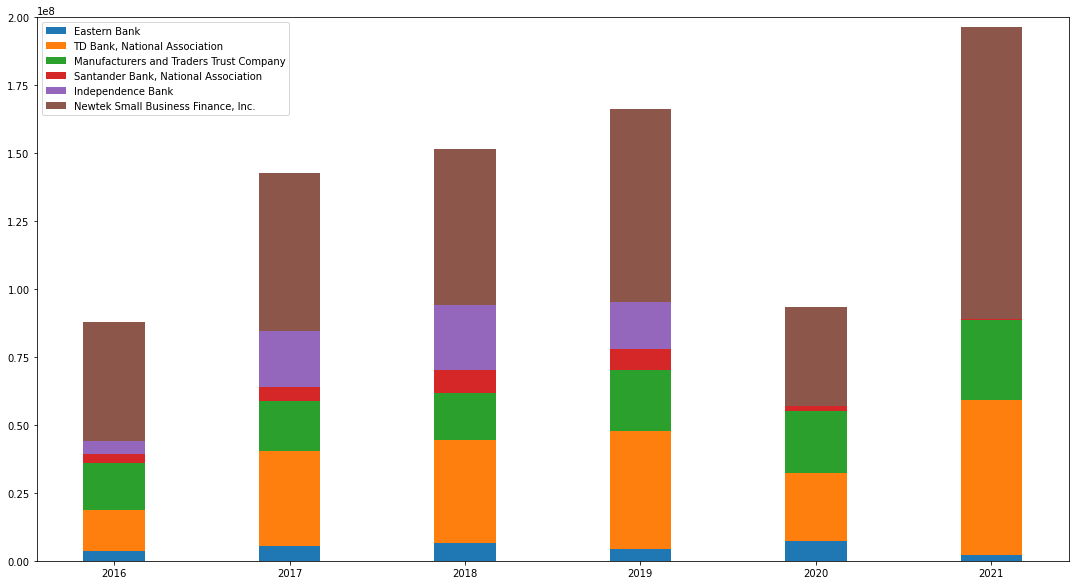

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_gross_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,20*1e7])
ax.legend()
plt.show()

In [ ]:
industry5_df= required_data[required_data['Supersector'] == 'Construction']
industry5_df.reset_index(drop=True, inplace=True)
industry5_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-09-30,7A,Roman Building Products Inc,1648 Winchester Road,Bensalem,PA,19020,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,250000,187500,2015-12-31,2016,2016-02-01,PLP,Guaranty,4.30,10,238990.0,All Other Specialty Trade Contractors,NaN,NaN,BUCKS,PA,PHILADELPHIA DISTRICT OFFICE,1.0,CORPORATION,PIF,2016-12-31,NaT,0,False,11,23,Construction,0.75
1,2021-09-30,7A,BROAD SOUND CONSTRUCTION LLC,278 Poland Range Road,POWNAL,ME,4069,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,30300,15150,2015-12-31,2016,2016-01-01,SBA Express,FA$TRK (Small Loan Express),4.50,84,238350.0,Finish Carpentry Contractors,NaN,NaN,CUMBERLAND,ME,MAINE DISTRICT OFFICE,1.0,CORPORATION,PIF,2018-10-31,NaT,0,False,2,23,Construction,0.50
2,2021-09-30,7A,MICHAEL JAMES CONTRACTING AND,751 BELVOIR ROAD,PLYMOUTH MEETING,PA,19462,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,30000,15000,2016-01-05,2016,2016-01-05,SBA Express,FA$TRK (Small Loan Express),6.00,84,236118.0,Residential Remodelers,NaN,NaN,MONTGOMERY,PA,PHILADELPHIA DISTRICT OFFICE,4.0,CORPORATION,PIF,2019-09-30,NaT,0,True,0,23,Construction,0.50
3,2021-09-30,7A,GPA MECHANICAL PIPING OF NEW Y,60 Ralph Ave,COPIAGUE,NY,11726,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,775000,581250,2016-01-05,2016,NaT,PLP,Guaranty,6.25,300,238220.0,"Plumbing, Heating, and Air-Conditioning Contra...",NaN,NaN,SUFFOLK,NY,MELVILLE BRANCH OFFICE,2.0,CORPORATION,CANCLD,NaT,NaT,0,False,12,23,Construction,0.75
4,2021-09-30,7A,Color Craft Corporation,92 Washington St,Peabody,MA,1960,Eastern Bank,265 Franklin St,BOSTON,MA,2110,50000,25000,2016-01-05,2016,2016-01-05,SBA Express,FA$TRK (Small Loan Express),8.00,60,238990.0,All Other Specialty Trade Contractors,NaN,NaN,ESSEX,MA,MASSACHUSETTS DISTRICT OFFICE,6.0,CORPORATION,PIF,2018-04-30,NaT,0,False,3,23,Construction,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5504,2021-09-30,7A,30 Clipper Road Associates LLC,30 CLIPPER RD,CONSHOHOCKEN,PA,19428,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,1544000,1158000,2021-09-30,2021,NaT,PLP,Guaranty,4.25,300,236118.0,Residential Remodelers,NaN,NaN,MONTGOMERY,PA,PHILADELPHIA DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,False,5,23,Construction,0.75
5505,2021-09-30,7A,Absolute Precision Chimney Ser,1730-1732 Main Street,PLEASANT VALLEY,NY,12569,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,590000,442500,2021-09-30,2021,NaT,PLP,Guaranty,3.55,300,238990.0,All Other Specialty Trade Contractors,NaN,NaN,DUTCHESS,NY,NEW YORK DISTRICT OFFICE,18.0,CORPORATION,COMMIT,NaT,NaT,0,False,7,23,Construction,0.75
5506,2021-09-30,7A,Preserved Builders LLC,5742 Bassett Pl,SANFORD,FL,32771,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,25000,18750,2021-09-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),9.75,120,236115.0,New Single-Family Housing Construction (except...,NaN,NaN,SEMINOLE,FL,NORTH FLORIDA DISTRICT OFFICE,7.0,CORPORATION,COMMIT,NaT,NaT,0,True,3,23,Construction,0.75
5507,2021-09-30,7A,"RDA HOUSING SOLUTIONS, LLC",1440 CORAL RIDGE DR,CORAL SPRINGS,FL,33071,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,100000,75000,2021-09-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),7.75,120,236115.0,New Single-Family Housing C

In [ ]:
years = industry5_df['ApprovalFiscalYear'].unique()
unique_bank_names = industry5_df['BankName'].unique()
bank_name_gross_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = industry5_df[industry5_df['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_gross_approvals_by_year.append(temp_list)
bank_name_gross_approvals_by_year

[[21909420, 15294700, 20255500, 17160200, 15633100, 31417500],
 [16807700, 44395650, 53938918, 35573400, 23854300, 45589800],
 [19411200, 23032100, 43222800, 51009500, 24338200, 84961100],
 [11182600, 11172400, 7677200, 7347100, 4879300, 8559500],
 [2879000, 3139700, 2649500, 5483800, 2244100, 0],
 [4355000, 17865000, 33690000, 26205000, 725000, 0]]

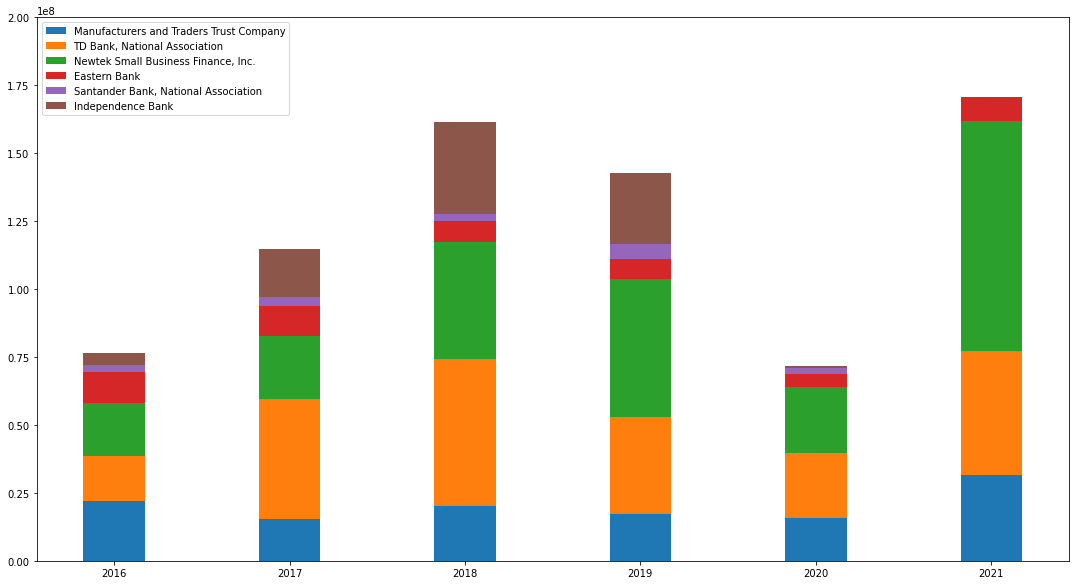

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_gross_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,20*1e7])
ax.legend()
plt.show()

In [ ]:
industry6_df= required_data[required_data['Supersector'] == 'Transportation & Warehousing']
industry6_df.reset_index(drop=True, inplace=True)
industry6_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-09-30,7A,Jemcon,10718 258th Avenue East,BUCKLEY,WA,98321,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,80000,68000,2016-01-04,2016,NaT,PLP,Guaranty,6.25,120,484220.0,Specialized Freight (except Used Goods) Trucki...,NaN,NaN,PIERCE,WA,SEATTLE DISTRICT OFFICE,8.0,INDIVIDUAL,CANCLD,NaT,NaT,0,False,1,48,Transportation & Warehousing,0.85
1,2021-09-30,7A,San Antonio Broker Services In,2500 83rd Street Building 12,NORTH BERGEN,NJ,7047,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,350000,175000,2016-01-07,2016,2016-07-01,SBA Express,FA$TRK (Small Loan Express),7.25,84,484110.0,"General Freight Trucking, Local",NaN,NaN,HUDSON,NJ,NEW JERSEY DISTRICT OFFICE,8.0,CORPORATION,PIF,2017-04-30,NaT,0,True,20,48,Transportation & Warehousing,0.50
2,2021-09-30,7A,MAYTAV BUS COMPANY,1101 Orthodox ST.,Philadelphia,PA,19124,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,75000,37500,2016-01-08,2016,2016-02-01,SBA Express,FA$TRK (Small Loan Express),8.00,84,485410.0,School and Employee Bus Transportation,NaN,NaN,PHILADELPHIA,PA,PHILADELPHIA DISTRICT OFFICE,2.0,CORPORATION,PIF,2020-03-31,NaT,0,True,4,48,Transportation & Warehousing,0.50
3,2021-09-30,7A,"FALLON MOVING & STORAGE, INC.","800 Marshall Phelps, RD",WINDSOR,CT,6095,Independence Bank,1370 S County Trl,EAST GREENWICH,RI,2818,150000,127500,2016-01-08,2016,2016-01-08,Others,Lender Advantage Initiative,6.25,120,493110.0,General Warehousing and Storage,NaN,NaN,HARTFORD,CT,CONNECTICUT DISTRICT OFFICE,1.0,CORPORATION,EXEMPT,NaT,NaT,0,False,12,49,Transportation & Warehousing,0.85
4,2021-09-30,7A,Cambridge Transportation Servi,103 Fulkerson Street,Cambridge,MA,2141,Eastern Bank,265 Franklin St,BOSTON,MA,2110,50000,25000,2016-01-11,2016,2016-02-01,SBA Express,FA$TRK (Small Loan Express),10.00,84,485310.0,Taxi Service,NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,7.0,CORPORATION,PIF,2019-10-31,NaT,0,True,2,48,Transportation & Warehousing,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,2021-09-30,7A,SDR TRUCKING LLC,1604 MALAGA RD,MAYS LANDING,NJ,8330,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,150000,112500,2021-09-29,2021,NaT,SBA Express,FA$TRK (Small Loan Express),6.25,120,484110.0,"General Freight Trucking, Local",NaN,NaN,ATLANTIC,NJ,NEW JERSEY DISTRICT OFFICE,2.0,CORPORATION,COMMIT,NaT,NaT,0,True,0,48,Transportation & Warehousing,0.75
2227,2021-09-30,7A,ANJ Trucking,519 HURRICANE RD,COLD BROOK,NY,13324,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,44000,22000,2021-09-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),6.75,60,484110.0,"General Freight Trucking, Local",NaN,NaN,HERKIMER,NY,SYRACUSE DISTRICT OFFICE,21.0,INDIVIDUAL,COMMIT,NaT,NaT,0,False,1,48,Transportation & Warehousing,0.50
2228,2021-09-30,7A,"Regal Express, Corp",500 Park Ave,MANALAPAN,NJ,7726,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,536700,402525,2021-09-30,2021,NaT,PLP,Guaranty,6.00,119,484121.0,"General Freight Trucking, Long Distance, Truck...",NaN,NaN,MONMOUTH,NJ,NEW JERSEY DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,False,20,48,Transportation & Warehousing,0.75
2229,2021-09-30,7A,VALQUI TRANSPORTATION CORP,240 Sussex St,PATERSON,NJ,7503,"TD Bank, National Association",2035 Limestone

In [ ]:
years = industry6_df['ApprovalFiscalYear'].unique()
unique_bank_names = industry6_df['BankName'].unique()
bank_name_gross_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = industry6_df[industry6_df['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_gross_approvals_by_year.append(temp_list)
bank_name_gross_approvals_by_year

[[27796100, 46087300, 78947100, 69642200, 31225200, 32967000],
 [6509200, 8258000, 4944700, 7478200, 3487300, 8232700],
 [1250000, 8270000, 22230000, 15445000, 0, 0],
 [2487000, 4053100, 2161300, 1640000, 100000, 1545300],
 [3728400, 8166500, 15525400, 13351300, 9184800, 13922200],
 [664000, 1184800, 2166900, 1859700, 1185200, 0]]

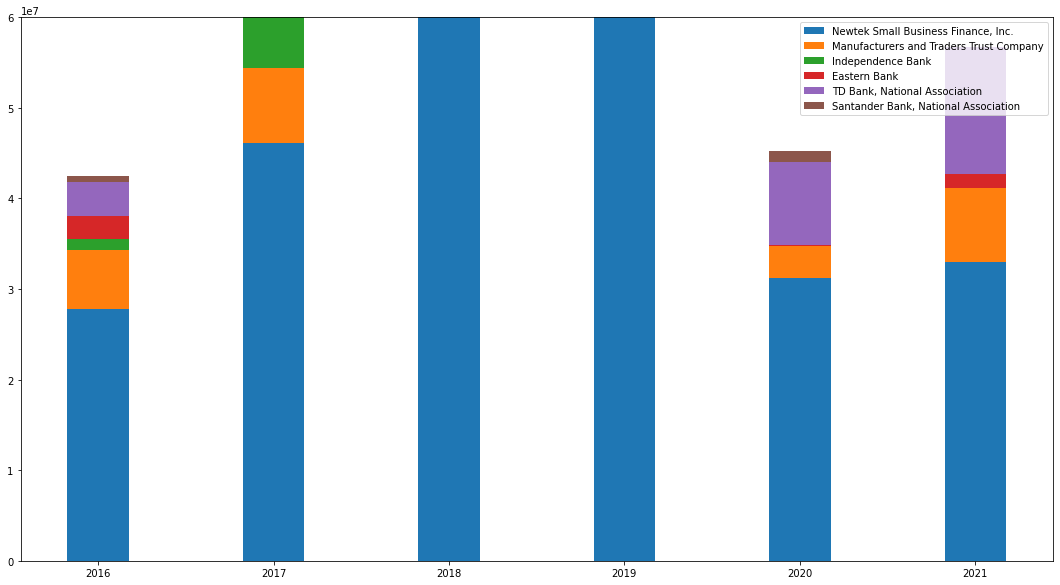

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_gross_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,6*1e7])
ax.legend()
plt.show()

In [ ]:
industry7_df= required_data[required_data['Supersector'] == 'Manufacturing']
industry7_df.reset_index(drop=True, inplace=True)
industry7_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-09-30,7A,"Red Dragon Brewery, LLC",1419 Princess Anne St,Fredericksburg,VA,22401,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,250000,187500,2016-01-05,2016,2016-02-01,Others,Lender Advantage Initiative,5.70,84,312120.0,Breweries,NaN,NaN,FREDERICKSBURG CITY,VA,RICHMOND DISTRICT OFFICE,1.0,CORPORATION,EXEMPT,NaT,NaT,0,False,6,31,Manufacturing,0.75
1,2021-09-30,7A,"ROASTMEISTERS COFFEE, LLC",932 A Main Street,WORCESTER,MA,1610,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,50000,25000,2016-01-07,2016,2016-02-01,SBA Express,FA$TRK (Small Loan Express),6.75,84,311920.0,Coffee and Tea Manufacturing,NaN,NaN,WORCESTER,MA,MASSACHUSETTS DISTRICT OFFICE,2.0,CORPORATION,EXEMPT,NaT,NaT,0,True,7,31,Manufacturing,0.50
2,2021-09-30,7A,Ulrich and Kosierowski Woodwor,338 Grape ST.,Lock Haven,PA,17745,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,27000,13500,2016-01-08,2016,2016-02-01,SBA Express,FA$TRK (Small Loan Express),6.80,60,337122.0,Nonupholstered Wood Household Furniture Manufa...,NaN,NaN,CLINTON,PA,PHILADELPHIA DISTRICT OFFICE,12.0,CORPORATION,PIF,2020-12-31,NaT,0,False,2,33,Manufacturing,0.50
3,2021-09-30,7A,Celeste C.Ross,20 Beaver Street,Salem,MA,1970,Eastern Bank,265 Franklin St,BOSTON,MA,2110,10000,5000,2016-01-12,2016,2016-02-01,SBA Express,FA$TRK (Small Loan Express),10.00,84,311811.0,Retail Bakeries,NaN,NaN,ESSEX,MA,MASSACHUSETTS DISTRICT OFFICE,6.0,INDIVIDUAL,PIF,2021-06-30,NaT,0,True,0,31,Manufacturing,0.50
4,2021-09-30,7A,VETERANS GROUP LLC,30830 HEIPLE RD,ESTACADA,OR,97023,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,550000,412500,2016-01-12,2016,2016-02-01,OTH 7A,Contract Guaranty,4.00,30,336612.0,Boat Building,NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,4.0,CORPORATION,PIF,2018-08-31,NaT,0,True,28,33,Manufacturing,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,2021-09-30,7A,Briarbrothers Brewing Company,550 SENECA ST Unit 122,BUFFALO,NY,14204,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,25000,18750,2021-09-28,2021,NaT,SBA Express,FA$TRK (Small Loan Express),5.75,120,312120.0,Breweries,NaN,NaN,ERIE,NY,BUFFALO DISTRICT OFFICE,26.0,CORPORATION,COMMIT,NaT,NaT,0,False,1,31,Manufacturing,0.75
1922,2021-09-30,7A,Briarbrothers Brewing Company,550 SENECA ST Unit 122,BUFFALO,NY,14204,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,150000,112500,2021-09-28,2021,NaT,SBA Express,FA$TRK (Small Loan Express),5.25,90,312120.0,Breweries,NaN,NaN,ERIE,NY,BUFFALO DISTRICT OFFICE,26.0,CORPORATION,COMMIT,NaT,NaT,0,False,1,31,Manufacturing,0.75
1923,2021-09-30,7A,Lorraine's LLC,1247 FELDER AVE,MONTGOMERY,AL,36106,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,66000,49500,2021-09-29,2021,NaT,PLP,Guaranty,6.00,120,311811.0,Retail Bakeries,NaN,NaN,MONTGOMERY,AL,ALABAMA DISTRICT OFFICE,2.0,CORPORATION,COMMIT,NaT,NaT,0,False,2,31,Manufacturing,0.75
1924,2021-09-30,7A,Quality Steak Inc.,210 Park Drive,VOORHEES,NJ,8043,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,500000,250000,2021-09-29,2021,NaT,SBA Express,FA$TRK (Small Loan Express),4.00,120,311612.0,Meat Processed from Carcasses,NaN,NaN,CAMDEN,NJ,NEW JERSEY DISTRICT OFFICE,1.0,CORPORATION,C

In [ ]:
years = industry7_df['ApprovalFiscalYear'].unique()
unique_bank_names = industry7_df['BankName'].unique()
bank_name_gross_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = industry7_df[industry7_df['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_gross_approvals_by_year.append(temp_list)
bank_name_gross_approvals_by_year

[[11526700, 17826100, 15555200, 14577000, 17315500, 15897800],
 [13882600, 27417900, 43230200, 26249900, 23315938, 31318800],
 [2061900, 2729200, 2914000, 4100000, 3338400, 3097500],
 [2685000, 2153000, 947400, 3300000, 462900, 0],
 [53968400, 55965000, 65023000, 66297600, 36747100, 97159500],
 [1570000, 6980000, 11125000, 8375000, 150000, 0]]

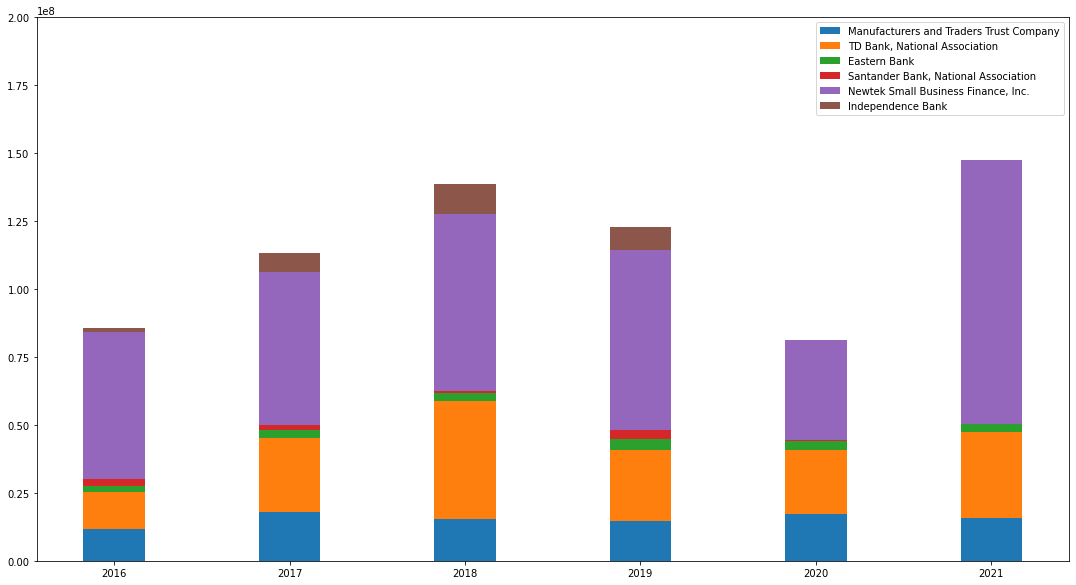

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_gross_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,20*1e7])
ax.legend()
plt.show()

In [ ]:
industry8_df= required_data[required_data['Supersector'] == 'Other Services']
industry8_df.reset_index(drop=True, inplace=True)
industry8_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-09-30,7A,"Against The Grain, Inc.",679 Yonkers Avenue,YONKERS,NY,10704,Independence Bank,1370 S County Trl,EAST GREENWICH,RI,2818,150000,127500,2016-01-04,2016,2016-01-04,Others,Lender Advantage Initiative,6.25,103,812990.0,All Other Personal Services,NaN,NaN,WESTCHESTER,NY,NEW YORK DISTRICT OFFICE,16.0,CORPORATION,CHGOFF,NaT,2018-01-31,140724,False,6,81,Other Services,0.85
1,2021-09-30,7A,Rossbach Inc.,710 B-2 Pulaski Way,Joppa,MD,21085,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,100000,50000,2016-01-04,2016,2016-01-04,SBA Express,FA$TRK (Small Loan Express),5.50,84,811121.0,"Automotive Body, Paint, and Interior Repair an...",NaN,NaN,HARFORD,MD,BALTIMORE DISTRICT OFFICE,1.0,CORPORATION,EXEMPT,NaT,NaT,0,True,10,81,Other Services,0.50
2,2021-09-30,7A,"B & W AUTO REPAIRS, CORP.",4807 Pembroke Road,HOLLYWOOD,FL,33021,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,35000,17500,2016-01-06,2016,NaT,SBA Express,FA$TRK (Small Loan Express),7.00,84,811111.0,General Automotive Repair,NaN,NaN,BROWARD,FL,SOUTH FLORIDA DISTRICT OFFICE,23.0,CORPORATION,CANCLD,NaT,NaT,0,False,6,81,Other Services,0.50
3,2021-09-30,7A,Callooh Callay Inc,2208 SUNRISE Highway,Merrick,NY,11566,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,100000,50000,2016-01-07,2016,2017-03-01,SBA Express,FA$TRK (Small Loan Express),8.00,84,812320.0,Drycleaning and Laundry Services (except Coin-...,NaN,NaN,NASSAU,NY,MELVILLE BRANCH OFFICE,4.0,CORPORATION,EXEMPT,NaT,NaT,0,True,25,81,Other Services,0.50
4,2021-09-30,7A,Boston Home Couture,1690B Dorchester Ave,Dorchester,MA,2122,Eastern Bank,265 Franklin St,BOSTON,MA,2110,60000,30000,2016-01-08,2016,2016-01-08,SBA Express,FA$TRK (Small Loan Express),8.00,60,812112.0,Beauty Salons,NaN,NaN,SUFFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,7.0,INDIVIDUAL,PIF,2021-03-31,NaT,0,False,0,81,Other Services,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3101,2021-09-30,7A,The Concept Salon LLC,2 RYAN RD,MARLBORO,NJ,7746,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,70000,52500,2021-09-29,2021,NaT,SBA Express,FA$TRK (Small Loan Express),7.05,120,812112.0,Beauty Salons,NaN,NaN,MONMOUTH,NJ,NEW JERSEY DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,True,8,81,Other Services,0.75
3102,2021-09-30,7A,"Invisishield, LLC",4415 Tropper Court,SPRING,TX,77386,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,530300,397725,2021-09-29,2021,NaT,PLP,Guaranty,6.00,119,811121.0,"Automotive Body, Paint, and Interior Repair an...",NaN,NaN,MONTGOMERY,TX,HOUSTON DISTRICT OFFICE,8.0,CORPORATION,COMMIT,NaT,NaT,0,False,24,81,Other Services,0.75
3103,2021-09-30,7A,Lash Greedy Studio and Boutiqu,275 State Route 10E Suite 40,SUCCASUNNA,NJ,7876,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,25000,18750,2021-09-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),9.75,120,812112.0,Beauty Salons,NaN,NaN,MORRIS,NJ,NEW JERSEY DISTRICT OFFICE,7.0,CORPORATION,COMMIT,NaT,NaT,0,True,2,81,Other Services,0.75
3104,2021-09-30,7A,SP HOLLAND AUTOMOTIVE GROUP IN,49 Elizabeth St,STATEN ISLAND,NY,10310,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,25000,18750,2021-09-30,2021,NaT,SBA Express,FA$TRK (Small Loan Express),9.75,120,811111.0,General Automotive Repair,NaN,NaN,RICHMOND,NY,NEW 

In [ ]:
years = industry8_df['ApprovalFiscalYear'].unique()
unique_bank_names = industry8_df['BankName'].unique()
bank_name_gross_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = industry8_df[industry8_df['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_gross_approvals_by_year.append(temp_list)
bank_name_gross_approvals_by_year

[[4675000, 13460000, 15345000, 12070000, 200000, 0],
 [10837000, 15274300, 14449100, 14375700, 12513700, 19446800],
 [9289400, 15674200, 19509800, 16277400, 9126900, 28844900],
 [3354500, 5799700, 5482100, 6081100, 9236300, 4206300],
 [19984500, 28304000, 36075500, 44461600, 17276500, 46450100],
 [1380000, 1519000, 1223300, 2188800, 366000, 0]]

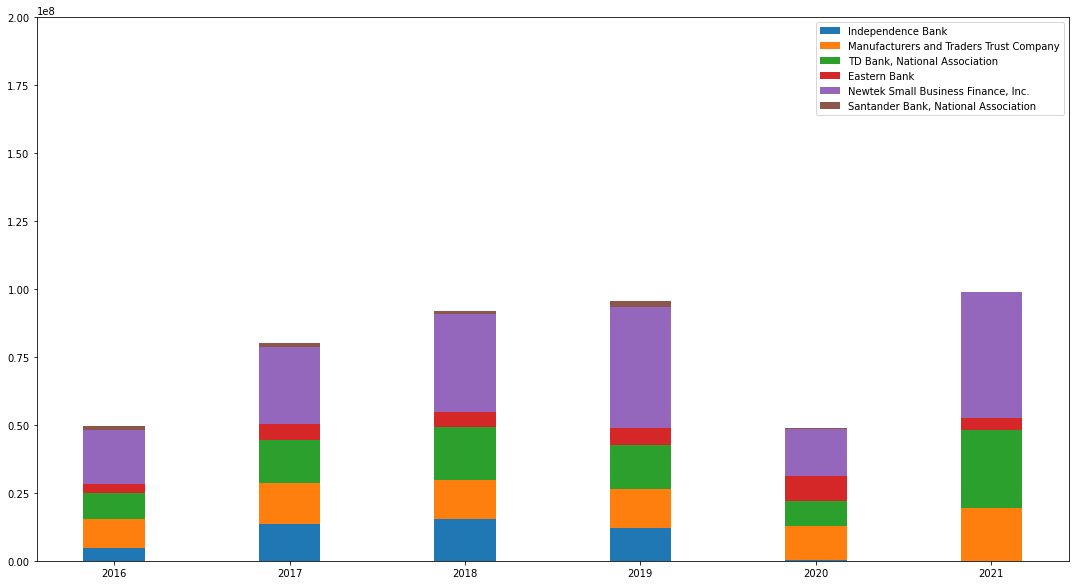

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_gross_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,20*1e7])
ax.legend()
plt.show()

In [ ]:
industry9_df= required_data[required_data['Supersector'] == 'WholeSale Trade']
industry9_df.reset_index(drop=True, inplace=True)
industry9_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-09-30,7A,PRUITT PARTNERS LLC,3537 Martha Custis Drive,ALEXANDRIA,VA,22302,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,25000,12500,2016-01-07,2016,2016-02-01,SBA Express,FA$TRK (Small Loan Express),8.00,84,424480.0,Fresh Fruit and Vegetable Merchant Wholesalers,NaN,NaN,ALEXANDRIA CITY,VA,WASHINGTON DISTRICT OFFICE,8.0,CORPORATION,EXEMPT,NaT,NaT,0,True,6,42,WholeSale Trade,0.50
1,2021-09-30,7A,Scents of Style Inc.,3801 Victory Blvd Unit F-6,STATEN ISLAND,NY,10314,Independence Bank,1370 S County Trl,EAST GREENWICH,RI,2818,150000,127500,2016-01-08,2016,2016-01-08,Others,Lender Advantage Initiative,6.25,103,424210.0,Drugs and Druggists' Sundries Merchant Wholesa...,NaN,NaN,RICHMOND,NY,NEW YORK DISTRICT OFFICE,11.0,CORPORATION,CHGOFF,NaT,2018-01-05,136874,False,1,42,WholeSale Trade,0.85
2,2021-09-30,7A,"J.T. Services, LLC",145 Laurel Street,West Boylston,MA,1583,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,22300,11150,2016-01-13,2016,2016-01-13,SBA Express,FA$TRK (Small Loan Express),5.75,60,423330.0,"Roofing, Siding, and Insulation Material Merch...",NaN,NaN,WORCESTER,MA,MASSACHUSETTS DISTRICT OFFICE,2.0,CORPORATION,PIF,2017-09-30,NaT,0,False,21,42,WholeSale Trade,0.50
3,2021-09-30,7A,International Designs Corporat,3500 W. Hallandale Beach Blvd.,Pembroke Pines,FL,33023,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,3000000,2250000,2016-01-19,2016,2016-01-19,OTH 7A,Standard Asset Based,3.50,12,424310.0,"Piece Goods, Notions, and Other Dry Goods Merc...",NaN,NaN,BROWARD,FL,SOUTH FLORIDA DISTRICT OFFICE,20.0,CORPORATION,PIF,2017-02-28,NaT,0,True,40,42,WholeSale Trade,0.75
4,2021-09-30,7A,INTERPLACE CORP.,1950 NE 147 Terrace,Miami,FL,33181,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,100000,50000,2016-01-22,2016,2016-02-01,SBA Express,FA$TRK (Small Loan Express),4.75,84,425120.0,Wholesale Trade Agents and Brokers,NaN,NaN,MIAMI-DADE,FL,SOUTH FLORIDA DISTRICT OFFICE,24.0,CORPORATION,EXEMPT,NaT,NaT,0,False,4,42,WholeSale Trade,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,2021-09-30,7A,"Ecuadane, Inc.",9 Windsor Ct,PURCHASE,NY,10577,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,350000,315000,2021-09-27,2021,NaT,PLP,Guaranty,6.00,119,423220.0,Home Furnishing Merchant Wholesalers,NaN,NaN,WESTCHESTER,NY,NEW YORK DISTRICT OFFICE,17.0,CORPORATION,COMMIT,NaT,NaT,0,False,1,42,WholeSale Trade,0.90
2133,2021-09-30,7A,ENERGY KNC NJ INC,51 HOOK RD #53,BAYONNE,NJ,7002,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,100000,75000,2021-09-27,2021,NaT,SBA Express,FA$TRK (Small Loan Express),4.50,120,423990.0,Other Miscellaneous Durable Goods Merchant Who...,NaN,NaN,HUDSON,NJ,NEW JERSEY DISTRICT OFFICE,8.0,CORPORATION,COMMIT,NaT,NaT,0,True,2,42,WholeSale Trade,0.75
2134,2021-09-30,7A,FM1 LLC,112 Corporation Drive,OXFORD,NC,27565,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,3500000,3150000,2021-09-29,2021,NaT,PLP,Guaranty,3.87,10,424420.0,Packaged Frozen Food Merchant Wholesalers,NaN,NaN,GRANVILLE,NC,NORTH CAROLINA DISTRICT OFFICE,1.0,CORPORATION,COMMIT,NaT,NaT,0,False,11,42,WholeSale Trade,0.90
2135,2021-09-30,7A,Nutmeg Gaming & Bingo Products,63 Emmett St,BRISTOL,CT,6010,Manufacturers and Traders Trust Company,"One M & T Plaza, 15t

In [ ]:
years = industry9_df['ApprovalFiscalYear'].unique()
unique_bank_names = industry9_df['BankName'].unique()
bank_name_gross_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = industry9_df[industry9_df['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_gross_approvals_by_year.append(temp_list)
bank_name_gross_approvals_by_year

[[12145800, 33906300, 35140850, 31887800, 28511800, 54165500],
 [2010000, 6800000, 9775000, 8100000, 0, 0],
 [11139500, 11069900, 14406800, 14967200, 15533500, 16748000],
 [7191000, 4623500, 7181200, 9208100, 667000, 0],
 [9722100, 15273500, 34135000, 33731500, 36594500, 59512500],
 [2917600, 1858000, 592000, 1285000, 2353700, 800000]]

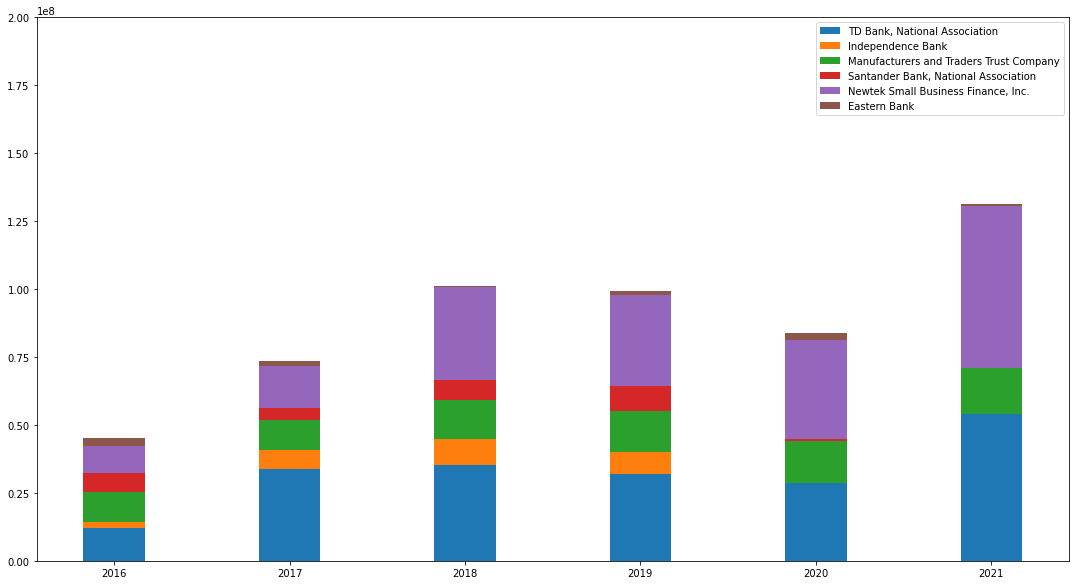

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_gross_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,20*1e7])
ax.legend()
plt.show()

In [ ]:
industry10_df= required_data[required_data['Supersector'] == 'Health care & Social Assistance']
industry10_df.reset_index(drop=True, inplace=True)
industry10_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-09-30,7A,"Nadia Rodriguez DMD, PLLC",140 West 58th Street Unit 2CD,New York,NY,10019,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,125000,62500,2016-01-07,2016,2016-01-07,SBA Express,FA$TRK (Small Loan Express),5.50,84,621210.0,Offices of Dentists,NaN,NaN,NEW YORK,NY,NEW YORK DISTRICT OFFICE,10.0,CORPORATION,PIF,2020-09-30,NaT,0,False,3,62,Health care & Social Assistance,0.50
1,2021-09-30,7A,"Luxurgery, LLC",905-907 Fifth Avenue,NEW YORK,NY,10021,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,858000,643500,2016-01-07,2016,NaT,PLP,Guaranty,5.75,300,621111.0,Offices of Physicians (except Mental Health Sp...,NaN,NaN,NEW YORK,NY,NEW YORK DISTRICT OFFICE,7.0,CORPORATION,CANCLD,NaT,NaT,0,False,8,62,Health care & Social Assistance,0.75
2,2021-09-30,7A,Forever Friends Childcare LLC,95 Stanton Ln,Rochester,NY,14617,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,15000,7500,2016-01-08,2016,2016-01-08,SBA Express,FA$TRK (Small Loan Express),9.05,60,624410.0,Child Day Care Services,NaN,NaN,MONROE,NY,ROCHESTER BRANCH OFFICE,25.0,CORPORATION,PIF,2021-01-31,NaT,0,False,11,62,Health care & Social Assistance,0.50
3,2021-09-30,7A,Guided Living Senior Home Care,52 COURT ST,PLYMOUTH,MA,2360,Eastern Bank,265 Franklin St,BOSTON,MA,2110,20000,10000,2016-01-08,2016,2016-01-08,SBA Express,FA$TRK (Small Loan Express),9.75,60,621610.0,Home Health Care Services,NaN,NaN,PLYMOUTH,MA,MASSACHUSETTS DISTRICT OFFICE,9.0,CORPORATION,CANCLD,NaT,NaT,0,False,45,62,Health care & Social Assistance,0.50
4,2021-09-30,7A,SRL TOTAL SOURCE LLC,83 High Street Suite B,WALDORF,MD,20602,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,50000,25000,2016-01-12,2016,2016-02-01,SBA Express,FA$TRK (Small Loan Express),6.50,84,621210.0,Offices of Dentists,NaN,NaN,CHARLES,MD,BALTIMORE DISTRICT OFFICE,5.0,CORPORATION,EXEMPT,NaT,NaT,0,True,13,62,Health care & Social Assistance,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,2021-09-30,7A,Reset Cryotherapy LLC,1220 20th St,MIAMI BEACH,FL,33139,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,350000,315000,2021-09-28,2021,NaT,PLP,Guaranty,6.00,119,621511.0,Medical Laboratories,NaN,NaN,MIAMI-DADE,FL,SOUTH FLORIDA DISTRICT OFFICE,24.0,CORPORATION,COMMIT,NaT,NaT,0,False,3,62,Health care & Social Assistance,0.90
2032,2021-09-30,7A,"Kathleen Rickard, D.P.M.",1 NORTH NICE ST,FRACKVILLE,PA,17931,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,10000,7500,2021-09-29,2021,NaT,SBA Express,FA$TRK (Small Loan Express),6.75,120,621391.0,Offices of Podiatrists,NaN,NaN,SCHUYLKILL,PA,PHILADELPHIA DISTRICT OFFICE,9.0,INDIVIDUAL,COMMIT,NaT,NaT,0,True,2,62,Health care & Social Assistance,0.75
2033,2021-09-30,7A,Elite Childrens Academy,22743 SW 88th Path,CUTLER BAY,FL,33190,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,94500,80325,2021-09-29,2021,NaT,PLP,Guaranty,6.00,119,624410.0,Child Day Care Services,NaN,NaN,MIAMI-DADE,FL,SOUTH FLORIDA DISTRICT OFFICE,26.0,CORPORATION,COMMIT,NaT,NaT,0,False,6,62,Health care & Social Assistance,0.85
2034,2021-09-30,7A,New England Medical Group Part,210 Whiting Street,HINGHAM,MA,2043,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,75

In [ ]:
years = industry10_df['ApprovalFiscalYear'].unique()
unique_bank_names = industry10_df['BankName'].unique()
bank_name_gross_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = industry10_df[industry10_df['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_gross_approvals_by_year.append(temp_list)
bank_name_gross_approvals_by_year

[[13407100, 7852000, 13144200, 14356800, 15357300, 15098000],
 [17432900, 28673601, 32636850, 29078700, 43157100, 70069200],
 [2511800, 4529000, 1995000, 2751400, 2065600, 2965400],
 [1654300, 681600, 699500, 4476900, 2032000, 0],
 [28063200, 30025400, 41620000, 60584500, 26795400, 88218000],
 [1560000, 6230000, 8605000, 6725000, 0, 0]]

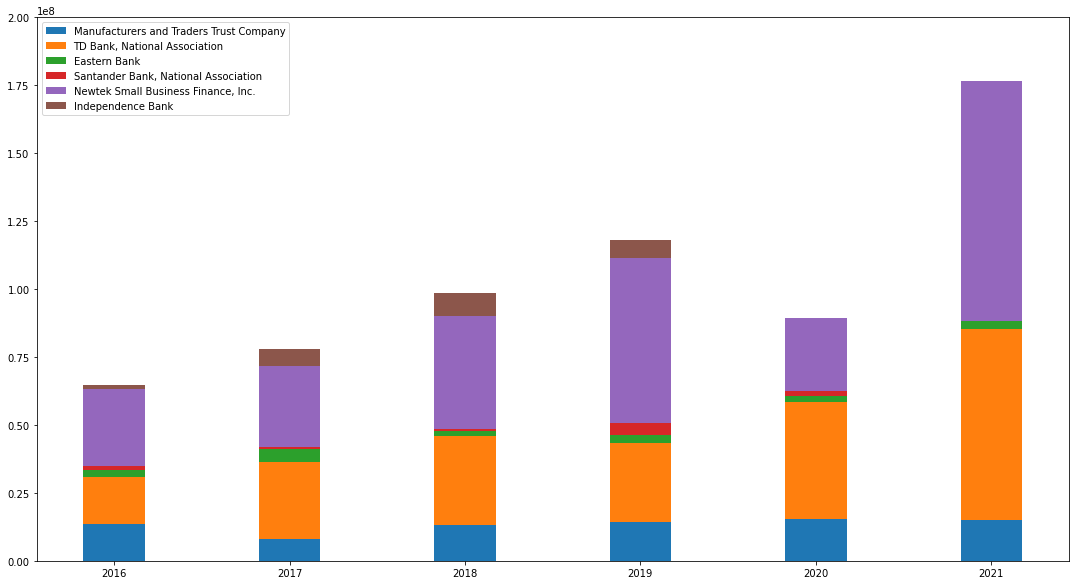

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_gross_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,20*1e7])
ax.legend()
plt.show()

In [ ]:
industry11_df= required_data[required_data['Supersector'] == 'Finance & Insurance']
industry11_df.reset_index(drop=True, inplace=True)
industry11_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-09-30,7A,Tammy Lavertue Financial Manag,24 Wakefield Street,ROCHESTER,NH,3867,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,75000,63750,2016-01-05,2016,2016-01-05,PLP,Guaranty,6.25,120,523930.0,Investment Advice,NaN,NaN,STRAFFORD,NH,NEW HAMPSHIRE DISTRICT OFFICE,1.0,INDIVIDUAL,PIF,2021-05-31,NaT,0,False,1,52,Finance & Insurance,0.85
1,2021-09-30,7A,16 Forsythe Ave LLC,16 Forsythe Avenue,South Yarmouth,MA,2664,Eastern Bank,265 Franklin St,BOSTON,MA,2110,128000,108800,2016-01-06,2016,2016-03-01,Others,Lender Advantage Initiative,5.25,84,523930.0,Investment Advice,NaN,NaN,BARNSTABLE,MA,MASSACHUSETTS DISTRICT OFFICE,9.0,CORPORATION,EXEMPT,NaT,NaT,0,False,3,52,Finance & Insurance,0.85
2,2021-09-30,7A,"Mundial Consulting, Inc.",3691 Willow St,Hampstead,MD,21074,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,25000,12500,2016-01-28,2016,2016-02-01,SBA Express,FA$TRK (Small Loan Express),6.50,84,522220.0,Sales Financing,NaN,NaN,CARROLL,MD,BALTIMORE DISTRICT OFFICE,1.0,CORPORATION,PIF,2020-02-29,NaT,0,True,1,52,Finance & Insurance,0.50
3,2021-09-30,7A,Jason P. Graves,4976 Transit Rd,DEPEW,NY,14043,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,40000,20000,2016-01-29,2016,NaT,SBA Express,FA$TRK (Small Loan Express),8.00,84,524210.0,Insurance Agencies and Brokerages,10150,ALLSTATE INSURANCE,ERIE,NY,BUFFALO DISTRICT OFFICE,26.0,INDIVIDUAL,CANCLD,NaT,NaT,0,True,4,52,Finance & Insurance,0.50
4,2021-09-30,7A,Benefitrfp.com,1 Capital Mall Ste 350,SACRAMENTO,CA,95814,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,118000,100300,2016-01-29,2016,NaT,PLP,Guaranty,6.25,120,524210.0,Insurance Agencies and Brokerages,NaN,NaN,SACRAMENTO,CA,SACRAMENTO DISTRICT OFFICE,6.0,CORPORATION,CANCLD,NaT,NaT,0,False,5,52,Finance & Insurance,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2021-09-30,7A,"EVOLUTION INSURANCE SERVICES,",500 Bl County Blvd,FARMINGDALE,NY,11735,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,25000,18750,2021-09-22,2021,NaT,SBA Express,FA$TRK (Small Loan Express),9.05,120,524210.0,Insurance Agencies and Brokerages,NaN,NaN,SUFFOLK,NY,MELVILLE BRANCH OFFICE,2.0,CORPORATION,COMMIT,NaT,NaT,0,True,0,52,Finance & Insurance,0.75
607,2021-09-30,7A,PEACH INSURANCE SERVICES LLC,425 Town Plaza Ave,PONTE VEDRA,FL,32081,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,10000,7500,2021-09-23,2021,NaT,SBA Express,FA$TRK (Small Loan Express),9.05,120,524210.0,Insurance Agencies and Brokerages,NaN,NaN,SAINT JOHNS,FL,NORTH FLORIDA DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,True,1,52,Finance & Insurance,0.75
608,2021-09-30,7A,New Frontier Insurance Agency,510 North 14TH ST,FORT CALHOUN,NE,68023,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,160000,144000,2021-09-23,2021,NaT,PLP,Guaranty,6.00,120,524210.0,Insurance Agencies and Brokerages,NaN,NaN,WASHINGTON,NE,NEBRASKA DISTRICT OFFICE,1.0,CORPORATION,COMMIT,NaT,NaT,0,False,4,52,Finance & Insurance,0.90
609,2021-09-30,7A,LAURMARK INSURANCE AGENCY,1778 WASHINGTON ST,STOUGHTON,MA,2072,Eastern Bank,265 Franklin St,BOSTON,MA,2110,25000,18750,2021-09-28,2021,NaT,SBA Express,FA$TRK (Small Loan Express),5.99,60,524210.0,Insurance Agencies and Brokerages,NaN,NaN,NORFOLK,

In [ ]:
years = industry11_df['ApprovalFiscalYear'].unique()
unique_bank_names = industry11_df['BankName'].unique()
bank_name_gross_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = industry11_df[industry11_df['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_gross_approvals_by_year.append(temp_list)
bank_name_gross_approvals_by_year

[[1532000, 1370000, 1762000, 3181000, 956000, 15542500],
 [658000, 672500, 1371500, 150100, 501300, 75000],
 [3740800, 4250200, 1335900, 2952700, 1057900, 3591200],
 [2150000, 4160000, 3700000, 3100000, 0, 0],
 [840000, 2203900, 6404200, 2524000, 3119000, 3641300],
 [100000, 170000, 1042000, 15500, 0, 0]]

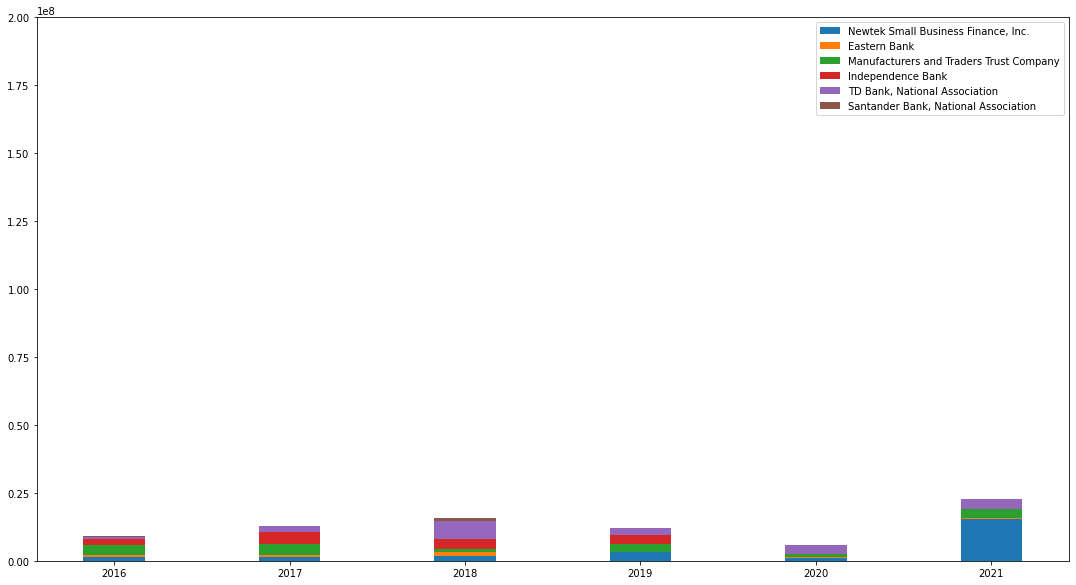

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_gross_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,20*1e7])
ax.legend()
plt.show()

In [ ]:
industry12_df= required_data[required_data['Supersector'] == 'Information']
industry12_df.reset_index(drop=True, inplace=True)
industry12_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-09-30,7A,Human Element LLC,1625 Wyatts Ridge,CROWNSVILLE,MD,21032,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,300000,225000,2016-01-04,2016,2016-01-04,Others,Lender Advantage Initiative,5.10,60,511210.0,Software Publishers,NaN,NaN,ANNE ARUNDEL,MD,BALTIMORE DISTRICT OFFICE,4.0,CORPORATION,PIF,2018-12-31,NaT,0,False,4,51,Information,0.75
1,2021-09-30,7A,Human Element LLC,1625 Wyatts Ridge,CROWNSVILLE,MD,21032,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,100000,50000,2016-01-04,2016,2016-08-01,SBA Express,FA$TRK (Small Loan Express),5.50,107,511210.0,Software Publishers,NaN,NaN,ANNE ARUNDEL,MD,BALTIMORE DISTRICT OFFICE,4.0,CORPORATION,PIF,2018-12-31,NaT,0,False,4,51,Information,0.50
2,2021-09-30,7A,"Media Coop, LLC",1241B Crease Street,Philadelphia,PA,19125,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,100000,50000,2016-01-06,2016,2016-05-01,SBA Express,FA$TRK (Small Loan Express),8.00,84,512110.0,Motion Picture and Video Production,NaN,NaN,PHILADELPHIA,PA,PHILADELPHIA DISTRICT OFFICE,2.0,CORPORATION,PIF,2018-03-31,NaT,0,True,0,51,Information,0.50
3,2021-09-30,7A,"SSA US, INC.",425 JACOBSEN DRIVE,NEWARK,DE,19702,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,35000,17500,2016-01-13,2016,2018-10-31,SBA Express,FA$TRK (Small Loan Express),8.00,84,518210.0,"Data Processing, Hosting, and Related Services",NaN,NaN,NEW CASTLE,DE,DELAWARE DISTRICT OFFICE,0.0,CORPORATION,PIF,2019-01-31,NaT,0,True,0,51,Information,0.50
4,2021-09-30,7A,Oak Tree Storage LLC,1002 Quentin Road Suite 3005,BROOKLYN,NY,11223,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,315000,236250,2016-01-15,2016,2016-01-15,PLP,Guaranty,6.25,120,519190.0,All Other Information Services,NaN,NaN,KINGS,NY,NEW YORK DISTRICT OFFICE,8.0,CORPORATION,PIF,2017-12-31,NaT,0,False,4,51,Information,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2021-09-30,7A,VSBL,1332 Pinegrove NW,GRAND RAPIDS,MI,49504,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,50000,45000,2021-09-16,2021,NaT,PLP,Guaranty,6.00,120,512110.0,Motion Picture and Video Production,NaN,NaN,KENT,MI,MICHIGAN DISTRICT OFFICE,2.0,CORPORATION,COMMIT,NaT,NaT,0,False,2,51,Information,0.90
391,2021-09-30,7A,CTE PROPERTIES LLC,39 MAPLE PLACE,KEYPORT,NJ,7735,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,274000,205500,2021-09-17,2021,NaT,SBA Express,FA$TRK (Small Loan Express),4.99,300,517919.0,All Other Telecommunications,NaN,NaN,MONMOUTH,NJ,NEW JERSEY DISTRICT OFFICE,6.0,CORPORATION,COMMIT,NaT,NaT,0,False,2,51,Information,0.75
392,2021-09-30,7A,"Wiser ID, LLC",26 Twin Oaks Dr,NASHVILLE,TN,37211,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,50000,45000,2021-09-20,2021,NaT,PLP,Guaranty,6.00,120,511210.0,Software Publishers,NaN,NaN,DAVIDSON,TN,TENNESSEE DISTRICT OFFICE,5.0,CORPORATION,COMMIT,NaT,NaT,0,False,3,51,Information,0.90
393,2021-09-30,7A,FRAGISH STUDIOS INC.,9 VINCENT RD UNIT 102,SPRING VALLEY,NY,10977,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,100000,75000,2021-09-20,2021,NaT,SBA Express,FA$TRK (Small Loan Express),7.00,120,512240.0,Sound Recording Studios,NaN,NaN,ROCKLAND,NY,NEW YORK DISTRICT OFFICE,17.0,CORPORAT

In [ ]:
years = industry12_df['ApprovalFiscalYear'].unique()
unique_bank_names = industry12_df['BankName'].unique()
bank_name_gross_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = industry12_df[industry12_df['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_gross_approvals_by_year.append(temp_list)
bank_name_gross_approvals_by_year

[[2460500, 4650000, 4426600, 991600, 695200, 2366100],
 [1310000, 2135500, 3804800, 986600, 698400, 1745700],
 [5042000, 5797000, 6901000, 10386000, 3570000, 30435500],
 [97000, 0, 275000, 248500, 0, 0],
 [250000, 1057000, 586000, 1402200, 769700, 1000000],
 [550000, 1675000, 1675000, 1275000, 0, 0]]

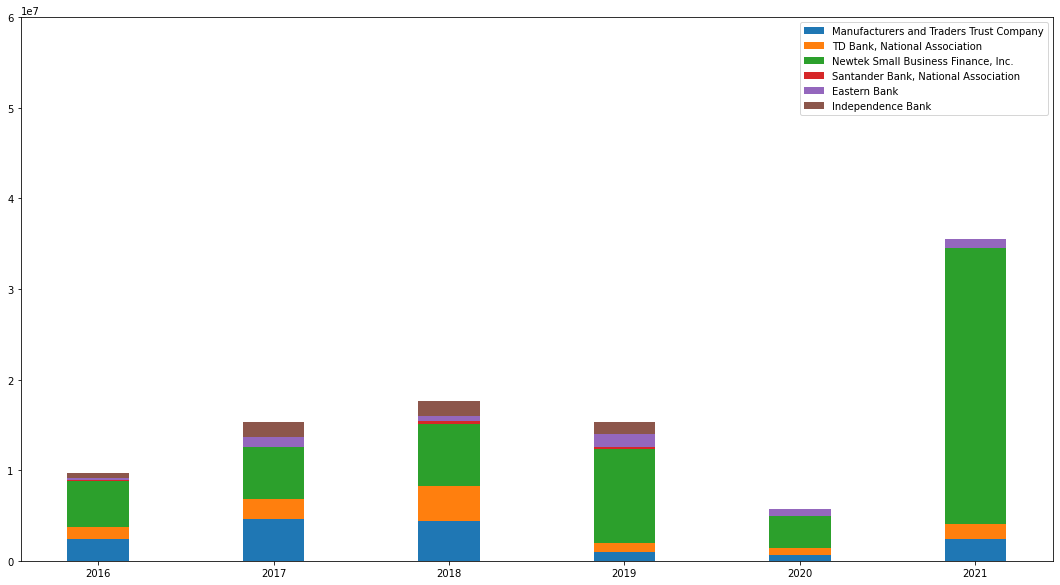

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_gross_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,6*1e7])
ax.legend()
plt.show()

In [ ]:
industry13_df= required_data[required_data['Supersector'] =='Real estate, Rental & Leasing']
industry13_df.reset_index(drop=True, inplace=True)
industry13_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-09-30,7A,MRS Audio Visual Inc.,388 Reed Road,Broomall,PA,19008,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,20000,10000,2016-01-19,2016,2016-03-01,SBA Express,FA$TRK (Small Loan Express),8.00,84,532490.0,Other Commercial and Industrial Machinery and ...,NaN,NaN,DELAWARE,PA,PHILADELPHIA DISTRICT OFFICE,5.0,CORPORATION,EXEMPT,NaT,NaT,0,True,3,53,"Real estate, Rental & Leasing",0.50
1,2021-09-30,7A,NicholsonCantave,1420 Providence Hwy,Norwood,MA,2062,Eastern Bank,265 Franklin St,BOSTON,MA,2110,50000,25000,2016-01-22,2016,2016-01-22,SBA Express,FA$TRK (Small Loan Express),10.00,84,531311.0,Residential Property Managers,NaN,NaN,NORFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,8.0,INDIVIDUAL,PIF,2016-08-31,NaT,0,True,2,53,"Real estate, Rental & Leasing",0.50
2,2021-09-30,7A,"SIR ISAAC, LLC",81 WASHINGTON ST,SALEM,MA,1970,Eastern Bank,265 Franklin St,BOSTON,MA,2110,85000,42500,2016-01-22,2016,2016-01-22,SBA Express,FA$TRK (Small Loan Express),7.75,60,531210.0,Offices of Real Estate Agents and Brokers,NaN,NaN,ESSEX,MA,MASSACHUSETTS DISTRICT OFFICE,6.0,CORPORATION,PIF,2021-02-28,NaT,0,False,2,53,"Real estate, Rental & Leasing",0.50
3,2021-09-30,7A,NicholsonCantave,1420 Providence Hwy,Norwood,MA,2062,Eastern Bank,265 Franklin St,BOSTON,MA,2110,50000,25000,2016-01-22,2016,2016-03-01,SBA Express,FA$TRK (Small Loan Express),10.00,60,531311.0,Residential Property Managers,NaN,NaN,NORFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,8.0,INDIVIDUAL,EXEMPT,NaT,NaT,0,True,2,53,"Real estate, Rental & Leasing",0.50
4,2021-09-30,7A,CaioSimao,14 Lewis st,Everett,MA,2149,Eastern Bank,265 Franklin St,BOSTON,MA,2110,15000,7500,2016-01-26,2016,2016-02-01,SBA Express,FA$TRK (Small Loan Express),10.00,84,531210.0,Offices of Real Estate Agents and Brokers,NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,7.0,INDIVIDUAL,PIF,2019-08-31,NaT,0,True,0,53,"Real estate, Rental & Leasing",0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,2021-09-30,7A,ADONDE VENTURES LLC,7725 SW 86TH ST,MIAMI,FL,33143,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,15000,11250,2021-09-23,2021,NaT,SBA Express,FA$TRK (Small Loan Express),9.75,120,531311.0,Residential Property Managers,NaN,NaN,MIAMI-DADE,FL,SOUTH FLORIDA DISTRICT OFFICE,27.0,CORPORATION,COMMIT,NaT,NaT,0,True,0,53,"Real estate, Rental & Leasing",0.75
736,2021-09-30,7A,World Diamond Source Inc,2987 Center Port Circle,POMPANO BEACH,FL,33064,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,2000000,1500000,2021-09-27,2021,NaT,PLP,Guaranty,6.00,119,532412.0,"Construction, Mining, and Forestry Machinery a...",NaN,NaN,BROWARD,FL,SOUTH FLORIDA DISTRICT OFFICE,20.0,CORPORATION,COMMIT,NaT,NaT,0,False,20,53,"Real estate, Rental & Leasing",0.75
737,2021-09-30,7A,"Phillips Rental RV, LLC",5827 Stanida Cir,HOLLADAY,UT,84121,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,100000,85000,2021-09-29,2021,NaT,PLP,Guaranty,6.00,119,532120.0,"Truck, Utility Trailer, and RV (Recreational V...",NaN,NaN,SALT LAKE,UT,UTAH DISTRICT OFFICE,3.0,CORPORATION,COMMIT,NaT,NaT,0,False,4,53,"Real estate, Rental & Leasing",0.85
738,2021-09-30,7A,The System Within Films,2091 J A Cochran Bypass,CHESTER,SC,29706,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,850000,637500,2021-09-30,2021,NaT,PLP,Guaranty,6.00

In [ ]:
years = industry13_df['ApprovalFiscalYear'].unique()
unique_bank_names = industry13_df['BankName'].unique()
bank_name_gross_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = industry13_df[industry13_df['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_gross_approvals_by_year.append(temp_list)
bank_name_gross_approvals_by_year

[[7036500, 5542890, 5562000, 3276600, 3440000, 8817900],
 [1087200, 3805700, 921000, 694000, 1510000, 1520000],
 [900000, 1870000, 4375000, 3625000, 0, 0],
 [2188200, 3669900, 3736900, 4044000, 2441500, 3489100],
 [12075700, 12148200, 24210000, 18555300, 14322200, 19914800],
 [0, 810000, 1848700, 856000, 150000, 0]]

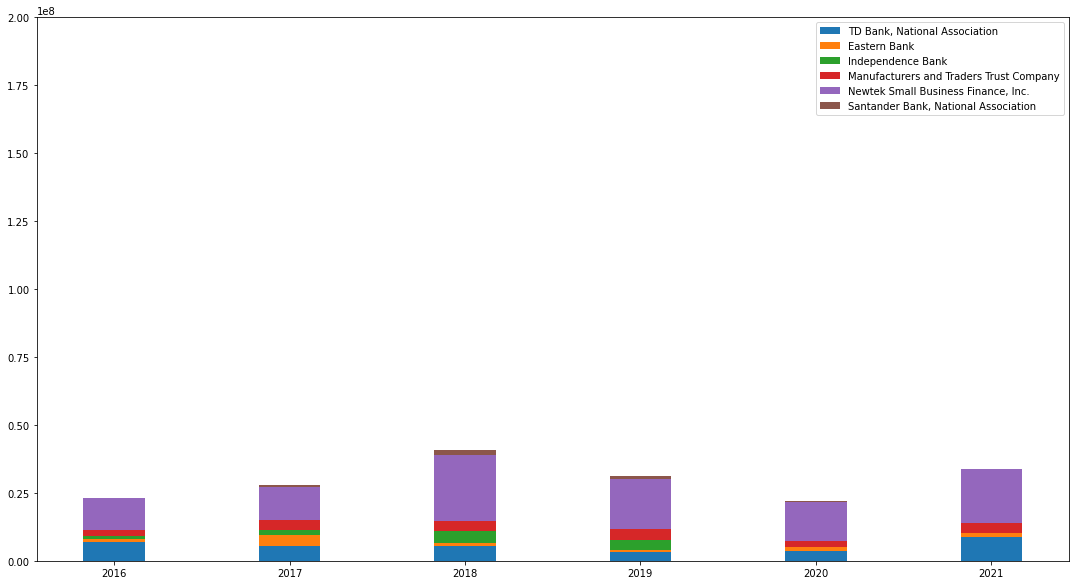

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_gross_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,20*1e7])
ax.legend()
plt.show()

In [ ]:
industry14_df= required_data[required_data['Supersector'] == 'Arts, entertainment & Recreation']
industry14_df.reset_index(drop=True, inplace=True)
industry14_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-09-30,7A,Believe Elite Athletic Trainin,14 Federal Plaza Route 17M,Monroe,NY,10950,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,25000,12500,2016-01-05,2016,2016-02-01,SBA Express,FA$TRK (Small Loan Express),6.00,84,713940.0,Fitness and Recreational Sports Centers,NaN,NaN,ORANGE,NY,NEW YORK DISTRICT OFFICE,18.0,CORPORATION,PIF,2019-10-31,NaT,0,True,1,71,"Arts, entertainment & Recreation",0.50
1,2021-09-30,7A,"PRANA POWER YOGA, INC.",282 Centre Street,NEWTON,MA,2458,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,45000,22500,2016-01-06,2016,2016-01-06,SBA Express,FA$TRK (Small Loan Express),7.00,84,713940.0,Fitness and Recreational Sports Centers,NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,4.0,CORPORATION,PIF,2020-12-31,NaT,0,True,0,71,"Arts, entertainment & Recreation",0.50
2,2021-09-30,7A,Revolution Indoor Cycling LLC,4865 Transit Rd,BUFFALO,NY,14221,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,10000,5000,2016-01-13,2016,2016-02-01,SBA Express,FA$TRK (Small Loan Express),5.50,48,713940.0,Fitness and Recreational Sports Centers,NaN,NaN,ERIE,NY,BUFFALO DISTRICT OFFICE,26.0,CORPORATION,PIF,2018-11-30,NaT,0,False,0,71,"Arts, entertainment & Recreation",0.50
3,2021-09-30,7A,Revolution Indoor Cycling LLC,4865 Transit Rd,BUFFALO,NY,14221,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,25000,12500,2016-01-13,2016,2016-12-01,SBA Express,FA$TRK (Small Loan Express),5.25,84,713940.0,Fitness and Recreational Sports Centers,NaN,NaN,ERIE,NY,BUFFALO DISTRICT OFFICE,26.0,CORPORATION,EXEMPT,NaT,NaT,0,True,0,71,"Arts, entertainment & Recreation",0.50
4,2021-09-30,7A,BuffaloCryo LLC,271 Katherine St,BUFFALO,NY,14210,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,25000,12500,2016-01-21,2016,2016-05-01,SBA Express,FA$TRK (Small Loan Express),7.25,84,713940.0,Fitness and Recreational Sports Centers,NaN,NaN,ERIE,NY,BUFFALO DISTRICT OFFICE,26.0,CORPORATION,EXEMPT,NaT,NaT,0,True,2,71,"Arts, entertainment & Recreation",0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,2021-09-30,7A,HEALTH FACTORY LLC,644 DANBURY RD,WILTON,CT,6897,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,30000,22500,2021-09-29,2021,NaT,SBA Express,FA$TRK (Small Loan Express),9.75,120,713940.0,Fitness and Recreational Sports Centers,NaN,NaN,FAIRFIELD,CT,CONNECTICUT DISTRICT OFFICE,4.0,CORPORATION,COMMIT,NaT,NaT,0,False,0,71,"Arts, entertainment & Recreation",0.75
1024,2021-09-30,7A,"JMH GROUP, LLC",13435 University Avenue,CLIVE,IA,50325,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,417500,375750,2021-09-29,2021,NaT,PLP,Guaranty,6.00,124,713940.0,Fitness and Recreational Sports Centers,S2031,Hotworx,POLK,IA,DES MOINES DISTRICT OFFICE,3.0,CORPORATION,COMMIT,NaT,NaT,0,False,4,71,"Arts, entertainment & Recreation",0.90
1025,2021-09-30,7A,Frederick Strength and Conditi,614-26 North Market Street,FREDERICK,MD,21701,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,325000,243750,2021-09-30,2021,NaT,PLP,Guaranty,5.50,120,713940.0,Fitness and Recreational Sports Centers,NaN,NaN,FREDERICK,MD,BALTIMORE DISTRICT OFFICE,6.0,CORPORATION,COMMIT,NaT,NaT,0,False,9,71,"Arts, entertainment & 

In [ ]:
years = industry14_df['ApprovalFiscalYear'].unique()
unique_bank_names = industry14_df['BankName'].unique()
bank_name_gross_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = industry14_df[industry14_df['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_gross_approvals_by_year.append(temp_list)
bank_name_gross_approvals_by_year

[[4161400, 13515700, 10028500, 17618400, 6326900, 5141200],
 [8422000, 11700792, 12554800, 11334800, 6988500, 3142200],
 [1243200, 1040500, 796000, 1180100, 1059800, 0],
 [17793400, 23479300, 34697300, 36936200, 9272100, 42937600],
 [400000, 1999000, 2350000, 1600000, 0, 0],
 [427000, 190000, 155000, 167700, 100000, 0]]

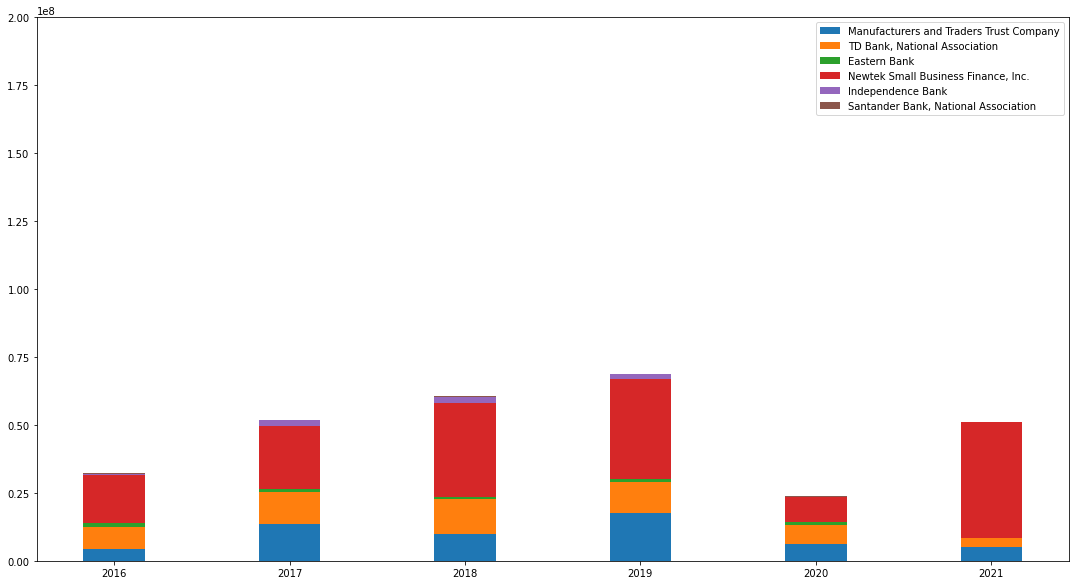

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_gross_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,20*1e7])
ax.legend()
plt.show()

In [ ]:
industry15_df= required_data[required_data['Supersector'] == 'Educational Services']
industry15_df.reset_index(drop=True, inplace=True)
industry15_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-09-30,7A,Fun Fare LLC,12976 HIGHLAND CROSSING DR STE,HERNDON,VA,20171,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,70000,35000,2016-01-13,2016,2016-01-13,SBA Express,FA$TRK (Small Loan Express),6.20,60,611610.0,Fine Arts Schools,14762,PINOT'S PALETTE,FAIRFAX,VA,WASHINGTON DISTRICT OFFICE,10.0,CORPORATION,PIF,2021-01-31,NaT,0,False,4,61,Educational Services,0.50
1,2021-09-30,7A,Fun Fare LLC,12976 HIGHLAND CROSSING DR STE,HERNDON,VA,20171,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,30000,15000,2016-01-13,2016,2016-03-01,SBA Express,FA$TRK (Small Loan Express),10.00,84,611610.0,Fine Arts Schools,14762,PINOT'S PALETTE,FAIRFAX,VA,WASHINGTON DISTRICT OFFICE,10.0,CORPORATION,PIF,2021-03-31,NaT,0,True,4,61,Educational Services,0.50
2,2021-09-30,7A,KATHLEEN P KELBLE,11 LIONEL LN,PEMBROKE,MA,2359,Eastern Bank,265 Franklin St,BOSTON,MA,2110,100000,50000,2016-01-21,2016,2016-01-21,SBA Express,FA$TRK (Small Loan Express),7.75,60,611699.0,All Other Miscellaneous Schools and Instruction,NaN,NaN,PLYMOUTH,MA,MASSACHUSETTS DISTRICT OFFICE,9.0,INDIVIDUAL,PIF,2021-03-31,NaT,0,False,0,61,Educational Services,0.50
3,2021-09-30,7A,High Rise Basketball Academy L,14 N. Water Street,Greenwich,CT,6830,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,30000,15000,2016-01-21,2016,NaT,SBA Express,FA$TRK (Small Loan Express),6.00,84,611620.0,Sports and Recreation Instruction,NaN,NaN,FAIRFIELD,CT,CONNECTICUT DISTRICT OFFICE,4.0,CORPORATION,EXEMPT,NaT,NaT,0,True,0,61,Educational Services,0.50
4,2021-09-30,7A,Education Inc.,2 Main Street,PLYMOUTH,MA,2360,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,191300,143475,2016-01-22,2016,2016-02-01,PLP,Guaranty,4.25,60,611691.0,Exam Preparation and Tutoring,NaN,NaN,PLYMOUTH,MA,MASSACHUSETTS DISTRICT OFFICE,9.0,CORPORATION,PIF,2017-02-28,NaT,0,False,90,61,Educational Services,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,2021-09-30,7A,"Elliott Family Enterprises, LL","1899 Callis Rd,",SOUTH HILL,VA,23970,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,75000,67500,2021-09-16,2021,NaT,PLP,Guaranty,6.00,120,611620.0,Sports and Recreation Instruction,NaN,NaN,MECKLENBURG,VA,RICHMOND DISTRICT OFFICE,5.0,CORPORATION,COMMIT,NaT,NaT,0,False,6,61,Educational Services,0.90
586,2021-09-30,7A,"Pride Gymnastics Academy, LLC",7801 S Old Hwy 51,BROKEN ARROW,OK,74014,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,154400,138960,2021-09-20,2021,NaT,PLP,Guaranty,6.00,120,611620.0,Sports and Recreation Instruction,NaN,NaN,WAGONER,OK,OKLAHOMA DISTRICT OFFICE,1.0,CORPORATION,COMMIT,NaT,NaT,0,False,15,61,Educational Services,0.90
587,2021-09-30,7A,Scivac LLC,230 US HIGHWAY 206,FLANDERS,NJ,7836,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,25000,18750,2021-09-20,2021,NaT,SBA Express,FA$TRK (Small Loan Express),7.05,120,611699.0,All Other Miscellaneous Schools and Instruction,S5620,Zebra Robotics,MORRIS,NJ,NEW JERSEY DISTRICT OFFICE,7.0,CORPORATION,COMMIT,NaT,NaT,0,True,6,61,Educational Services,0.75
588,2021-09-30,7A,Yours II Cosmetology Academy,1416 W Columbia Ave,BATTLE CREEK,MI,49015,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,5000000,3750000,2021-09-22

In [ ]:
years = industry15_df['ApprovalFiscalYear'].unique()
unique_bank_names = industry15_df['BankName'].unique()
bank_name_gross_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = industry15_df[industry15_df['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_gross_approvals_by_year.append(temp_list)
bank_name_gross_approvals_by_year

[[1868700, 4316200, 3222400, 3978600, 1038800, 2200200],
 [920000, 740500, 469000, 1317800, 488300, 350000],
 [625000, 4490000, 3696500, 5696000, 3890700, 5002100],
 [1124300, 415100, 175000, 0, 0, 0],
 [3613500, 8714758, 5611200, 2907500, 3504000, 10549700],
 [290000, 950000, 1860000, 675000, 0, 0]]

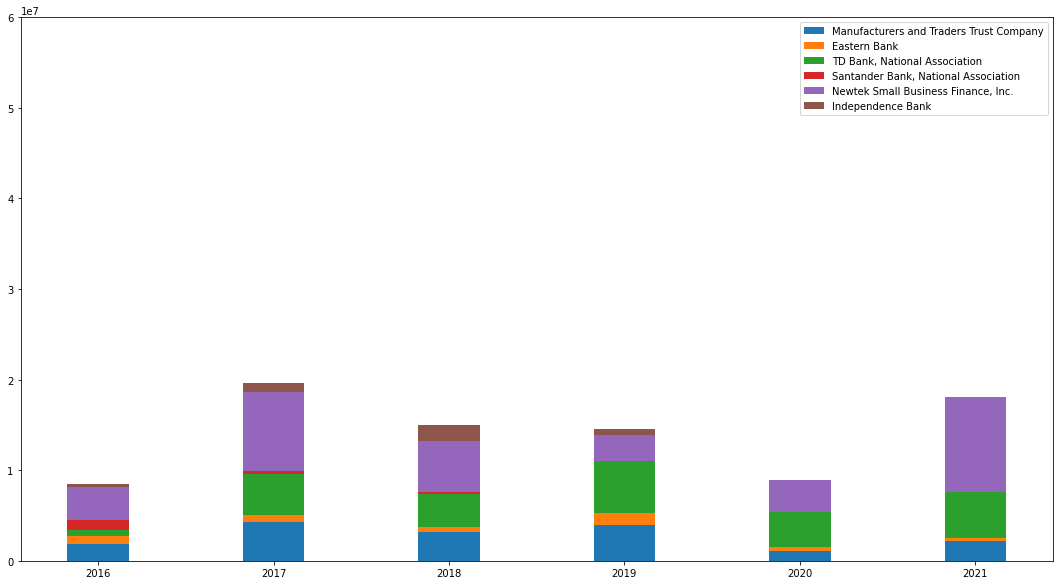

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_gross_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,6*1e7])
ax.legend()
plt.show()

In [ ]:
industry16_df= required_data[required_data['Supersector'] ==  'Agriculture, Forestry, Fishing & Hunting']
industry16_df.reset_index(drop=True, inplace=True)
industry16_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-09-30,7A,Mule Run Farm Operations Inc.,1931 Bowman Rd,Milford,DE,19963,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,50000,25000,2016-01-08,2016,NaT,SBA Express,FA$TRK (Small Loan Express),4.00,84,112111.0,Beef Cattle Ranching and Farming,NaN,NaN,SUSSEX,DE,DELAWARE DISTRICT OFFICE,0.0,CORPORATION,CANCLD,NaT,NaT,0,True,0,11,"Agriculture, Forestry, Fishing & Hunting",0.50
1,2021-09-30,7A,SEAN M CARLSON,27 Carlson Lane,Tenants Harbor,ME,4860,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,15000,7500,2016-01-15,2016,2016-02-01,SBA Express,FA$TRK (Small Loan Express),7.00,84,114112.0,Shellfish Fishing,NaN,NaN,KNOX,ME,MAINE DISTRICT OFFICE,1.0,INDIVIDUAL,EXEMPT,NaT,NaT,0,True,4,11,"Agriculture, Forestry, Fishing & Hunting",0.50
2,2021-09-30,7A,"Montauk Fin Chaser, Inc.",10A Levon Lane,MILLER PLACE,NY,11764,Independence Bank,1370 S County Trl,EAST GREENWICH,RI,2818,100000,85000,2016-02-05,2016,2016-02-05,Others,Lender Advantage Initiative,6.25,120,114119.0,Other Marine Fishing,NaN,NaN,SUFFOLK,NY,MELVILLE BRANCH OFFICE,1.0,CORPORATION,PIF,2017-11-30,NaT,0,False,2,11,"Agriculture, Forestry, Fishing & Hunting",0.85
3,2021-09-30,7A,THE NEW HAMPSHIRE HONEY BEE AP,138 Alstead Hill Road,GILSUM,NH,3448,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,50000,25000,2016-02-23,2016,2016-07-01,SBA Express,FA$TRK (Small Loan Express),7.00,84,112910.0,Apiculture,NaN,NaN,CHESHIRE,NH,NEW HAMPSHIRE DISTRICT OFFICE,2.0,CORPORATION,EXEMPT,NaT,NaT,0,True,0,11,"Agriculture, Forestry, Fishing & Hunting",0.50
4,2021-09-30,7A,Jason L Pusey,4379 Federalsburg Rd,Bridgeville,DE,19933,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,33000,16500,2016-02-24,2016,2016-03-01,SBA Express,FA$TRK (Small Loan Express),7.00,60,112320.0,Broilers and Other Meat Type,NaN,NaN,SUSSEX,DE,DELAWARE DISTRICT OFFICE,0.0,INDIVIDUAL,PIF,2021-01-31,NaT,0,False,1,11,"Agriculture, Forestry, Fishing & Hunting",0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2021-09-30,7A,Kauffman Orchards Inc,3097 OLD PHILADELPHIA PIKE,BIRD IN HAND,PA,17505,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,2625000,2362500,2021-09-13,2021,NaT,PLP,Guaranty,6.00,120,111339.0,Other Noncitrus Fruit Farming,NaN,NaN,LANCASTER,PA,PHILADELPHIA DISTRICT OFFICE,11.0,CORPORATION,COMMIT,NaT,NaT,0,False,51,11,"Agriculture, Forestry, Fishing & Hunting",0.90
248,2021-09-30,7A,SILENT W FARM,1061 ULSTER HEIGHTS RD,ELLENVILLE,NY,12428,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,40000,30000,2021-09-15,2021,NaT,SBA Express,FA$TRK (Small Loan Express),4.00,60,112920.0,Horse and Other Equine Production,NaN,NaN,ULSTER,NY,NEW YORK DISTRICT OFFICE,19.0,INDIVIDUAL,COMMIT,NaT,NaT,0,False,1,11,"Agriculture, Forestry, Fishing & Hunting",0.75
249,2021-09-30,7A,SILENT W FARM,1061 ULSTER HEIGHTS RD,ELLENVILLE,NY,12428,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,10000,7500,2021-09-15,2021,NaT,SBA Express,FA$TRK (Small Loan Express),6.50,120,112920.0,Horse and Other Equine Production,NaN,NaN,ULSTER,NY,NEW YORK DISTRICT OFFICE,19.0,INDIVIDUAL,COMMIT,NaT,NaT,0,True,1,11,"Agriculture, Forestry, Fishing & Hunting",0.75
250,2021-09-30,7A,Equivalent Exchange Equestrian,160 Willowdale Ln,FREDE

In [ ]:
years = industry16_df['ApprovalFiscalYear'].unique()
unique_bank_names = industry16_df['BankName'].unique()
bank_name_gross_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = industry16_df[industry16_df['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_gross_approvals_by_year.append(temp_list)
bank_name_gross_approvals_by_year

[[1357100, 1504200, 954100, 4450000, 846500, 1845900],
 [147000, 1980000, 877000, 685000, 438200, 50000],
 [160000, 800000, 1225000, 1220000, 0, 0],
 [2615000, 5546300, 1795000, 5810300, 1275000, 8272200],
 [330000, 90000, 80000, 0, 25000, 1335000],
 [0, 11900, 75000, 0, 0, 0]]

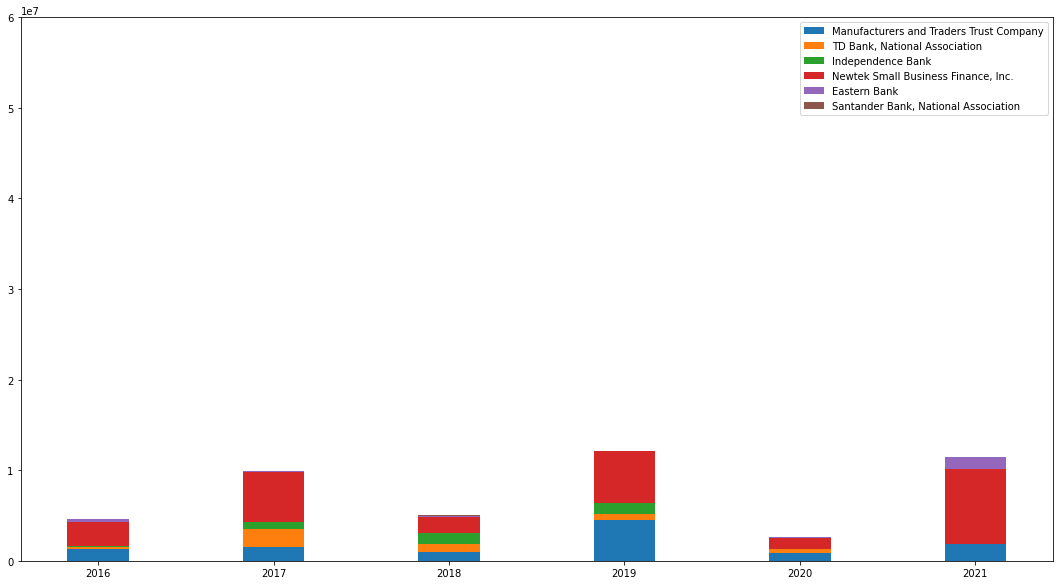

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_gross_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,6*1e7])
ax.legend()
plt.show()

In [ ]:
industry17_df= required_data[required_data['Supersector'] == 'Public Administration']
industry17_df.reset_index(drop=True, inplace=True)
industry17_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-09-30,7A,ANDREW PICKETT LAW PLLC,1399 Hampton Park Ln,Melbourne,FL,32940,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,75000,37500,2018-02-26,2018,2019-03-31,SBA Express,FA$TRK (Small Loan Express),7.99,120,922130.0,Legal Counsel and Prosecution,NaN,NaN,BREVARD,FL,SOUTH FLORIDA DISTRICT OFFICE,8.0,CORPORATION,PIF,2021-05-31,NaT,0,True,3,92,Public Administration,0.5
1,2021-09-30,7A,"NML PROPERTIES, LLC",2006 Vernon Pl,Melbourne,FL,32901,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,310000,155000,2018-06-05,2018,2018-06-30,SBA Express,FA$TRK (Small Loan Express),5.50,120,926150.0,"Regulation, Licensing, and Inspection of Misce...",NaN,NaN,BREVARD,FL,SOUTH FLORIDA DISTRICT OFFICE,8.0,CORPORATION,EXEMPT,NaT,NaT,0,False,0,92,Public Administration,0.5
2,2021-09-30,7A,AMERICAN BACKFLOW & FIRE PREVE,111 KERRY LN,WAUCONDA,IL,60084,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,1647500,1482750,2021-09-09,2021,NaT,PLP,Guaranty,6.00,300,922160.0,Fire Protection,NaN,NaN,LAKE,IL,ILLINOIS DISTRICT OFFICE,14.0,CORPORATION,COMMIT,NaT,NaT,0,False,90,92,Public Administration,0.9
3,2021-09-30,7A,Mister Sparky of Pittsburgh No,1103 FAIRFIELD ST,PITTSBURGH,PA,15201,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,76500,68850,2021-09-23,2021,NaT,PLP,Guaranty,6.00,120,926130.0,Regulation and Administration of Communication...,S1119,Mister Sparky,ALLEGHENY,PA,PITTSBURGH DISTRICT OFFICE,18.0,CORPORATION,COMMIT,NaT,NaT,0,False,5,92,Public Administration,0.9


In [ ]:
years = industry17_df['ApprovalFiscalYear'].unique()
unique_bank_names = industry17_df['BankName'].unique()
bank_name_gross_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = industry17_df[industry17_df['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_gross_approvals_by_year.append(temp_list)
bank_name_gross_approvals_by_year

[[385000, 0], [0, 1724000]]

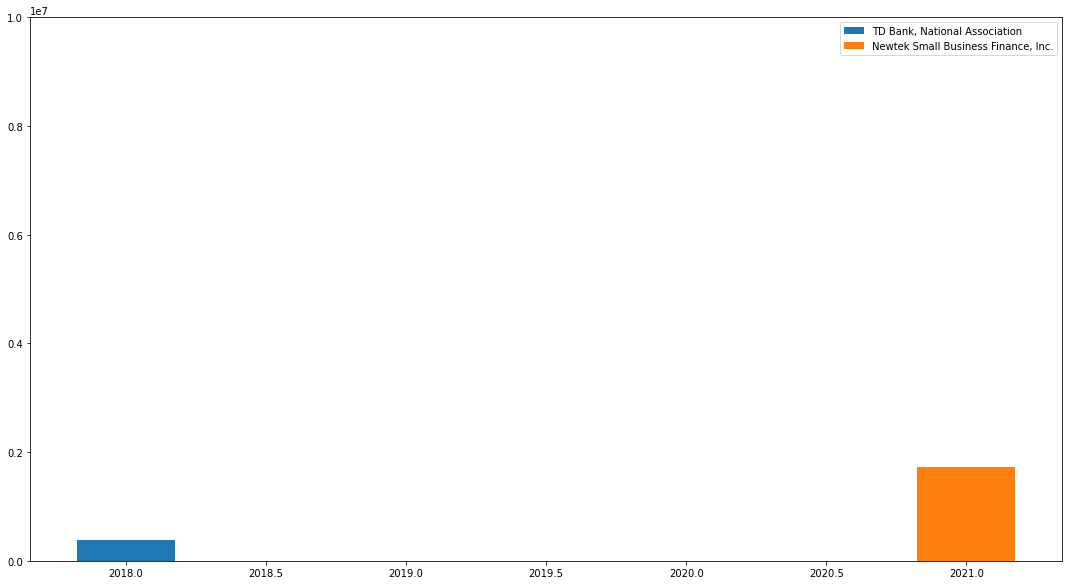

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_gross_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,1*1e7])
ax.legend()
plt.show()

In [ ]:
industry18_df= required_data[required_data['Supersector'] == 'Utilities']
industry18_df.reset_index(drop=True, inplace=True)
industry18_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-09-30,7A,"DGM Systems, LLC",1 Snagwood Road,FOSTER,RI,2825,Independence Bank,1370 S County Trl,EAST GREENWICH,RI,2818,150000,127500,2016-01-22,2016,2016-01-22,Others,Lender Advantage Initiative,6.25,120,221310.0,Water Supply and Irrigation Systems,NaN,NaN,PROVIDENCE,RI,RHODE ISLAND DISTRICT OFFICE,2.0,CORPORATION,PIF,2021-03-31,NaT,0,False,0,22,Utilities,0.85
1,2021-09-30,7A,"Nickels Energy Solutions, LLC",105 Zodiac Cir,Liverpool,NY,13090,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,25000,12500,2016-06-09,2016,2016-11-01,SBA Express,FA$TRK (Small Loan Express),7.50,84,221114.0,Solar Electric Power Generation,NaN,NaN,ONONDAGA,NY,SYRACUSE DISTRICT OFFICE,24.0,CORPORATION,EXEMPT,NaT,NaT,0,True,6,22,Utilities,0.50
2,2021-09-30,7A,Nickels Energy Solutions LLC,105 Zodiac Cir,Liverpool,NY,13090,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,35000,17500,2016-06-09,2016,2016-06-09,SBA Express,FA$TRK (Small Loan Express),6.00,60,221114.0,Solar Electric Power Generation,NaN,NaN,ONONDAGA,NY,SYRACUSE DISTRICT OFFICE,24.0,CORPORATION,PIF,2018-11-30,NaT,0,False,6,22,Utilities,0.50
3,2021-09-30,7A,Carl B Seeds Inc,555 Keith Lane #7,Owings,MD,20736,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,168000,84000,2016-10-12,2017,2017-04-30,SBA Express,FA$TRK (Small Loan Express),5.75,84,221320.0,Sewage Treatment Facilities,NaN,NaN,CALVERT,MD,BALTIMORE DISTRICT OFFICE,5.0,CORPORATION,EXEMPT,NaT,NaT,0,False,6,22,Utilities,0.50
4,2021-09-30,7A,"Plugin Stations Online, LLC",100 Tinley RD,STEPHENTOWN,NY,12169,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,50000,25000,2017-05-12,2017,2017-06-30,SBA Express,FA$TRK (Small Loan Express),7.75,60,221112.0,Fossil Fuel Electric Power,NaN,NaN,RENSSELAER,NY,SYRACUSE DISTRICT OFFICE,19.0,CORPORATION,PIF,2021-04-30,NaT,0,True,20,22,Utilities,0.50
5,2021-09-30,7A,PRIDE ENERGY GROUP,122 GREEN ST,MELROSE,MA,2176,Eastern Bank,265 Franklin St,BOSTON,MA,2110,30000,15000,2017-06-01,2017,2017-07-31,SBA Express,FA$TRK (Small Loan Express),10.49,60,221122.0,Electric Power Distribution,NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,5.0,CORPORATION,EXEMPT,NaT,NaT,0,False,6,22,Utilities,0.50
6,2021-09-30,7A,Mendes Gas & Oil Burner Servic,21 LEVANT ST,DORCHESTER,MA,2122,Eastern Bank,265 Franklin St,BOSTON,MA,2110,45000,22500,2017-06-20,2017,2017-07-31,SBA Express,FA$TRK (Small Loan Express),10.74,60,221210.0,Natural Gas Distribution,NaN,NaN,SUFFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,7.0,CORPORATION,EXEMPT,NaT,NaT,0,False,3,22,Utilities,0.50
7,2021-09-30,7A,Usher Energy Corp.,10 Lemberg Court,Monroe,NY,10950,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,50000,25000,2017-07-12,2017,2017-08-07,SBA Express,FA$TRK (Small Loan Express),9.74,84,221122.0,Electric Power Distribution,NaN,NaN,ORANGE,NY,NEW YORK DISTRICT OFFICE,18.0,CORPORATION,PIF,2018-06-30,NaT,0,True,2,22,Utilities,0.50
8,2021-09-30,7A,PRIDE ENERGY GROUP,122 GREEN ST,MELROSE,MA,2176,Eastern Bank,265 Franklin St,BOSTON,MA,2110,15300,7650,2017-08-01,2017,2017-09-30,SBA Express,FA$TRK (Small Loan Express),10.74,60,221122.0,Electric Power Distribution,NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,5.0,CORPORATION,EXEMPT,NaT,NaT,0,False,3,22,Utilities,0.50
9,2021-09-30,7A,Magnation Corporation,403 MARTIN LUTHER KING JR WAY,OAKLAND,CA,94607,"Newtek Small Business Finance, Inc.",1981 Marcu

In [ ]:
years = industry18_df['ApprovalFiscalYear'].unique()
unique_bank_names = industry18_df['BankName'].unique()
bank_name_gross_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = industry18_df[industry18_df['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_gross_approvals_by_year.append(temp_list)
bank_name_gross_approvals_by_year

[[150000, 0, 300000, 0, 0, 0],
 [60000, 218000, 620000, 0, 50000, 290000],
 [0, 90300, 17000, 0, 60000, 660000],
 [0, 50000, 0, 175000, 40000, 50000],
 [0, 200000, 0, 2790000, 145500, 3516000]]

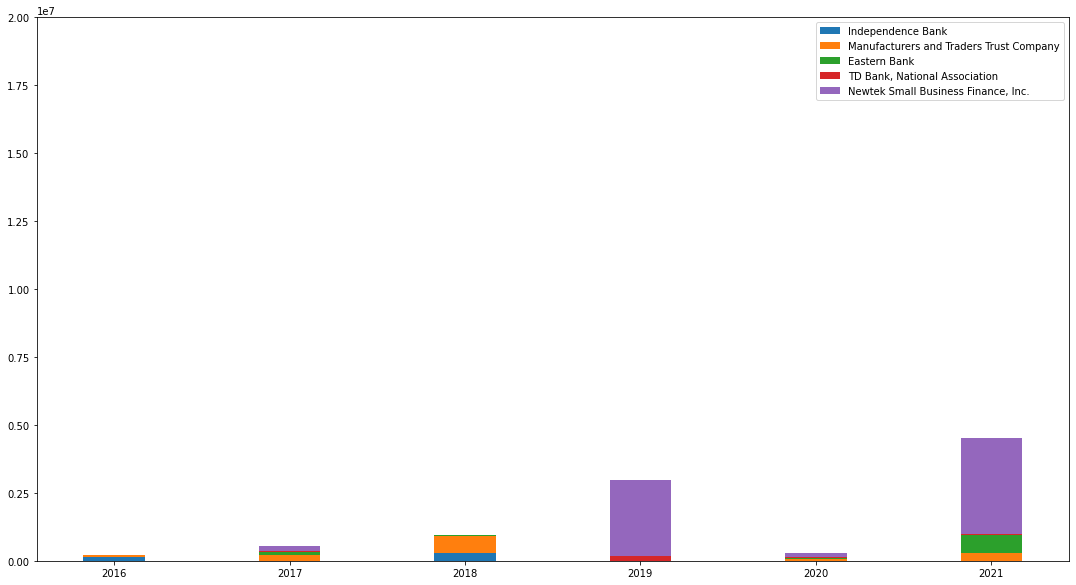

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_gross_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,2*1e7])
ax.legend()
plt.show()

In [ ]:
industry19_df= required_data[required_data['Supersector'] == 'Management of companies & Enterprises']
industry19_df.reset_index(drop=True, inplace=True)
industry19_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-09-30,7A,"The WDL Group, LLC",803 Ocean Avenue,NEW SMYRNA BEACH,FL,32169,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,50000,25000,2016-02-19,2016,2016-04-01,SBA Express,FA$TRK (Small Loan Express),7.00,84,551112.0,Offices of Other Holding Companies,NaN,NaN,VOLUSIA,FL,NORTH FLORIDA DISTRICT OFFICE,6.0,CORPORATION,PIF,2017-03-31,NaT,0,True,1,55,Management of companies & Enterprises,0.50
1,2021-09-30,7A,UNIFI Holdings Inc,60 Broad Street,NEW YORK,NY,10004,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,350000,175000,2016-05-18,2016,2016-06-01,SBA Express,FA$TRK (Small Loan Express),4.50,120,551112.0,Offices of Other Holding Companies,NaN,NaN,NEW YORK,NY,NEW YORK DISTRICT OFFICE,10.0,CORPORATION,EXEMPT,NaT,NaT,0,False,4,55,Management of companies & Enterprises,0.50
2,2021-09-30,7A,UNIFI Holdings Inc,60 Broad Street,NEW YORK,NY,10004,"Santander Bank, National Association","824 N Market St, Ste 100",WILMINGTON,DE,19801,800000,600000,2016-05-18,2016,2016-06-01,PLP,Guaranty,5.00,84,551112.0,Offices of Other Holding Companies,NaN,NaN,NEW YORK,NY,NEW YORK DISTRICT OFFICE,10.0,CORPORATION,EXEMPT,NaT,NaT,0,False,4,55,Management of companies & Enterprises,0.75
3,2021-09-30,7A,Chase Property Management LLC,110 Anderson ST,Beacon,NY,12508,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,25000,12500,2016-06-27,2016,2016-07-01,SBA Express,FA$TRK (Small Loan Express),7.25,84,551112.0,Offices of Other Holding Companies,NaN,NaN,DUTCHESS,NY,NEW YORK DISTRICT OFFICE,18.0,CORPORATION,EXEMPT,NaT,NaT,0,True,0,55,Management of companies & Enterprises,0.50
4,2021-09-30,7A,"Splashlight, LLC",75 Varick Street 3rd Floor,NEW YORK,NY,10013,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,3000000,2250000,2017-01-10,2017,2017-02-01,PLP,Guaranty,6.50,119,551112.0,Offices of Other Holding Companies,NaN,NaN,NEW YORK,NY,NEW YORK DISTRICT OFFICE,7.0,CORPORATION,PIF,2018-10-31,NaT,0,False,140,55,Management of companies & Enterprises,0.75
5,2021-09-30,7A,Preston Food Inc,3006 Bee Caves Rd,AUSTIN,TX,78746,Independence Bank,1370 S County Trl,EAST GREENWICH,RI,2818,150000,127500,2017-06-15,2017,NaT,PLP,Guaranty,6.75,120,551112.0,Offices of Other Holding Companies,NaN,NaN,TRAVIS,TX,SAN ANTONIO DISTRICT OFFICE,10.0,CORPORATION,CANCLD,NaT,NaT,0,False,2,55,Management of companies & Enterprises,0.85
6,2021-09-30,7A,"Splashlight, LLC",75 VARICK ST,NEW YORK,NY,10013,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,2000000,1500000,2017-08-02,2017,2017-08-31,PLP,Guaranty,7.00,119,551112.0,Offices of Other Holding Companies,NaN,NaN,NEW YORK,NY,NEW YORK DISTRICT OFFICE,7.0,CORPORATION,PIF,2018-10-31,NaT,0,False,10,55,Management of companies & Enterprises,0.75
7,2021-09-30,7A,Ains Holding Company LLC,122 W 26th St,NEW YORK,NY,10018,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,325000,243750,2017-09-29,2017,2017-10-31,PLP,Guaranty,7.00,119,551112.0,Offices of Other Holding Companies,NaN,NaN,NEW YORK,NY,NEW YORK DISTRICT OFFICE,10.0,CORPORATION,EXEMPT,NaT,NaT,0,False,19,55,Management of companies & Enterprises,0.75
8,2021-09-30,7A,Barcade Holdings LLC,148 West 24th Street,NEW YORK,NY,10011,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,500000,375000,2017-12-07,2018,2017-12-31,PLP,Guaranty,7.00,119,551112.0,Offices of Other Holding Companies,NaN,NaN,NEW 

In [ ]:
years = industry19_df['ApprovalFiscalYear'].unique()
unique_bank_names = industry19_df['BankName'].unique()
bank_name_gross_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = industry19_df[industry19_df['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_gross_approvals_by_year.append(temp_list)
bank_name_gross_approvals_by_year

[[50000, 0, 0, 0, 0],
 [1150000, 0, 0, 0, 0],
 [25000, 0, 50000, 0, 81000],
 [0, 5325000, 1000000, 898000, 0],
 [0, 150000, 0, 0, 0]]

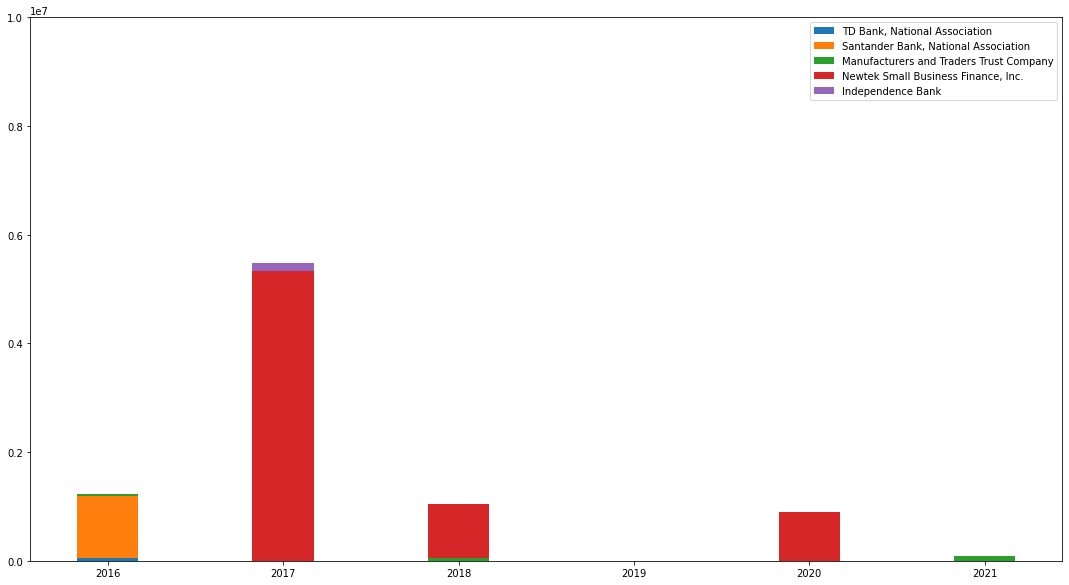

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_gross_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,1*1e7])
ax.legend()
plt.show()

In [ ]:
industry20_df= required_data[required_data['Supersector'] == 'Mining']
industry20_df.reset_index(drop=True, inplace=True)
industry20_df

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Naics,Supersector,Guranteed%
0,2021-09-30,7A,ERT Group Inc.,1000 International Centre 920,MINNEAPOLIS,MN,55402,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,5000000,3750000,2016-03-16,2016,2016-03-16,PLP,Guaranty,6.25,240,213112.0,Support Activities for Oil and Gas Operations,NaN,NaN,HENNEPIN,MN,MINNESOTA DISTRICT OFFICE,5.0,CORPORATION,EXEMPT,NaT,NaT,0,False,22,21,Mining,0.75
1,2021-09-30,7A,Rock lake inc,3137 Creamton Drive,LAKE COMO,PA,18437,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,2584000,1938000,2016-08-03,2016,2016-08-03,PLP,Guaranty,5.50,135,212311.0,Dimension Stone Mining and Quarrying,NaN,NaN,WAYNE,PA,PHILADELPHIA DISTRICT OFFICE,8.0,CORPORATION,PIF,2019-05-31,NaT,0,False,15,21,Mining,0.75
2,2021-09-30,7A,G &amp; P Line Testing LLC,3024 Potomac Camp RD,Oakland,MD,21550,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,10000,5000,2017-02-17,2017,2020-05-31,SBA Express,FA$TRK (Small Loan Express),10.25,84,213112.0,Support Activities for Oil and Gas Operations,NaN,NaN,GARRETT,MD,BALTIMORE DISTRICT OFFICE,6.0,CORPORATION,EXEMPT,NaT,NaT,0,True,0,21,Mining,0.50
3,2021-09-30,7A,CROASAEN INC,357 HARVARD ST. UNIT 2,CAMBRIDGE,MA,2138,Eastern Bank,265 Franklin St,BOSTON,MA,2110,22500,11250,2017-04-21,2017,2017-04-30,SBA Express,FA$TRK (Small Loan Express),10.49,36,213112.0,Support Activities for Oil and Gas Operations,NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,5.0,CORPORATION,EXEMPT,NaT,NaT,0,True,0,21,Mining,0.50
4,2021-09-30,7A,"R. OLIVEIRA TRUCKING, INC.",2433 WILLIAM STREET,DIGHTON,MA,2715,Eastern Bank,265 Franklin St,BOSTON,MA,2110,75000,37500,2017-05-19,2017,2017-06-30,SBA Express,FA$TRK (Small Loan Express),8.49,60,212111.0,Bituminous Coal and Lignite Surface Mining,NaN,NaN,BRISTOL,MA,MASSACHUSETTS DISTRICT OFFICE,4.0,CORPORATION,EXEMPT,NaT,NaT,0,False,4,21,Mining,0.50
5,2021-09-30,7A,SHRULE CONSTRUCTION INC,47 HIGHLAND PLACE,WEYMOUTH,MA,2190,Eastern Bank,265 Franklin St,BOSTON,MA,2110,100000,50000,2017-06-23,2017,2017-07-31,SBA Express,FA$TRK (Small Loan Express),8.49,60,213111.0,Drilling Oil and Gas Wells,NaN,NaN,NORFOLK,MA,MASSACHUSETTS DISTRICT OFFICE,8.0,CORPORATION,EXEMPT,NaT,NaT,0,False,1,21,Mining,0.50
6,2021-09-30,7A,CROASAEN INC,357 HARVARD ST APT 2,CAMBRIDGE,MA,2138,Eastern Bank,265 Franklin St,BOSTON,MA,2110,25000,12500,2017-08-02,2017,2017-09-30,SBA Express,FA$TRK (Small Loan Express),10.74,15,213112.0,Support Activities for Oil and Gas Operations,NaN,NaN,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,5.0,CORPORATION,CHGOFF,NaT,2021-07-06,19613,False,12,21,Mining,0.50
7,2021-09-30,7A,Weststar Exploration Company,1001 West Loop Smith Suite 525,HOUSTON,TX,77027,Independence Bank,1370 S County Trl,EAST GREENWICH,RI,2818,150000,127500,2017-08-28,2017,2017-12-31,PLP,Guaranty,7.00,120,213112.0,Support Activities for Oil and Gas Operations,NaN,NaN,HARRIS,TX,HOUSTON DISTRICT OFFICE,7.0,CORPORATION,EXEMPT,NaT,NaT,0,False,4,21,Mining,0.85
8,2021-09-30,7A,SELECT 3 INC,861 Pine Forest Tr W,Port Orange,FL,32127,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808,10000,5000,2017-08-28,2017,2017-09-30,SBA Express,FA$TRK (Small Loan Express),9.74,84,213112.0,Support Activities for Oil and Gas Operations,NaN,NaN,VOLUSIA,FL,NORTH FLORIDA DISTRICT OFFICE,6.0,CORPORATION,EXEMPT,NaT,NaT,0,True,0,21,Mining,0.50
9,2021-09-30,7A,"Cobra Mining, Inc.",22919 Barton Mine Rd,BARTON,MD,21521,Manufacturers and Traders Trust Company,"

In [ ]:
years = industry20_df['ApprovalFiscalYear'].unique()
unique_bank_names = industry20_df['BankName'].unique()
bank_name_gross_approvals_by_year = []
for bank_name in unique_bank_names:
  temp = industry20_df[industry20_df['BankName'] == bank_name]
  temp_list = []
  for year in years:
    temp_list.append(temp[temp['ApprovalFiscalYear']==year]['GrossApproval'].sum())
  bank_name_gross_approvals_by_year.append(temp_list)
bank_name_gross_approvals_by_year

[[5000000, 0, 21765535, 12261500, 1500000, 12987000],
 [2584000, 10000, 243000, 0, 0, 0],
 [0, 222500, 0, 0, 0, 0],
 [0, 150000, 200000, 600000, 0, 0],
 [0, 10000, 1150000, 100000, 0, 0]]

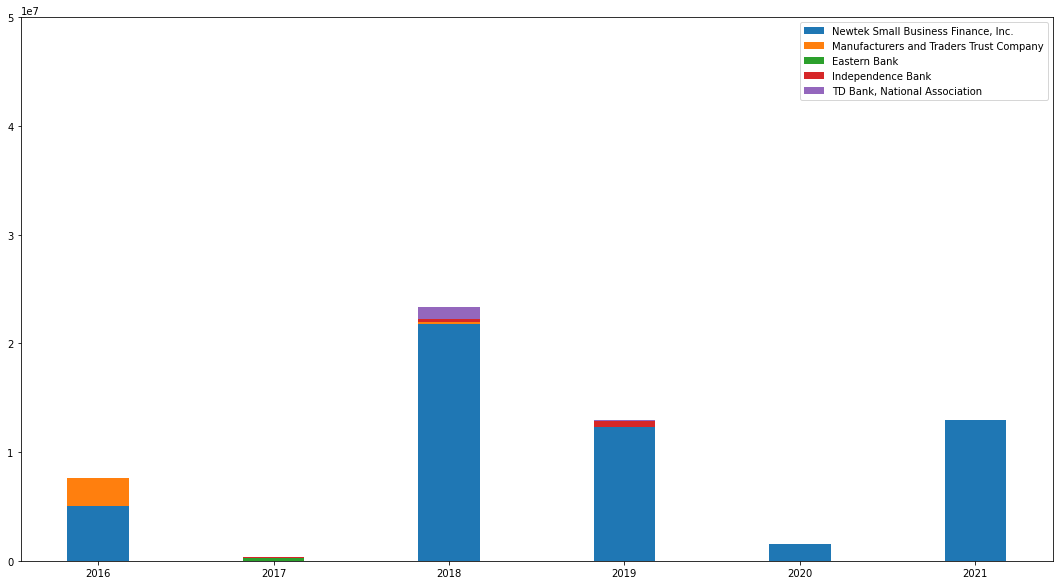

In [ ]:
fig, ax = plt.subplots()
width =0.35
temp_bottom_value = None
for index,bank_name in enumerate(unique_bank_names):
  #print(index, years, bank_name_gross_approvals_by_year[index], temp_bottom_value)
  ax.bar(years, bank_name_gross_approvals_by_year[index], width, bottom=temp_bottom_value, label = bank_name)
  if temp_bottom_value is None:
    temp_bottom_value = np.array(bank_name_gross_approvals_by_year[index])
  else:
    temp_bottom_value = temp_bottom_value + np.array(bank_name_gross_approvals_by_year[index])

fig.set_size_inches(18.5, 10)
ax.set_ylim([0,5*1e7])
ax.legend()
plt.show()